<font color='purple'><center><h1>Start: Answering "Which type of vehicle has created more traffic volume each year from Jan 2019 – Dec 2022 & generated more revenue each year from July 2019 – Dec 2022"</h1></center></font>

<font color='blue'><center><h2>Importing Libraries</h2></center></font>

In [5]:
%%time
#Importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

Wall time: 790 ms


<font color='blue'><center><h2>Get the toll charges from July 2019 to March 2023</h2></center></font>

In [6]:
%%time
#Reading the input file having the toll charges
df_charge = pd.read_csv("C:/Users/USER/Documents/Toll/Input Charge File - LCT/Input Charge File.csv")

Wall time: 9.01 ms


In [7]:
%%time
print("Below are the toll charge data per vehicle:")
#Create a copy of raw charge data
df_charge2 = df_charge.copy()
df_charge2

Below are the toll charge data per vehicle:
Wall time: 997 µs


AssetID TollPointID Cars Charge Trucks Charge  Month  Year
0       LCT         FNB       $1.68         $5.34      7  2019
1       LCT         FSB       $1.68         $5.34      7  2019
2       LCT         LCE       $3.35        $10.68      7  2019
3       LCT         LCW       $3.35        $10.68      7  2019
4       LCT         FNB       $1.68         $5.34      8  2019
..      ...         ...         ...           ...    ...   ...
167     LCT         LCW       $3.70        $12.50     12  2022
168     LCT         FNB       $1.89         $6.36      1  2023
169     LCT         FSB       $1.89         $6.36      1  2023
170     LCT         LCE       $3.77        $12.72      1  2023
171     LCT         LCW       $3.77        $12.72      1  2023

[172 rows x 6 columns]

<font color='blue'><center><h2>Toll charges Data Pre-Processing</h2></center></font>

In [8]:
%%time
#Adding 0 in prefix of Month to make it in a format mm
#Combining Year and Month in a single column
#Removing "$" from Cars and Trucks Charge
#Combining AssetID, TollPointID, and Year-Month
df_charge2['Year-Month'] = ""
for x in range(0,len(df_charge2)):
    if (int (df_charge2['Month'].iloc[x]) < 10):
        df_charge2['Month'].iloc[x] = '0' + str( df_charge2['Month'].iloc[x] )
        df_charge2['Year-Month'].iloc[x] = str( df_charge2['Year'].iloc[x] ) + "-" + df_charge2['Month'].iloc[x]
    else:
        df_charge2['Month'].iloc[x] = str( df_charge2['Month'].iloc[x] )
        df_charge2['Year-Month'].iloc[x] = str( df_charge2['Year'].iloc[x] ) + "-" + df_charge2['Month'].iloc[x]

df_charge2['Cars Charge'] = df_charge2['Cars Charge'].str.slice(1, len(df_charge2['Cars Charge']))
df_charge2['Trucks Charge'] = df_charge2['Trucks Charge'].str.slice(1, len(df_charge2['Trucks Charge']))
df_charge2["AssetID-TollPointID-Year-Month"] = df_charge2["AssetID"] + " " + df_charge2["TollPointID"] + " " + df_charge2["Year-Month"]

Wall time: 83.8 ms


<timed exec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
%%time
print("Below are the pre processed toll charge data per vehicle:")
df_charge2

Below are the pre processed toll charge data per vehicle:
Wall time: 0 ns


AssetID TollPointID Cars Charge Trucks Charge Month  Year Year-Month  \
0       LCT         FNB        1.68          5.34    07  2019    2019-07   
1       LCT         FSB        1.68          5.34    07  2019    2019-07   
2       LCT         LCE        3.35         10.68    07  2019    2019-07   
3       LCT         LCW        3.35         10.68    07  2019    2019-07   
4       LCT         FNB        1.68          5.34    08  2019    2019-08   
..      ...         ...         ...           ...   ...   ...        ...   
167     LCT         LCW        3.70         12.50    12  2022    2022-12   
168     LCT         FNB        1.89          6.36    01  2023    2023-01   
169     LCT         FSB        1.89          6.36    01  2023    2023-01   
170     LCT         LCE        3.77         12.72    01  2023    2023-01   
171     LCT         LCW        3.77         12.72    01  2023    2023-01   

    AssetID-TollPointID-Year-Month  
0                  LCT FNB 2019-07  
1                  LCT FSB 2019-07  
2                  LCT LCE 2019-07  
3                  LCT LCW 2019-07  
4                  LCT FNB 2019-08  
..                             ...  
167                LCT LCW 2022-12  
168                LCT FNB 2023-01  
169                LCT FSB 2023-01  
170                LCT LCE 2023-01  
171                LCT LCW 2023-01  

[172 rows x 8 columns]

<font color='blue'><center><h2>Get all the traffic input file names to be read</h2></center></font>

In [10]:
%%time
#Folder path where the input files are kept
directory_path = r'C:\\Users\\USER\\Documents\\Toll\\Input Files - LCT'

#Initializing list to store files
resource = []

#Iterate directory and get the list of all individual file names
for path in os.listdir(directory_path):
    # Check if current path is a file
    if os.path.isfile(os.path.join(directory_path, path)):
        resource.append(path)

print("Display each month's file name from the input folder:\n")
print(resource)

Display each month's file name from the input folder:

['LCT_trips_2010-01.csv', 'LCT_trips_2010-02.csv', 'LCT_trips_2010-03.csv', 'LCT_trips_2010-04.csv', 'LCT_trips_2010-05.csv', 'LCT_trips_2010-06.csv', 'LCT_trips_2010-07.csv', 'LCT_trips_2010-08.csv', 'LCT_trips_2010-09.csv', 'LCT_trips_2010-10.csv', 'LCT_trips_2010-11.csv', 'LCT_trips_2010-12.csv', 'LCT_trips_2011-01.csv', 'LCT_trips_2011-02.csv', 'LCT_trips_2011-03.csv', 'LCT_trips_2011-04.csv', 'LCT_trips_2011-05.csv', 'LCT_trips_2011-06.csv', 'LCT_trips_2011-07.csv', 'LCT_trips_2011-08.csv', 'LCT_trips_2011-09.csv', 'LCT_trips_2011-10.csv', 'LCT_trips_2011-11.csv', 'LCT_trips_2011-12.csv', 'LCT_trips_2012-01.csv', 'LCT_trips_2012-02.csv', 'LCT_trips_2012-03.csv', 'LCT_trips_2012-04.csv', 'LCT_trips_2012-05.csv', 'LCT_trips_2012-06.csv', 'LCT_trips_2012-07.csv', 'LCT_trips_2012-08.csv', 'LCT_trips_2012-09.csv', 'LCT_trips_2012-10.csv', 'LCT_trips_2012-11.csv', 'LCT_trips_2012-12.csv', 'LCT_trips_2013-01.csv', 'LCT_trips_2013-02.

<font color='blue'><center><h2>Traffic input Data Pre-Processing</h2></center></font>
<font color='blue'><center><h2>Read all input files and store it in a list</h2></center></font>

In [11]:
%%time
raw_csv_data = ""
raw_csv_data_sum = []
for x in resource:
    raw_csv_data = pd.read_csv("C:/Users/USER/Documents/Toll/Input Files - LCT/" + x)
    raw_csv_data_sum.append(raw_csv_data)

Wall time: 7.56 s


In [12]:
%%time
print("Display all input file data array:\n")
print(raw_csv_data_sum)

Display all input file data array:

[      AssetID  FinancialQtrID        Date IntervalStart IntervalEnd  Version  \
0         LCT          201003  2010-01-01         00:00       00:14        1   
1         LCT          201003  2010-01-01         00:00       00:14        1   
2         LCT          201003  2010-01-01         00:00       00:14        1   
3         LCT          201003  2010-01-01         00:00       00:14        1   
4         LCT          201003  2010-01-01         00:00       00:14        1   
...       ...             ...         ...           ...         ...      ...   
23803     LCT          201003  2010-01-31         23:45       23:59        1   
23804     LCT          201003  2010-01-31         23:45       23:59        1   
23805     LCT          201003  2010-01-31         23:45       23:59        1   
23806     LCT          201003  2010-01-31         23:45       23:59        1   
23807     LCT          201003  2010-01-31         23:45       23:59        1   

  

In [13]:
print("Display all input file data array length:")
print( len(raw_csv_data_sum) )

Display all input file data array length:
156


<font color='blue'><center><h2>Concatinate and store all input files into a single dataframe</h2></center></font>

In [14]:
%%time
raw_csv_data_concat = pd.concat(raw_csv_data_sum)

Wall time: 812 ms


In [15]:
%%time
print("Display combined input file data:")
raw_csv_data_concat

Display combined input file data:
Wall time: 0 ns


AssetID  FinancialQtrID        Date IntervalStart IntervalEnd  Version  \
0         LCT          201003  2010-01-01         00:00       00:14        1   
1         LCT          201003  2010-01-01         00:00       00:14        1   
2         LCT          201003  2010-01-01         00:00       00:14        1   
3         LCT          201003  2010-01-01         00:00       00:14        1   
4         LCT          201003  2010-01-01         00:00       00:14        1   
...       ...             ...         ...           ...         ...      ...   
23803     LCT          202302  2022-12-31         23:45       23:59        1   
23804     LCT          202302  2022-12-31         23:45       23:59        1   
23805     LCT          202302  2022-12-31         23:45       23:59        1   
23806     LCT          202302  2022-12-31         23:45       23:59        1   
23807     LCT          202302  2022-12-31         23:45       23:59        1   

      VehicleClass TollPointID GantryDirection  \
0              Car         FNB               N   
1            Truck         FNB               N   
2              Car         FSB               S   
3            Truck         FSB               S   
4              Car         LCE               E   
...            ...         ...             ...   
23803        Truck         FSB               S   
23804          Car         LCE               E   
23805        Truck         LCE               E   
23806          Car         LCW               W   
23807        Truck         LCW               W   

                             GantryLocation  GantryGPSLatitude  \
0      Military Road North-bound entry ramp         -33.828490   
1      Military Road North-bound entry ramp         -33.828490   
2       Military Road South-bound exit ramp         -33.828526   
3       Military Road South-bound exit ramp         -33.828526   
4               Lane Cove Tunnel East-bound         -33.801922   
...                                     ...                ...   
23803   Military Road South-bound exit ramp         -33.828526   
23804           Lane Cove Tunnel East-bound         -33.801922   
23805           Lane Cove Tunnel East-bound         -33.801922   
23806           Lane Cove Tunnel West-bound         -33.802044   
23807           Lane Cove Tunnel West-bound         -33.802044   

       GantryGPSLongitude       GantryType  TotalVolume  
0              151.213825      Ramp Gantry            9  
1              151.213825      Ramp Gantry            0  
2              151.214562      Ramp Gantry            9  
3              151.214562      Ramp Gantry            0  
4              151.145577  Mainline Gantry           11  
...                   ...              ...          ...  
23803          151.214562      Ramp Gantry            0  
23804          151.145577  Mainline Gantry           68  
23805          151.145577  Mainline Gantry            2  
23806          151.145486  Mainline Gantry           64  
23807          151.145486  Mainline Gantry            0  

[3645688 rows x 14 columns]

In [16]:
%%time
#Create a copy of raw traffic input data
df_inp_data = raw_csv_data_concat.copy()
df_inp_data.to_csv('LCT_trips_master.csv')

Wall time: 28.2 s


In [17]:
%%time
#Check null values
df_inp_data.isna().sum()

Wall time: 4.62 s


AssetID               0
FinancialQtrID        0
Date                  0
IntervalStart         0
IntervalEnd           0
Version               0
VehicleClass          0
TollPointID           0
GantryDirection       0
GantryLocation        0
GantryGPSLatitude     0
GantryGPSLongitude    0
GantryType            0
TotalVolume           0
dtype: int64

In [18]:
%%time
#Check unique values of every column
df_inp_data.nunique()

Wall time: 2.08 s


AssetID                  1
FinancialQtrID          52
Date                  4748
IntervalStart           96
IntervalEnd             96
Version                  2
VehicleClass             2
TollPointID              4
GantryDirection          4
GantryLocation           4
GantryGPSLatitude        4
GantryGPSLongitude       4
GantryType               2
TotalVolume           1081
dtype: int64

In [19]:
%%time
#Describe dataset datatype
df_inp_data.dtypes

Wall time: 0 ns


AssetID                object
FinancialQtrID          int64
Date                   object
IntervalStart          object
IntervalEnd            object
Version                 int64
VehicleClass           object
TollPointID            object
GantryDirection        object
GantryLocation         object
GantryGPSLatitude     float64
GantryGPSLongitude    float64
GantryType             object
TotalVolume             int64
dtype: object

In [20]:
%%time
#Combining AssetID, TollPointID, and Year-Month
df_inp_data["AssetID-TollPointID-Year-Month"] = df_inp_data["AssetID"] + " " + df_inp_data["TollPointID"] + " " + df_inp_data["Date"].str.slice(0, 7)

Wall time: 2.34 s


In [21]:
%%time
print("Below are the pre processed input traffic data:")
df_inp_data

Below are the pre processed input traffic data:
Wall time: 0 ns


AssetID  FinancialQtrID        Date IntervalStart IntervalEnd  Version  \
0         LCT          201003  2010-01-01         00:00       00:14        1   
1         LCT          201003  2010-01-01         00:00       00:14        1   
2         LCT          201003  2010-01-01         00:00       00:14        1   
3         LCT          201003  2010-01-01         00:00       00:14        1   
4         LCT          201003  2010-01-01         00:00       00:14        1   
...       ...             ...         ...           ...         ...      ...   
23803     LCT          202302  2022-12-31         23:45       23:59        1   
23804     LCT          202302  2022-12-31         23:45       23:59        1   
23805     LCT          202302  2022-12-31         23:45       23:59        1   
23806     LCT          202302  2022-12-31         23:45       23:59        1   
23807     LCT          202302  2022-12-31         23:45       23:59        1   

      VehicleClass TollPointID GantryDirection  \
0              Car         FNB               N   
1            Truck         FNB               N   
2              Car         FSB               S   
3            Truck         FSB               S   
4              Car         LCE               E   
...            ...         ...             ...   
23803        Truck         FSB               S   
23804          Car         LCE               E   
23805        Truck         LCE               E   
23806          Car         LCW               W   
23807        Truck         LCW               W   

                             GantryLocation  GantryGPSLatitude  \
0      Military Road North-bound entry ramp         -33.828490   
1      Military Road North-bound entry ramp         -33.828490   
2       Military Road South-bound exit ramp         -33.828526   
3       Military Road South-bound exit ramp         -33.828526   
4               Lane Cove Tunnel East-bound         -33.801922   
...                                     ...                ...   
23803   Military Road South-bound exit ramp         -33.828526   
23804           Lane Cove Tunnel East-bound         -33.801922   
23805           Lane Cove Tunnel East-bound         -33.801922   
23806           Lane Cove Tunnel West-bound         -33.802044   
23807           Lane Cove Tunnel West-bound         -33.802044   

       GantryGPSLongitude       GantryType  TotalVolume  \
0              151.213825      Ramp Gantry            9   
1              151.213825      Ramp Gantry            0   
2              151.214562      Ramp Gantry            9   
3              151.214562      Ramp Gantry            0   
4              151.145577  Mainline Gantry           11   
...                   ...              ...          ...   
23803          151.214562      Ramp Gantry            0   
23804          151.145577  Mainline Gantry           68   
23805          151.145577  Mainline Gantry            2   
23806          151.145486  Mainline Gantry           64   
23807          151.145486  Mainline Gantry            0   

      AssetID-TollPointID-Year-Month  
0                    LCT FNB 2010-01  
1                    LCT FNB 2010-01  
2                    LCT FSB 2010-01  
3                    LCT FSB 2010-01  
4                    LCT LCE 2010-01  
...                              ...  
23803                LCT FSB 2022-12  
23804                LCT LCE 2022-12  
23805                LCT LCE 2022-12  
23806                LCT LCW 2022-12  
23807                LCT LCW 2022-12  

[3645688 rows x 15 columns]

In [22]:
%%time
#Combining traffic input data and its charge into a single dataframe
df_inp_data_charge = pd.merge(left=df_inp_data, right=df_charge2, left_on='AssetID-TollPointID-Year-Month', right_on='AssetID-TollPointID-Year-Month')

Wall time: 1.25 s


In [23]:
%%time
#Determining Toll Charge Per Vehicle

df_inp_data_charge2 = df_inp_data_charge[(df_inp_data_charge['VehicleClass'] == 'Car')]
df_inp_data_charge2['TollChargePerVehicle'] = df_inp_data_charge2['Cars Charge']

df_inp_data_charge3 = df_inp_data_charge[(df_inp_data_charge['VehicleClass'] == 'Truck')]
df_inp_data_charge3['TollChargePerVehicle'] = df_inp_data_charge3['Trucks Charge']

df_inp_data_charge4 = df_inp_data_charge2.append(df_inp_data_charge3)

<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Wall time: 930 ms


In [24]:
%%time
#Drop unnecessary columns
df_inp_data_charge4.drop(['AssetID-TollPointID-Year-Month', 'AssetID_y', 'TollPointID_y', 'Cars Charge', 'Trucks Charge'], axis=1, inplace=True)

Wall time: 179 ms


In [25]:
%%time
#Determining Total Toll Charge Per Record
df_inp_data_charge4["TollChargePerVehicle"] = pd.to_numeric( df_inp_data_charge4["TollChargePerVehicle"] )
df_inp_data_charge4["TotalTollCharge"] = df_inp_data_charge4["TotalVolume"] * df_inp_data_charge4["TollChargePerVehicle"]

Wall time: 300 ms


In [26]:
%%time
print("Display traffic data with its total toll charge:")
df_inp_data_charge4

Display traffic data with its total toll charge:
Wall time: 0 ns


AssetID_x  FinancialQtrID        Date IntervalStart IntervalEnd  \
0            LCT          202001  2019-07-01         00:00       00:14   
2            LCT          202001  2019-07-01         00:15       00:29   
4            LCT          202001  2019-07-01         00:30       00:44   
6            LCT          202001  2019-07-01         00:45       00:59   
8            LCT          202001  2019-07-01         01:00       01:14   
...          ...             ...         ...           ...         ...   
982727       LCT          202302  2022-12-31         22:45       22:59   
982729       LCT          202302  2022-12-31         23:00       23:14   
982731       LCT          202302  2022-12-31         23:15       23:29   
982733       LCT          202302  2022-12-31         23:30       23:44   
982735       LCT          202302  2022-12-31         23:45       23:59   

        Version VehicleClass TollPointID_x GantryDirection  \
0             2          Car           FNB               N   
2             2          Car           FNB               N   
4             2          Car           FNB               N   
6             2          Car           FNB               N   
8             2          Car           FNB               N   
...         ...          ...           ...             ...   
982727        1        Truck           LCW               W   
982729        1        Truck           LCW               W   
982731        1        Truck           LCW               W   
982733        1        Truck           LCW               W   
982735        1        Truck           LCW               W   

                              GantryLocation  GantryGPSLatitude  \
0       Military Road North-bound entry ramp         -33.828490   
2       Military Road North-bound entry ramp         -33.828490   
4       Military Road North-bound entry ramp         -33.828490   
6       Military Road North-bound entry ramp         -33.828490   
8       Military Road North-bound entry ramp         -33.828490   
...                                      ...                ...   
982727           Lane Cove Tunnel West-bound         -33.802044   
982729           Lane Cove Tunnel West-bound         -33.802044   
982731           Lane Cove Tunnel West-bound         -33.802044   
982733           Lane Cove Tunnel West-bound         -33.802044   
982735           Lane Cove Tunnel West-bound         -33.802044   

        GantryGPSLongitude       GantryType  TotalVolume Month  Year  \
0               151.213825      Ramp Gantry            7    07  2019   
2               151.213825      Ramp Gantry            5    07  2019   
4               151.213825      Ramp Gantry           11    07  2019   
6               151.213825      Ramp Gantry            3    07  2019   
8               151.213825      Ramp Gantry            4    07  2019   
...                    ...              ...          ...   ...   ...   
982727          151.145486  Mainline Gantry            5    12  2022   
982729          151.145486  Mainline Gantry            1    12  2022   
982731          151.145486  Mainline Gantry            0    12  2022   
982733          151.145486  Mainline Gantry            0    12  2022   
982735          151.145486  Mainline Gantry            0    12  2022   

       Year-Month  TollChargePerVehicle  TotalTollCharge  
0         2019-07                  1.68            11.76  
2         2019-07                  1.68             8.40  
4         2019-07                  1.68            18.48  
6         2019-07                  1.68             5.04  
8         2019-07                  1.68             6.72  
...           ...                   ...              ...  
982727    2022-12                 12.50            62.50  
982729    2022-12                 12.50            12.50  
982731    2022-12                 12.50             0.00  
982733    2022-12                 12.50             0.00  
982735    2022-12                 12.50             0.

<font color='blue'><center><h2>Preprocess and show Traffic Volume & Toll Revenue for the years 2019, 2020, 2021 and 2022</h2></center></font>

In [27]:
%%time
year = ['2019', '2020', '2021', '2022']
car_volume = []
truck_volume = []
car_revenue = []
truck_revenue = []

#Find Year of each row and store it in a separate column
df_traffic_vol = df_inp_data.copy()
df_traffic_vol['Date'] = pd.to_datetime(df_traffic_vol['Date'])
df_traffic_vol['Year'] = df_traffic_vol.Date.dt.year

#Group by traffic volume & toll revenue based on vehicle class such as Car and Truck
for x in range (2019,2023):
    df_traffic_vol2 = df_traffic_vol[(df_traffic_vol['Year'] == x)]
    df_traffic_vol3 = df_traffic_vol2.groupby(['VehicleClass'])['TotalVolume'].sum()
    car_volume.append(df_traffic_vol3.iloc[0])
    truck_volume.append(df_traffic_vol3.iloc[1])
    df_inp_data_charge5 = df_inp_data_charge4[(df_inp_data_charge4['Year'] == x)]
    df_inp_data_charge6 = df_inp_data_charge5.groupby(['VehicleClass'])['TotalTollCharge'].sum()
    car_revenue.append( round(df_inp_data_charge6.iloc[0],2) )
    truck_revenue.append( round(df_inp_data_charge6.iloc[1],2) )

Wall time: 2.5 s


In [28]:
%%time
car_volume

Wall time: 0 ns


[31833438, 25683320, 24421246, 29431630]

In [29]:
%%time
truck_volume

Wall time: 0 ns


[1452001, 1253715, 1198630, 1297343]

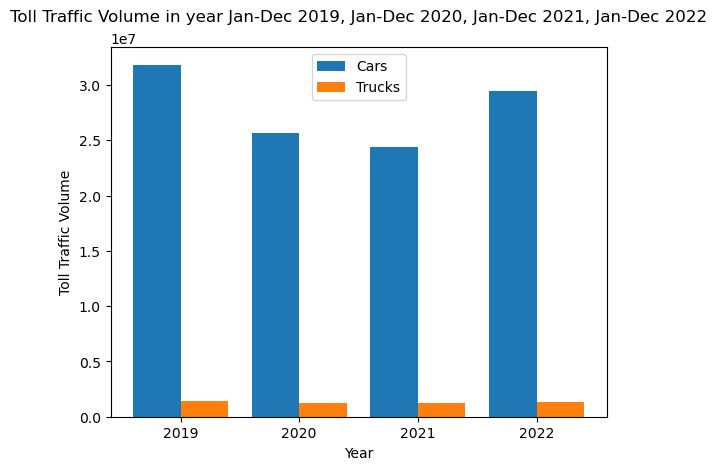

Wall time: 170 ms


In [30]:
%%time
#Bar chart to show Toll Traffic Volume in year Jan-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022
Xaxis = np.arange(len(year))
  
plt.bar(Xaxis - 0.2, car_volume, 0.4, label = 'Cars')
plt.bar(Xaxis + 0.2, truck_volume, 0.4, label = 'Trucks')
  
plt.xticks(Xaxis, year)
plt.xlabel("Year")
plt.ylabel("Toll Traffic Volume")
plt.title("Toll Traffic Volume in year Jan-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022\n")
plt.legend()
plt.show()

<font color='black'><left><h2>Conclusion: <br><br>(i) As per the above descriptive analytics, cars contribute to more traffic in comparison with trucks. So, it is vital for the government to concentrate more on cars traffic management on the toll roads.
<br>(ii) It is evident from the graph that we can see a dip in traffic volume in 2020 and 2021 in comparison with 2019 and 2022, which is due to covid-19 impact and travel restrictions applied by the government.
</h2></left></font>

In [31]:
%%time
car_revenue

Wall time: 0 ns


[47596626.77, 77962038.82, 75159767.38, 95535596.18]

In [32]:
%%time
truck_revenue

Wall time: 0 ns


[7089726.42, 13008743.02, 13011797.33, 14781749.07]

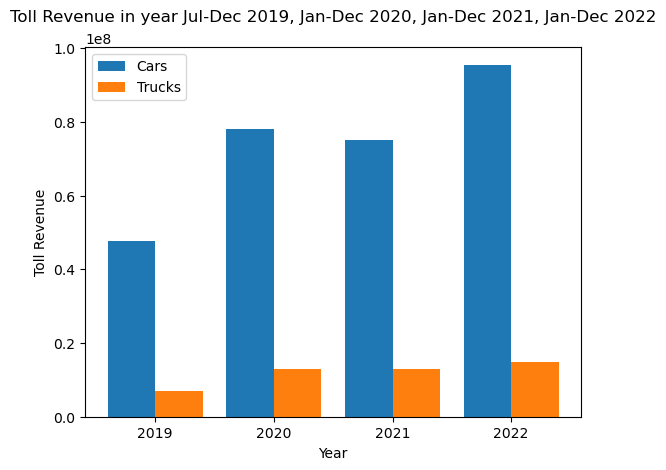

Wall time: 140 ms


In [33]:
%%time
#Bar chart to show Toll Revenue in year Jul-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022
Xaxis = np.arange(len(year))
  
plt.bar(Xaxis - 0.2, car_revenue, 0.4, label = 'Cars')
plt.bar(Xaxis + 0.2, truck_revenue, 0.4, label = 'Trucks')
  
plt.xticks(Xaxis, year)
plt.xlabel("Year")
plt.ylabel("Toll Revenue")
plt.title("Toll Revenue in year Jul-Dec 2019, Jan-Dec 2020, Jan-Dec 2021, Jan-Dec 2022\n")
plt.legend()
plt.show()

<font color='black'><left><h2>Conclusion: <br><br>(i) As per the above descriptive analytics, cars generate more revenue in comparison with trucks. So, it is vital for the government to concentrate more on cars traffic management on the toll roads.
<br>(ii) It is evident from the graph that we can see a dip in toll revenue in 2020 and 2021 in comparison with 2022, which is due to covid-19 impact and travel restrictions applied by the government.
</h2></left></font>

<font color='purple'><center><h1>End: Answering "Which type of vehicle has created more traffic volume each year from Jan 2019 – Dec 2022 & generated more revenue each year from July 2019 – Dec 2022"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Impact on traffic volume in March 2020 due to COVID-19 restrictions by comparing March 2019 and March 2022"</h1></center></font>

<font color='blue'><center><h2>COVID-19 impact analysis</h2></center></font>

<font color='blue'><center><h2>Below analysis is done combining all TollPointIDs</h2></center></font>

In [34]:
%%time
#Create a copy of input traffic data
df_inp_data_covid = df_inp_data.copy()

#Convert date column data type from object to date
df_inp_data_covid['Date'] = pd.to_datetime(df_inp_data_covid['Date'])

#Read March 2019, March 2020 and March 2022 toll traffic data
df_covid_19 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2019-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2019-03-31')) ]
df_covid_20 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2020-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2020-03-31')) ]
df_covid_22 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2022-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2022-03-31')) ]

Wall time: 1.54 s


<font color='blue'><center><h2>Split the data into seven phase wise COVID impact</h2></center></font>
<center>1. No restrictions applied between 1-14th of March <br>
2. Social gatherings allowed up to 500 people between 15-17th of March <br>
3. Social gatherings allowed up to 100 people between 18-19th of March <br>
4. Borders closed for international between 20-22nd of March <br>
5. Stage 1 shutdown announced between 23-24th of March <br>
6. Stage 2 shutdown announced between 25-28th of March <br>
7. Stage 3 shutdown announced between 29-31st of March <br>

In [35]:
%%time
#Split the data into seven phase wise COVID impact for the below month and year
#March 2019
df_covid_19_phase1 = df_covid_19[( df_covid_19['Date'] < pd.to_datetime('2019-03-15') )]
df_covid_19_phase2 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-14')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-18')) ]
df_covid_19_phase3 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-17')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-20')) ]
df_covid_19_phase4 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-19')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-23')) ]
df_covid_19_phase5 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-22')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-25')) ]
df_covid_19_phase6 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-24')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-29')) ]
df_covid_19_phase7 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-28')) ]

#March 2020
df_covid_20_phase1 = df_covid_20[( df_covid_20['Date'] < pd.to_datetime('2020-03-15') )]
df_covid_20_phase2 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-14')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-18')) ]
df_covid_20_phase3 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-17')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-20')) ]
df_covid_20_phase4 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-19')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-23')) ]
df_covid_20_phase5 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-22')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-25')) ]
df_covid_20_phase6 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-24')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-29')) ]
df_covid_20_phase7 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-28')) ]

#March 2022
df_covid_22_phase1 = df_covid_22[( df_covid_22['Date'] < pd.to_datetime('2022-03-15') )]
df_covid_22_phase2 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-14')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-18')) ]
df_covid_22_phase3 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-17')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-20')) ]
df_covid_22_phase4 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-19')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-23')) ]
df_covid_22_phase5 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-22')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-25')) ]
df_covid_22_phase6 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-24')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-29')) ]
df_covid_22_phase7 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-28')) ]

Wall time: 48.4 ms


In [36]:
%%time
#Prepare data for Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Phase = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7']
Traffic_volume_2019 = [df_covid_19_phase1['TotalVolume'].sum(), df_covid_19_phase2['TotalVolume'].sum(), df_covid_19_phase3['TotalVolume'].sum(), df_covid_19_phase4['TotalVolume'].sum(), df_covid_19_phase5['TotalVolume'].sum(), df_covid_19_phase6['TotalVolume'].sum(), df_covid_19_phase7['TotalVolume'].sum()]
Traffic_volume_2020 = [df_covid_20_phase1['TotalVolume'].sum(), df_covid_20_phase2['TotalVolume'].sum(), df_covid_20_phase3['TotalVolume'].sum(), df_covid_20_phase4['TotalVolume'].sum(), df_covid_20_phase5['TotalVolume'].sum(), df_covid_20_phase6['TotalVolume'].sum(), df_covid_20_phase7['TotalVolume'].sum()]
Traffic_volume_2022 = [df_covid_22_phase1['TotalVolume'].sum(), df_covid_22_phase2['TotalVolume'].sum(), df_covid_22_phase3['TotalVolume'].sum(), df_covid_22_phase4['TotalVolume'].sum(), df_covid_22_phase5['TotalVolume'].sum(), df_covid_22_phase6['TotalVolume'].sum(), df_covid_22_phase7['TotalVolume'].sum()]

Wall time: 2.99 ms


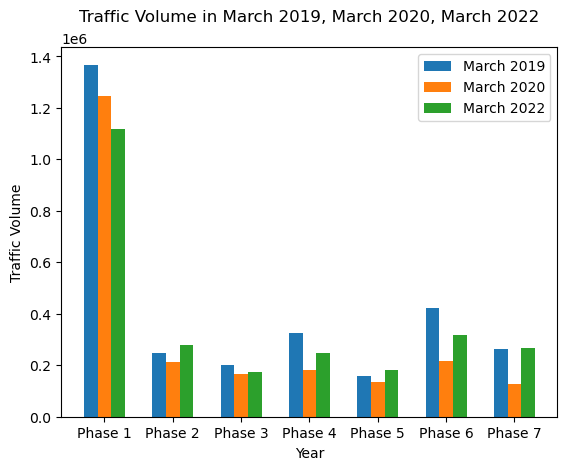

Wall time: 222 ms


In [37]:
%%time
#Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Xaxis = np.arange(len(Phase))
  
plt.bar(Xaxis - 0.2, Traffic_volume_2019, 0.2, label = 'March 2019')
plt.bar(Xaxis + 0.0, Traffic_volume_2020, 0.2, label = 'March 2020')
plt.bar(Xaxis + 0.2, Traffic_volume_2022, 0.2, label = 'March 2022')
  
plt.xticks(Xaxis, Phase)
plt.xlabel("Year")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume in March 2019, March 2020, March 2022\n")
plt.legend()
plt.show()

<font color='blue'><center><h2>Below analysis is done only for TollPointID = LCE</h2></center></font>

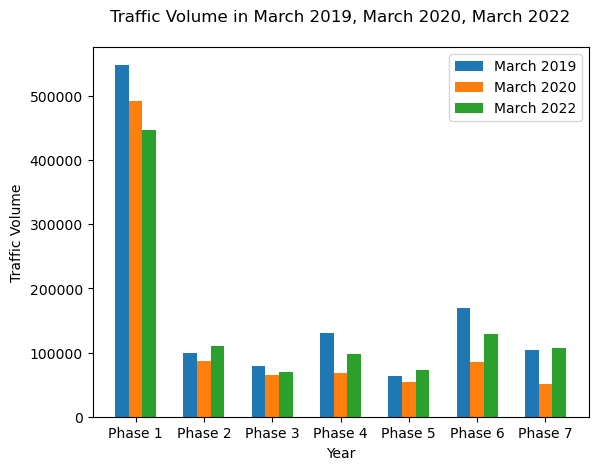

Wall time: 688 ms


In [38]:
%%time
df_inp_data_covid = df_inp_data_covid[( df_inp_data_covid['TollPointID'] == "LCE" )]

#Read March 2019, March 2020 and March 2022 toll traffic data
df_covid_19 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2019-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2019-03-31')) ]
df_covid_20 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2020-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2020-03-31')) ]
df_covid_22 = df_inp_data_covid[ (df_inp_data_covid['Date'] >= pd.to_datetime('2022-03-01')) & (df_inp_data_covid['Date'] <= pd.to_datetime('2022-03-31')) ]

#Split the data into seven phase wise COVID impact for the below month and year
#March 2019
df_covid_19_phase1 = df_covid_19[( df_covid_19['Date'] < pd.to_datetime('2019-03-15') )]
df_covid_19_phase2 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-14')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-18')) ]
df_covid_19_phase3 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-17')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-20')) ]
df_covid_19_phase4 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-19')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-23')) ]
df_covid_19_phase5 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-22')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-25')) ]
df_covid_19_phase6 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-24')) & (df_covid_19['Date'] < pd.to_datetime('2019-03-29')) ]
df_covid_19_phase7 = df_covid_19[ (df_covid_19['Date'] > pd.to_datetime('2019-03-28')) ]

#March 2020
df_covid_20_phase1 = df_covid_20[( df_covid_20['Date'] < pd.to_datetime('2020-03-15') )]
df_covid_20_phase2 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-14')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-18')) ]
df_covid_20_phase3 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-17')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-20')) ]
df_covid_20_phase4 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-19')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-23')) ]
df_covid_20_phase5 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-22')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-25')) ]
df_covid_20_phase6 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-24')) & (df_covid_20['Date'] < pd.to_datetime('2020-03-29')) ]
df_covid_20_phase7 = df_covid_20[ (df_covid_20['Date'] > pd.to_datetime('2020-03-28')) ]

#March 2022
df_covid_22_phase1 = df_covid_22[( df_covid_22['Date'] < pd.to_datetime('2022-03-15') )]
df_covid_22_phase2 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-14')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-18')) ]
df_covid_22_phase3 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-17')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-20')) ]
df_covid_22_phase4 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-19')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-23')) ]
df_covid_22_phase5 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-22')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-25')) ]
df_covid_22_phase6 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-24')) & (df_covid_22['Date'] < pd.to_datetime('2022-03-29')) ]
df_covid_22_phase7 = df_covid_22[ (df_covid_22['Date'] > pd.to_datetime('2022-03-28')) ]

#Prepare data for Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Phase = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7']
Traffic_volume_2019 = [df_covid_19_phase1['TotalVolume'].sum(), df_covid_19_phase2['TotalVolume'].sum(), df_covid_19_phase3['TotalVolume'].sum(), df_covid_19_phase4['TotalVolume'].sum(), df_covid_19_phase5['TotalVolume'].sum(), df_covid_19_phase6['TotalVolume'].sum(), df_covid_19_phase7['TotalVolume'].sum()]
Traffic_volume_2020 = [df_covid_20_phase1['TotalVolume'].sum(), df_covid_20_phase2['TotalVolume'].sum(), df_covid_20_phase3['TotalVolume'].sum(), df_covid_20_phase4['TotalVolume'].sum(), df_covid_20_phase5['TotalVolume'].sum(), df_covid_20_phase6['TotalVolume'].sum(), df_covid_20_phase7['TotalVolume'].sum()]
Traffic_volume_2022 = [df_covid_22_phase1['TotalVolume'].sum(), df_covid_22_phase2['TotalVolume'].sum(), df_covid_22_phase3['TotalVolume'].sum(), df_covid_22_phase4['TotalVolume'].sum(), df_covid_22_phase5['TotalVolume'].sum(), df_covid_22_phase6['TotalVolume'].sum(), df_covid_22_phase7['TotalVolume'].sum()]

#Bar chart to show Toll Traffic Volume in March 2019, March 2020, March 2022
Xaxis = np.arange(len(Phase))
  
plt.bar(Xaxis - 0.2, Traffic_volume_2019, 0.2, label = 'March 2019')
plt.bar(Xaxis + 0.0, Traffic_volume_2020, 0.2, label = 'March 2020')
plt.bar(Xaxis + 0.2, Traffic_volume_2022, 0.2, label = 'March 2022')
  
plt.xticks(Xaxis, Phase)
plt.xlabel("Year")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume in March 2019, March 2020, March 2022\n")
plt.legend()
plt.show()

<font color='black'><left><h2>Conclusion:<br><br>(i) As per the above exploratory data analysis, with the restrictions announced from phase 2 – 7, we can see a dip in the traffic volume during March 2020 when compared with March 2019 & 2022.<br><br>(ii) Moreover, the stage 2 & 3 restrictions announced in phases 6 & 7 had greater impact to traffic volume during March 2020 in comparison to March 2019 & 2022.
</h2></left></font>

<font color='blue'><center><h2>Toll Road Air Quality</h2></center></font>

<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [39]:
%%time
df_air = pd.read_csv("C:/Users/USER/Documents/Toll/Air Quality/Air Level - LCT.csv")
df_air = df_air.set_index("Month-Year")
df_air

Wall time: 9.22 ms


CO(mg/m³)  NO(mg/m³)   NO2(mg/m³)   NOx (mg/m³)   PM10 (µg/m³)  \
Month-Year                                                                    
Feb-20            3.30       1.37         0.35          2.46           85.9   
Mar-20            2.27       1.23         0.30          2.19           56.8   
Apr-20            1.73       0.97         0.24          1.73           42.4   
May-20            2.05       1.12         0.27          2.00           40.1   
Jun-20            2.55       1.32         0.31          2.33           43.3   
Jul-20            2.51       1.27         0.31          2.26           41.9   
Aug-20            2.55       1.32         0.32          2.34           45.3   
Sep-20            2.52       1.23         0.31          2.20           46.3   
Oct-20            2.73       1.18         0.31          2.12           42.3   
Nov-20            2.92       1.24         0.32          2.23           54.1   
Dec-20            2.66       1.10         0.28          1.96           52.0   
Jan-21            2.50       0.97         0.25          1.74           50.3   
Mar-21            2.99       1.33         0.31          2.34           65.8   
Apr-21            3.00       1.36         0.32          2.41           59.0   
May-21            3.05       1.42         0.32          2.49           54.1   
Jun-21            2.94       1.36         0.30          2.38           52.0   
Jul-21            1.63       0.84         0.21          1.50           34.6   
Aug-21            1.59       0.89         0.22          1.58           41.6   
Sep-21            1.69       0.96         0.25          1.72           41.3   
Oct-21            2.52       1.12         0.28          2.00           56.1   
Nov-21            3.03       1.28         0.29          2.26           57.9   
Dec-21            3.34       1.21         0.29          2.14           65.8   
Jan-22            2.76       0.93         0.22          1.64           53.4   
Feb-22            3.01       1.28         0.28          2.25           71.9   
Mar-22            3.09       1.18         0.25          2.07           62.6   
Apr-22            2.72       1.10         0.24          1.94           56.9   
May-22            2.99       1.32         0.29          2.30           62.0   
Jun-22            3.07       1.41         0.31          2.47           57.2   
Jul-22            2.83       1.19         0.27          2.11           49.6   
Aug-22            2.73       1.41         0.31          2.47           61.9   
Sep-22            2.59       1.31         0.30          2.31           59.3   
Oct-22            2.72       1.15         0.27          2.03           55.1   
Nov-22            2.83       1.27         0.29          2.23           62.6   
Dec-22            2.25       1.06         0.25          1.87           55.6   

             PM2.5 (µg/m³)  Year  Month  
Month-Year                               
Feb-20                65.7  2020      2  
Mar-20                48.4  2020      3  
Apr-20                36.7  2020      4  
May-20                34.8  2020      5  
Jun-20                37.6  2020      6  
Jul-20                37.1  2020      7  
Aug-20                35.9  2020      8  
Sep-20                41.1  2020      9  
Oct-20                39.9  2020     10  
Nov-20                41.2  2020     11  
Dec-20                44.4  2020     12  
Jan-21                39.6  2021      1  
Mar-21                51.5  2021      3  
Apr-21                44.1  2021      4  
May-21                49.3  2021      5  
Jun-21                47.7  2021      6  
Jul-21                24.6  2021      7  
Aug-21                31.1  2021      8  
Sep-21                31.3  2021      9  
Oct-21                39.8  2021     10  
Nov-21                53.3  2021     11  
Dec-21                43.9  2021     12  
Jan-22                42.2  2022      1  
Feb-22                56.6  2022      2  
Mar-22                54.8  2022      3  
Apr-22                43.6  2022  

Wall time: 64.8 ms


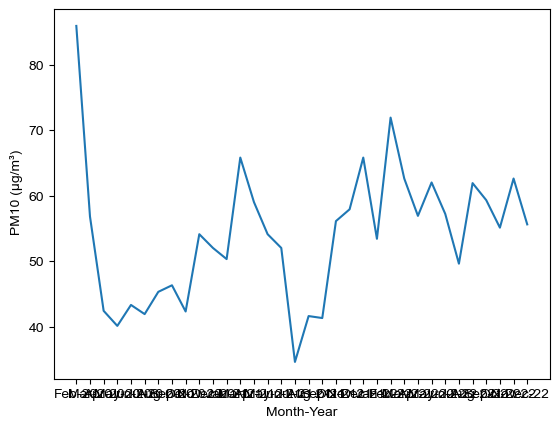

In [40]:
%%time
#Level of PM10 (µg/m³) daily average concentrations of each month of Marden St (Eastern Stack)
sns.lineplot(data=df_air[df_air.columns[4]])
sns.set(rc={'figure.figsize':(25,15)})

<font color='black'><left><h2>Conclusion:<br><br>(i) We can see that the traffic volume is less during covid period in 2020 in comparison with 2019 & 2022.<br><br>(ii) Air quality level is better during covid days in 2020 & 2021 when compared to 2019 & 2022. Lesser the PM10 (µg/m³), lesser will be the air pollution.<br><br>(iii) Owing to this, the result recommends government to promote work from home for at least twice a week, especially in IT and computer operated offices. Reason: These offices were running during pandemic.<br><br>(iv) This is good for people travelling to the office to save travel time.<br><br>(v) This is good for the environment if vehicle pollution can be reduced.</h2></lect></font>

<font color='purple'><center><h1>End: Answering "Impact on traffic volume in March 2020 due to COVID-19 restrictions by comparing March 2019 and March 2022"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Busiest Day of the week"</h1></center></font>

In [41]:
%%time
#Input traffic data set
#Filter and store the data set of October, November and December 2022
df_busy = df_inp_data.copy()
df_busy['Date'] = pd.to_datetime(df_busy['Date'])
df_busy_2 = df_busy[( df_busy['Date'] > pd.to_datetime('2022-10-01') )]

Wall time: 1.32 s


<font color='blue'><center><h2>Data Pre-Processing</h2></center></font>

In [42]:
%%time
#Preprocess and capture week and day in each row of the data set
Day = 0
Week = 1
Days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
Date = pd.to_datetime('2022-10-03')
df_busy_4 = df_busy[( df_busy['Date'] == 0 )]

for x in range(0,len( df_busy_2.Date.unique() )):
    df_busy_3 = df_busy_2[( df_busy_2['Date'] == Date )]
    df_busy_3['Week'] = Week
    df_busy_3['Day'] = Days[Day]
    Date = Date + pd.DateOffset(days=1)
    Day = Day + 1
    df_busy_4 = df_busy_4.append(df_busy_3)
    if Day == 7:
        Day = 0
        Week = Week + 1

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Wall time: 501 ms


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [43]:
%%time
#Display Asset ID, Toll Point ID, Week, Day, Date and Traffic volume of the data set
df_busy_4[['AssetID','TollPointID','Week','Day','Date','TotalVolume']]

Wall time: 15 ms


AssetID TollPointID  Week     Day       Date  TotalVolume
1504      LCT         FNB   1.0  Sunday 2022-10-03           16
1505      LCT         FNB   1.0  Sunday 2022-10-03            0
1506      LCT         FSB   1.0  Sunday 2022-10-03           13
1507      LCT         FSB   1.0  Sunday 2022-10-03            0
1508      LCT         LCE   1.0  Sunday 2022-10-03           63
...       ...         ...   ...     ...        ...          ...
23803     LCT         FSB  13.0  Friday 2022-12-31            0
23804     LCT         LCE  13.0  Friday 2022-12-31           68
23805     LCT         LCE  13.0  Friday 2022-12-31            2
23806     LCT         LCW  13.0  Friday 2022-12-31           64
23807     LCT         LCW  13.0  Friday 2022-12-31            0

[69120 rows x 6 columns]

<font color='blue'><center><h2>Busiest Day of the week - All Directions</h2></center></font>

In [44]:
%%time
#Group by and find busiest day of the week through daily aggregated traffic volume of the toll road cummulative of all directions
for x in range(1,len( df_busy_4.Week.unique() )+1):
    df_busy_5 = df_busy_4[( df_busy_4['Week'] == x )]
    grouped = df_busy_5.groupby(['Week', 'Day'])['TotalVolume'].sum().sort_values(ascending=False)
    print(grouped)

Week  Day      
1.0   Thursday     98143
      Wednesday    94610
      Monday       93808
      Tuesday      92680
      Friday       73421
      Sunday       61948
      Saturday     57534
Name: TotalVolume, dtype: int64
Week  Day      
2.0   Thursday     100293
      Wednesday     94198
      Tuesday       93966
      Friday        91807
      Monday        90292
      Sunday        86179
      Saturday      67317
Name: TotalVolume, dtype: int64
Week  Day      
3.0   Thursday     99174
      Wednesday    96954
      Tuesday      95227
      Monday       90853
      Friday       86875
      Sunday       81664
      Saturday     64252
Name: TotalVolume, dtype: int64
Week  Day      
4.0   Thursday     104302
      Wednesday    102969
      Tuesday       99367
      Friday        96235
      Monday        94097
      Sunday        83849
      Saturday      76189
Name: TotalVolume, dtype: int64
Week  Day      
5.0   Thursday     100956
      Wednesday     99184
      Tuesday       95449


<font color='blue'><center><h2>Busiest Day of the week - Direction = LCE</h2></center></font>

In [45]:
%%time
#Group by and find busiest day of the week through daily aggregated traffic volume of the toll road in direction = LCE
for x in range(1,len( df_busy_4.Week.unique() )+1):
    df_busy_5 = df_busy_4[( df_busy_4['Week'] == x ) & ( df_busy_4['TollPointID'] == 'LCE' )]
    grouped = df_busy_5.groupby(['Week', 'Day'])['TotalVolume'].sum().sort_values(ascending=False)
    print(grouped)

Week  Day      
1.0   Thursday     40271
      Monday       38376
      Tuesday      37725
      Wednesday    37512
      Friday       31116
      Sunday       27069
      Saturday     24210
Name: TotalVolume, dtype: int64
Week  Day      
2.0   Thursday     40539
      Tuesday      37343
      Wednesday    37234
      Friday       37210
      Monday       35064
      Sunday       34929
      Saturday     27643
Name: TotalVolume, dtype: int64
Week  Day      
3.0   Thursday     39610
      Wednesday    38647
      Tuesday      37880
      Friday       36230
      Monday       36065
      Sunday       32297
      Saturday     26899
Name: TotalVolume, dtype: int64
Week  Day      
4.0   Thursday     41226
      Wednesday    40236
      Friday       39176
      Tuesday      38321
      Monday       37563
      Sunday       33615
      Saturday     31597
Name: TotalVolume, dtype: int64
Week  Day      
5.0   Thursday     39988
      Wednesday    39026
      Tuesday      37397
      Friday     

<h2><center>Conslusion: Thursday is mostly the busiest day of the week since the daily aggregated traffic volume count is high on this day for the months October, November and December 2022

<font color='green'><center><h2><u>Thursday Traffic Volume Trend in TollPointID LCE</u></h2></center></font>

<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [46]:
%%time
df_peak_thursday = df_inp_data.copy()
df_peak_thursday['Date'] = pd.to_datetime(df_peak_thursday['Date'])
df_peak_thursday['Year-Month-Day-Time'] = df_peak_thursday['Date'].dt.strftime('%Y-%m-%d') + " " + df_peak_thursday['IntervalStart'].str.slice(0, 2) + ":00"
df_peak_thursday_2 = df_peak_thursday[( df_peak_thursday['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak_thursday['TollPointID'] == "LCE" )]

Wall time: 27.1 s


In [47]:
%%time
#Creating a dataframe with hour and its total volume
df_peak_thursday_2 = df_peak_thursday_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_thursday_3 = df_peak_thursday_2.to_frame()
df_peak_thursday_3.to_csv('fri-day.csv')
df_peak_thursday_4 = pd.read_csv("C:/Users/USER/Documents/Toll/fri-day.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_peak_thursday_4['Time'] = df_peak_thursday_4['Year-Month-Day-Time'].str.slice(11, 16)
df_peak_thursday_4['Year-Month-Day-Time'] = pd.to_datetime(df_peak_thursday_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_peak_thursday_4 = df_peak_thursday_4.set_index("Year-Month-Day-Time")

Wall time: 29.2 ms


<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [48]:
%%time
def dt_feature_creation_thursday(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


<font color='green'><center><h2><u>Add features to dataset</u></h2></center></font>

In [49]:
%%time
df_peak_thursday_5 = dt_feature_creation_thursday(df_peak_thursday_4)

Wall time: 0 ns


<font color='green'><center><h2><u>Filter Thursday dataset</u></h2></center></font>

In [50]:
%%time
df_peak_thursday_6 = df_peak_thursday_5[df_peak_thursday_5['Day of the week'] == 3]

Wall time: 0 ns


<font color='green'><center><h2><u>Plot Thursday dataset</u></h2></center></font>

Wall time: 622 ms


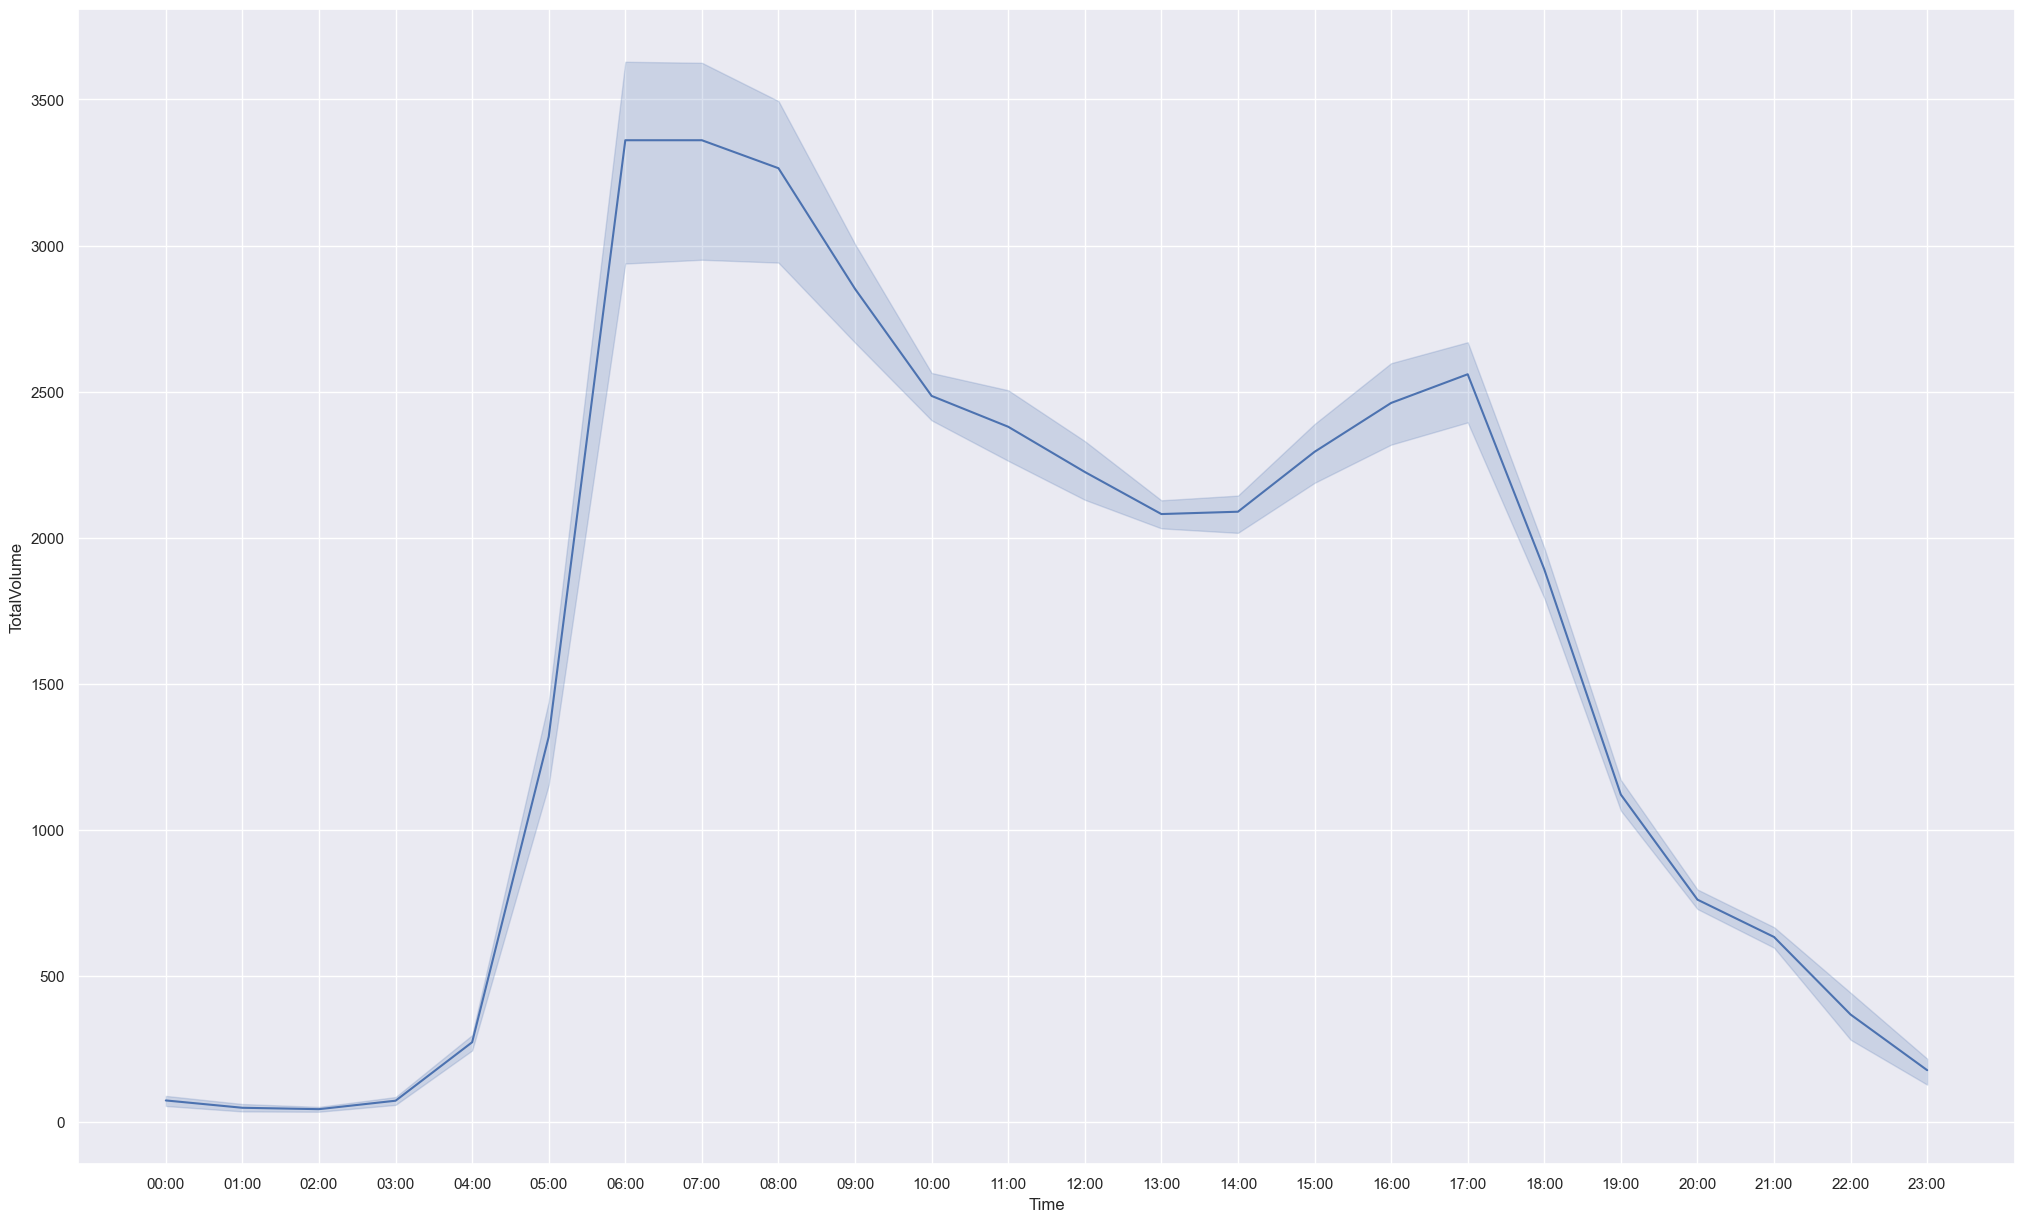

In [51]:
%%time
sns.lineplot(x=df_peak_thursday_6["Time"], y=df_peak_thursday_6["TotalVolume"], data=df_peak_thursday_6)
sns.set(rc={'figure.figsize':(20,8)})

<font color='green'><center><h2><u>Display Thursday dataset table</u></h2></center></font>

In [52]:
%%time
df_peak_thursday_6

Wall time: 0 ns


TotalVolume   Time  Hour  Day of the week  Quarter  \
Year-Month-Day-Time                                                       
2022-10-06 00:00:00           69  00:00     0                3        4   
2022-10-06 01:00:00           42  01:00     1                3        4   
2022-10-06 02:00:00           34  02:00     2                3        4   
2022-10-06 03:00:00           93  03:00     3                3        4   
2022-10-06 04:00:00          260  04:00     4                3        4   
...                          ...    ...   ...              ...      ...   
2022-12-29 19:00:00          860  19:00    19                3        4   
2022-12-29 20:00:00          780  20:00    20                3        4   
2022-12-29 21:00:00          702  21:00    21                3        4   
2022-12-29 22:00:00          525  22:00    22                3        4   
2022-12-29 23:00:00          242  23:00    23                3        4   

                     Month  Year  Day of the year  
Year-Month-Day-Time                                
2022-10-06 00:00:00     10  2022              279  
2022-10-06 01:00:00     10  2022              279  
2022-10-06 02:00:00     10  2022              279  
2022-10-06 03:00:00     10  2022              279  
2022-10-06 04:00:00     10  2022              279  
...                    ...   ...              ...  
2022-12-29 19:00:00     12  2022              363  
2022-12-29 20:00:00     12  2022              363  
2022-12-29 21:00:00     12  2022              363  
2022-12-29 22:00:00     12  2022              363  
2022-12-29 23:00:00     12  2022              363  

[312 rows x 8 columns]

<h2>Conclusion:</h2>
<h3>
(i) Looking at the above graphs, peak hours during daytime on Thursday are 6.00am – 10.00am and 2.00pm – 6.00pm.
<br><br>(ii) The project suggests the government to alert the following services during this time duration.
<br>&emsp;&emsp;Emergency Ambulance Services.
<br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br>&emsp;&emsp;Increase public transport during this day and provide concession on fares, which creates job opportunities <br>&emsp;&emsp;in transport and reduces car accidents & ensures public safety.
<br><br>(iii) These are essential to ensure customer safety.
<br><br>(iv) Government can get revenue from speeding fines.
<br><br>(v) Automobile service companies can benefit from service works.
</h3>

<font color='purple'><center><h1>End: Answering "Busiest Day of the week"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Peak and Off-Peak Traffic Hours"</h1></center></font>

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID LCW in October, November and December 2022</h2></center></font>

In [53]:
%%time
#Input traffic data set
#Filter and store the data set of October, November and December 2022 having TollPointID as LCW
df_peak = df_inp_data.copy()
df_peak['Date'] = pd.to_datetime(df_peak['Date'])
df_peak['Year-Month-Day-Time'] = df_peak['Date'].dt.strftime('%Y-%m-%d') + " " + df_peak['IntervalStart'].str.slice(0, 2) + ":00"
df_peak_2 = df_peak[( df_peak['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak['TollPointID'] == "LCW" )]

Wall time: 28.8 s


In [54]:
%%time
#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

Wall time: 15.7 ms


In [55]:
%%time
#Display the dataframe with hour and its total volume
df_peak_5

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume
0       2022-10-01 00:00          407
1       2022-10-01 01:00          226
2       2022-10-01 02:00          188
3       2022-10-01 03:00          151
4       2022-10-01 04:00          137
...                  ...          ...
2202    2022-12-31 19:00          515
2203    2022-12-31 20:00          351
2204    2022-12-31 21:00          637
2205    2022-12-31 22:00          766
2206    2022-12-31 23:00          417

[2207 rows x 2 columns]

In [56]:
%%time
#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)
df_peak_5

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume   Time
0       2022-10-01 00:00          407  00:00
1       2022-10-01 01:00          226  01:00
2       2022-10-01 02:00          188  02:00
3       2022-10-01 03:00          151  03:00
4       2022-10-01 04:00          137  04:00
...                  ...          ...    ...
2202    2022-12-31 19:00          515  19:00
2203    2022-12-31 20:00          351  20:00
2204    2022-12-31 21:00          637  21:00
2205    2022-12-31 22:00          766  22:00
2206    2022-12-31 23:00          417  23:00

[2207 rows x 3 columns]

Wall time: 734 ms


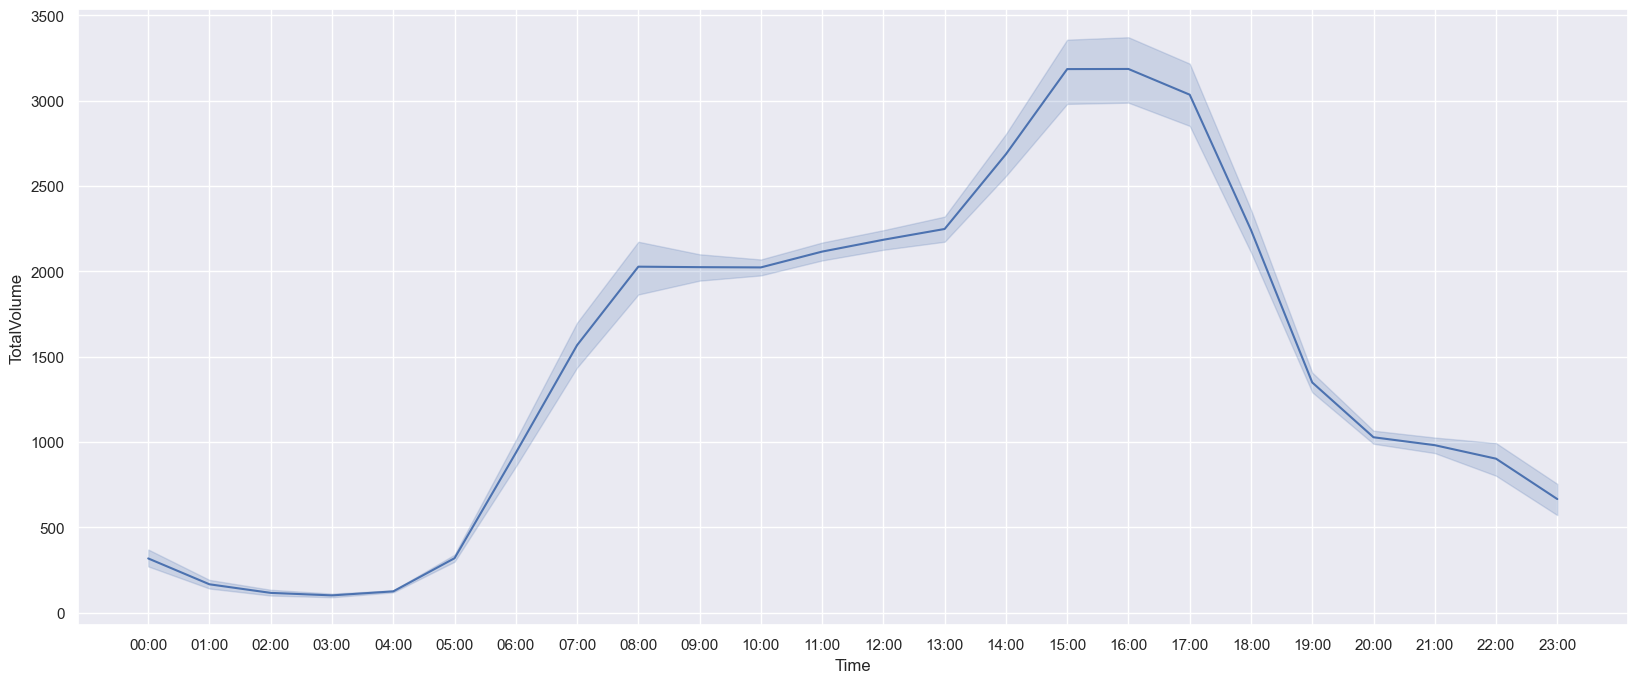

In [57]:
%%time
#Plot hourly traffic volume line graph for July, August and September 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID LCW in Jan 2010 - Dec 2022</h2></center></font>

Wall time: 2.62 s


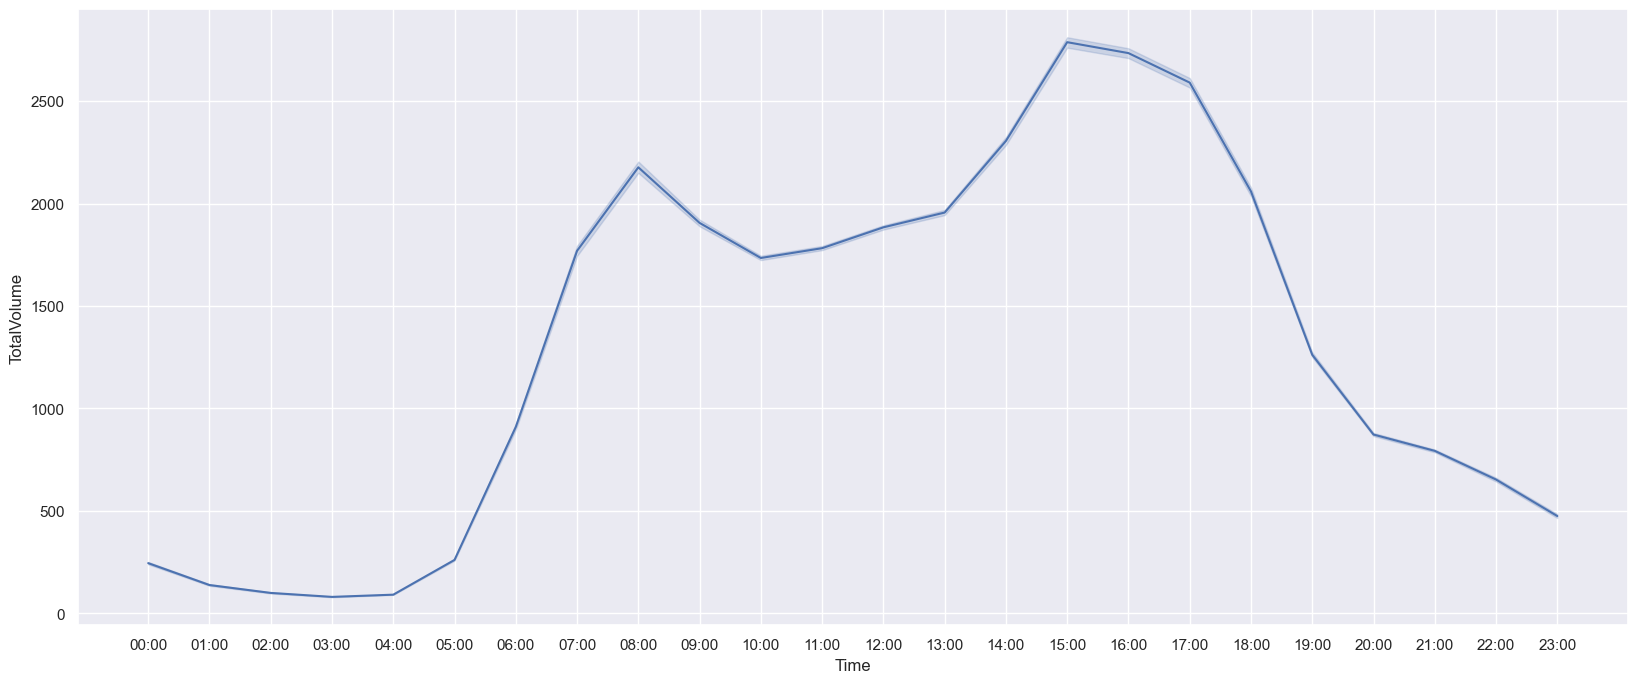

In [58]:
%%time
#Filter TollPointID as LCW
df_peak_2 = df_peak[( df_peak['TollPointID'] == "LCW" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for Jan 2010 - Dec 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID FSB in October, November and December 2022</h2></center></font>

Wall time: 881 ms


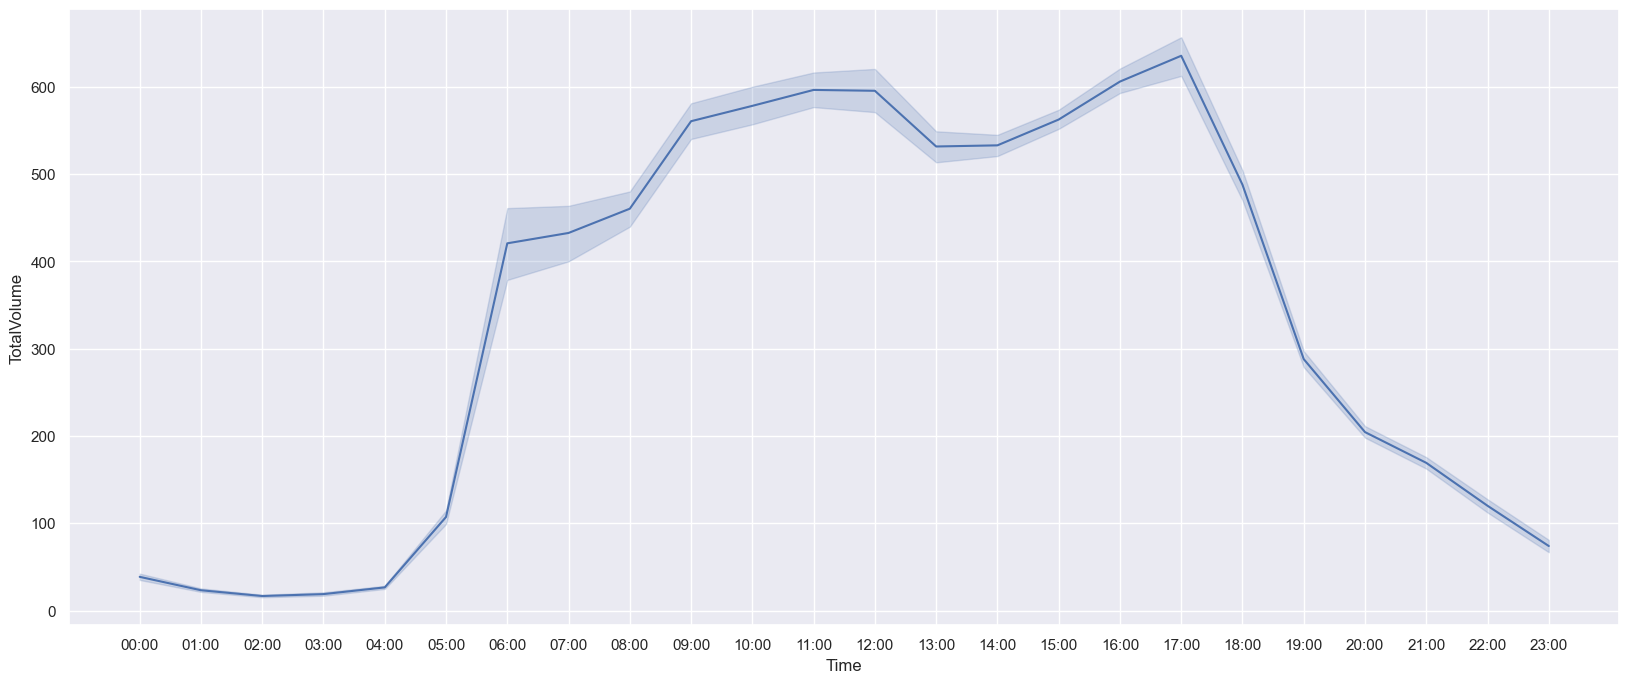

In [59]:
%%time
#Filter and store the data set of October, November and December 2022 having TollPointID as FSB
df_peak_2 = df_peak[( df_peak['Date'] >= pd.to_datetime('2022-10-01') ) & ( df_peak['TollPointID'] == "FSB" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for October, November and December 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID FSB in Jan 2010 - Dec 2022</h2></center></font>

Wall time: 2.54 s


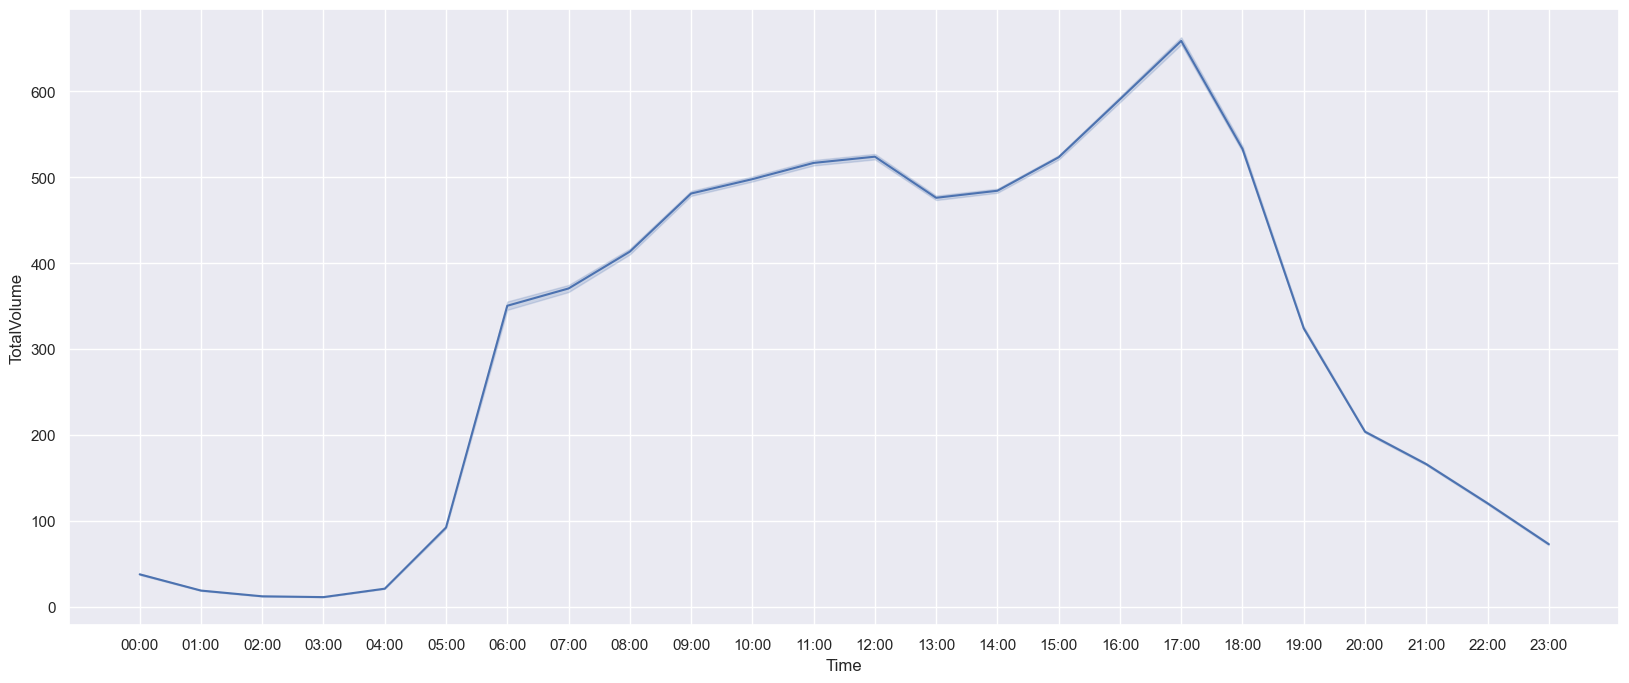

In [60]:
%%time
#Filter TollPointID as FSB
df_peak_2 = df_peak[( df_peak['TollPointID'] == "FSB" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for Jan 2010 - Dec 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID LCE in October, November and December 2022</h2></center></font>

Wall time: 906 ms


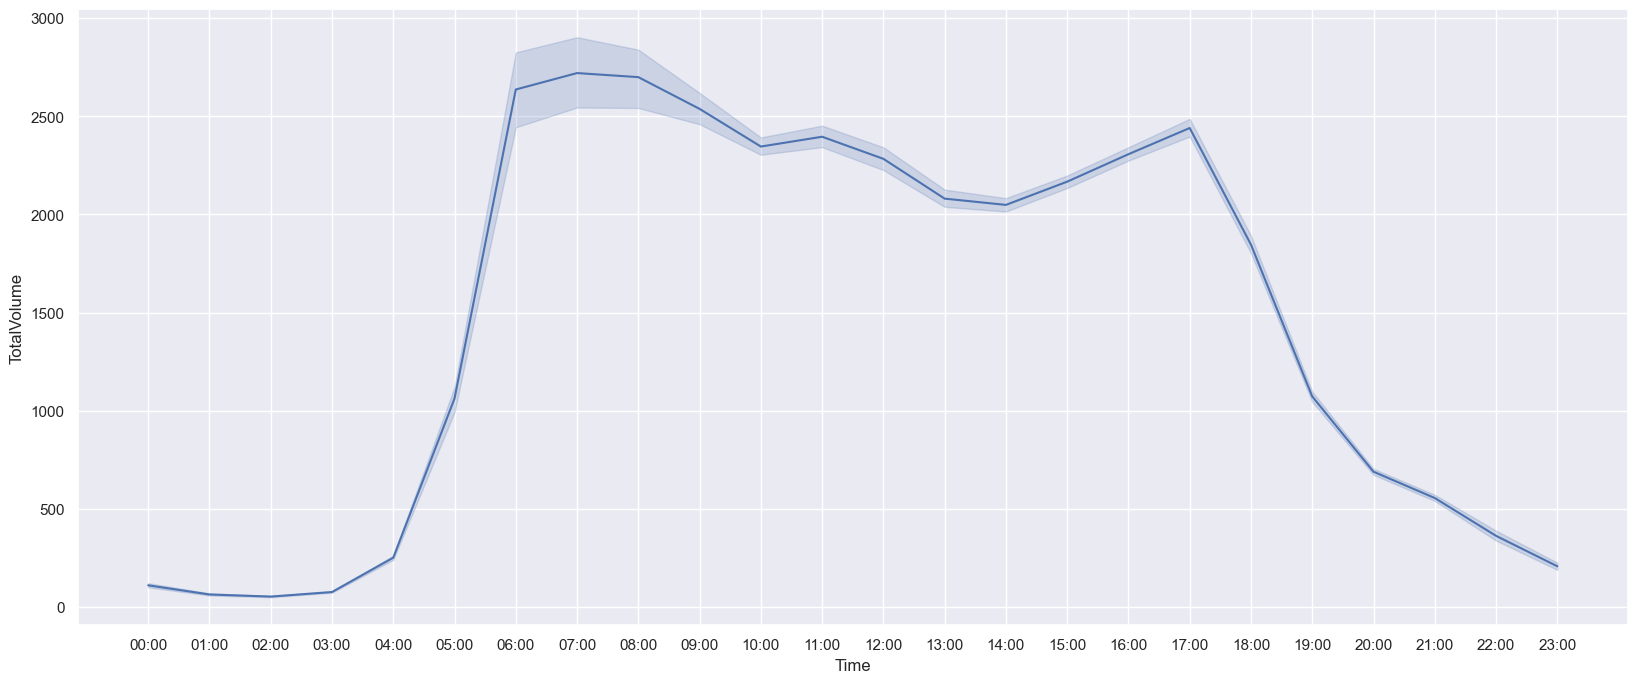

In [61]:
%%time
#Filter and store the data set of October, November and December 2022 having TollPointID as LCE
df_peak_2 = df_peak[( df_peak['Date'] >= pd.to_datetime('2022-07-01') ) & ( df_peak['TollPointID'] == "LCE" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for October, November and December 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='blue'><center><h2>Peak and Off-Peak Traffic: For TollPointID LCE in Jan 2010 - Dec 2022</h2></center></font>

Wall time: 2.73 s


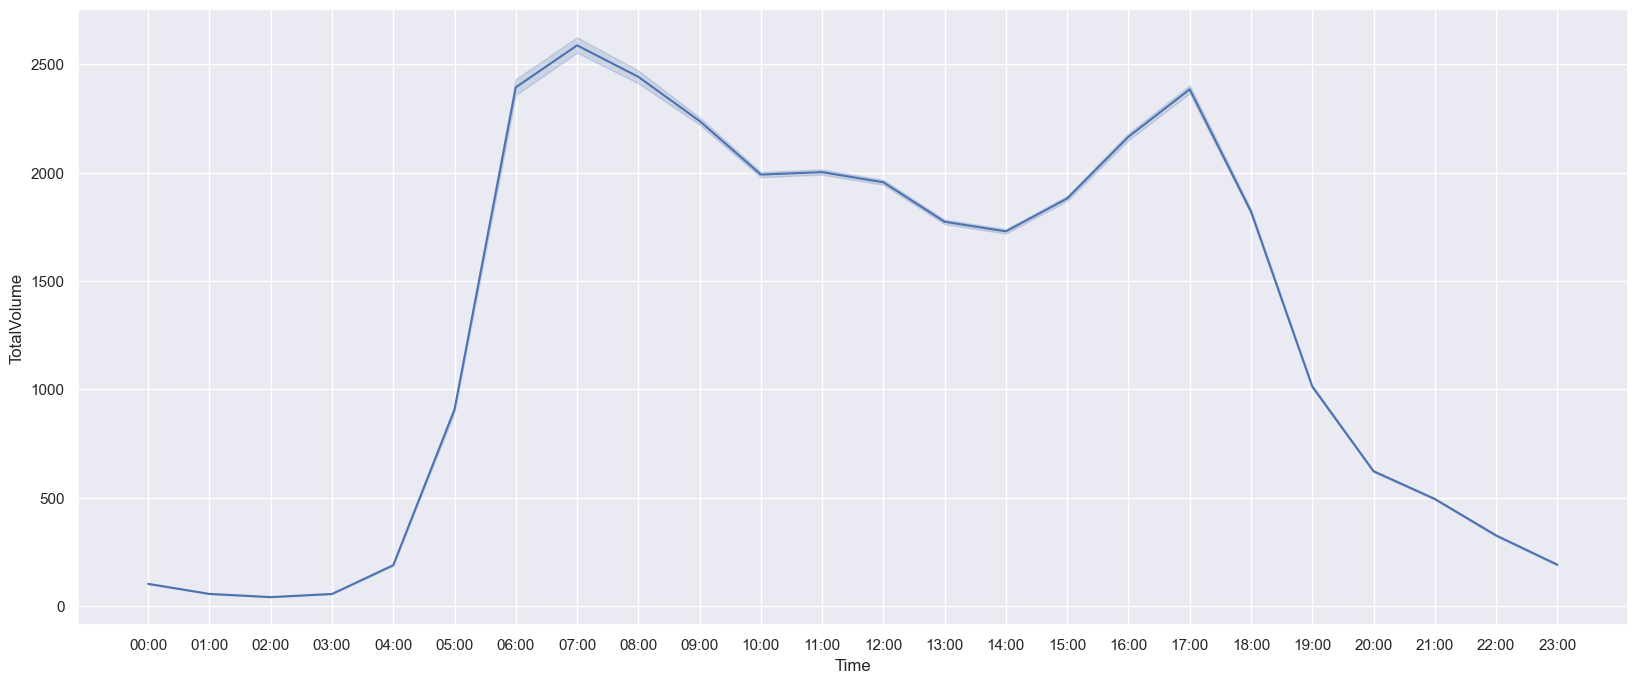

In [62]:
%%time
#Filter TollPointID as LCE
df_peak_2 = df_peak[( df_peak['TollPointID'] == "LCE" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for Jan 2010 - Dec 2022
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<font color='purple'><center><h1>End: Answering "Peak and Off-Peak Traffic Hours"</h1></center></font>

<font color='blue'><center><h2>NSW Crash Data Analysis</h2></center></font>

<font color='green'><center><h2><u>Read Input Data</u></h2></center></font>

In [63]:
%%time
df_crash_inp = pd.read_excel("C:/Users/USER/Documents/Toll/Crash/NSW_Road_Crash_Data_2017-2021_CRASH.xlsx")

Wall time: 49 s


In [64]:
%%time
df_crash = df_crash_inp.copy()
df_crash

Wall time: 15.5 ms


Crash ID         Degree of crash Degree of crash - detailed  \
0        1122708                   Fatal                      Fatal   
1        1122709                   Fatal                      Fatal   
2        1122710                   Fatal                      Fatal   
3        1123942                   Fatal                      Fatal   
4        1123948                   Fatal                      Fatal   
...          ...                     ...                        ...   
101713   1298478                  Injury         Minor/Other Injury   
101714   1298482                  Injury         Minor/Other Injury   
101715   1299029  Non-casualty (towaway)     Non-casualty (towaway)   
101716   1299030  Non-casualty (towaway)     Non-casualty (towaway)   
101717   1299039                   Fatal                      Fatal   

        Reporting year  Year of crash Month of crash Day of week of crash  \
0                 2017           2017        January               Monday   
1                 2017           2017        January               Monday   
2                 2017           2017        January              Tuesday   
3                 2017           2017        January             Thursday   
4                 2017           2017        January             Saturday   
...                ...            ...            ...                  ...   
101713            2021           2021            May              Tuesday   
101714            2021           2021           July             Saturday   
101715            2021           2021       February              Tuesday   
101716            2021           2021       November               Monday   
101717            2021           2021        October             Saturday   

       Two-hour intervals Street of crash Street type  ...  \
0           18:00 - 19:59       HOLLOWAYS          RD  ...   
1           12:00 - 13:59           PUTTY          RD  ...   
2           14:00 - 15:59      IRRIGATION         WAY  ...   
3           10:00 - 11:59          VARDYS          RD  ...   
4           12:00 - 13:59         PRINCES         HWY  ...   
...                   ...             ...         ...  ...   
101713      10:00 - 11:59      EMPIRE BAY          DR  ...   
101714      12:00 - 13:59    DENHAM COURT          RD  ...   
101715      06:00 - 07:59        MARYLAND          DR  ...   
101716      16:00 - 17:59       MONA VALE          RD  ...   
101717      16:00 - 17:59          MARKET          ST  ...   

                  DCA - description DCA supplement     First impact type  \
0               Off cway right bend           Left              Rollover   
1                     Opp - Head on            NaN               Head-on   
2                 Same - Rear right            NaN              Rear end   
3              Ped - On carriageway            NaN  Vehicle - Pedestrian   
4                     Opp - Head on            NaN               Head-on   
...                             ...            ...                   ...   
101713       Off left bend into obj           Left      Vehicle - Object   
101714             Opp - Right-thru            NaN           Other angle   
101715             Opp - Right-thru            NaN           Other angle   
101716  On path - Previous accident            NaN           Other angle   
101717              On path - Other            NaN      Vehicle - Object   

              Key TU type                   Other TU type  \
0           Station wagon                             NaN   
1              Motorcycle                     Light truck   
2            Artic tanker               Car (sedan/hatch)   
3            Semi-trailer                      Pedestrian   
4       Car (sedan/hatch)                   4 wheel drive   
...                   ...                             ...   
101713  Car (sedan/hatch)                             NaN   
101714  Car (sedan/hatch)               Car (sedan/hatch)   
101715      4 wheel dri

<font color='green'><center><h2><u>Display Day of week of crash in sorted order</u></h2></center></font>

In [65]:
%%time
df_crash_2 = df_crash[( df_crash['Road classification (admin)']  == "State") & (df_crash['Year of crash']  >= 2017) 
                      & (df_crash['Year of crash']  <= 2021)]
df_crash_3 = df_crash_2.groupby(['Day of week of crash'])['No. moderately injured'].sum().sort_values(ascending=False)
df_crash_3

Wall time: 31.2 ms


Day of week of crash
Friday       2804
Thursday     2703
Saturday     2603
Wednesday    2531
Tuesday      2450
Monday       2414
Sunday       2084
Name: No. moderately injured, dtype: int64

<font color='green'><center><h2><u>Display Hourly crash in sorted order</u></h2></center></font>

In [66]:
%%time
df_crash_4 = df_crash_2.groupby(['Two-hour intervals'])['No. moderately injured'].sum().sort_values(ascending=False)
df_crash_4.head(12)

Wall time: 0 ns


Two-hour intervals
16:00 - 17:59       2637
14:00 - 15:59       2492
12:00 - 13:59       2095
10:00 - 11:59       1865
08:00 - 09:59       1860
18:00 - 19:59       1722
06:00 - 07:59       1517
20:00 - 21:59       1178
22:00 - Midnight     774
04:00 - 05:59        616
00:01 - 01:59        457
02:00 - 03:59        375
Name: No. moderately injured, dtype: int64

<h2>Conclusion:</h2>
<h3>
(i) To generalize, Peak hours in daytime are: 6.00am - 10.00am and 2.00pm - 6.00pm
<br><br>(ii) Off-Peak hours in daytime are: 10.00am - 2.00pm
<br><br>(iii) A moderately injured crash in NSW above 300 / two hours is between 6.00am and 8:00pm.
<br><br>(iv) It is recommended that the government to alert and provide the following services in particularly during high traffic hours.
<br>&emsp;&emsp;Emergency Ambulance Services.
<br><br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br><br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br><br>&emsp;&emsp;Have rest areas opened in toll roads having more than 20 kilometers distance.
<br><br>&emsp;&emsp;Have coffee shops near rest areas during high traffic hours which will be a potential revenue generator which <br>&emsp;&emsp;is not the case currently on toll roads having more than 20 kilometers distance. In the project, toll road “Hills <br>&emsp;&emsp;M2” is used which is 21.4-kilometer distance motorway.
<br><br>&emsp;&emsp;Recommend offices to follow flexible day working hours so that traffic will not be bombarded during morning <br>&emsp;&emsp;& evening traffic hours instead it will be distributed during daytime.
<br><br>&emsp;&emsp;Increase public transport during high traffic hours to promote people to reduce travel by car, which can create <br>&emsp;&emsp;job opportunities in transport and reduce car accidents & ensure public safety.
<br><br>(v) By doing so, customer safety can be ensured.
<br><br>(vi) Government can get revenue from speeding fines.
<br><br>(vii) Automobile service companies can benefit from service works.
<br><br>(viii) Coffee shops can generate revenue.
</h3>

<font color='purple'><center><h1>Start: Answering "Special events can affect/change the daily seasonal traffic pattern which will be fetched and shown"</h1></center></font>

<font color='green'><center><h2><u>New Year Day</u></h2></center></font>

Wall time: 319 ms


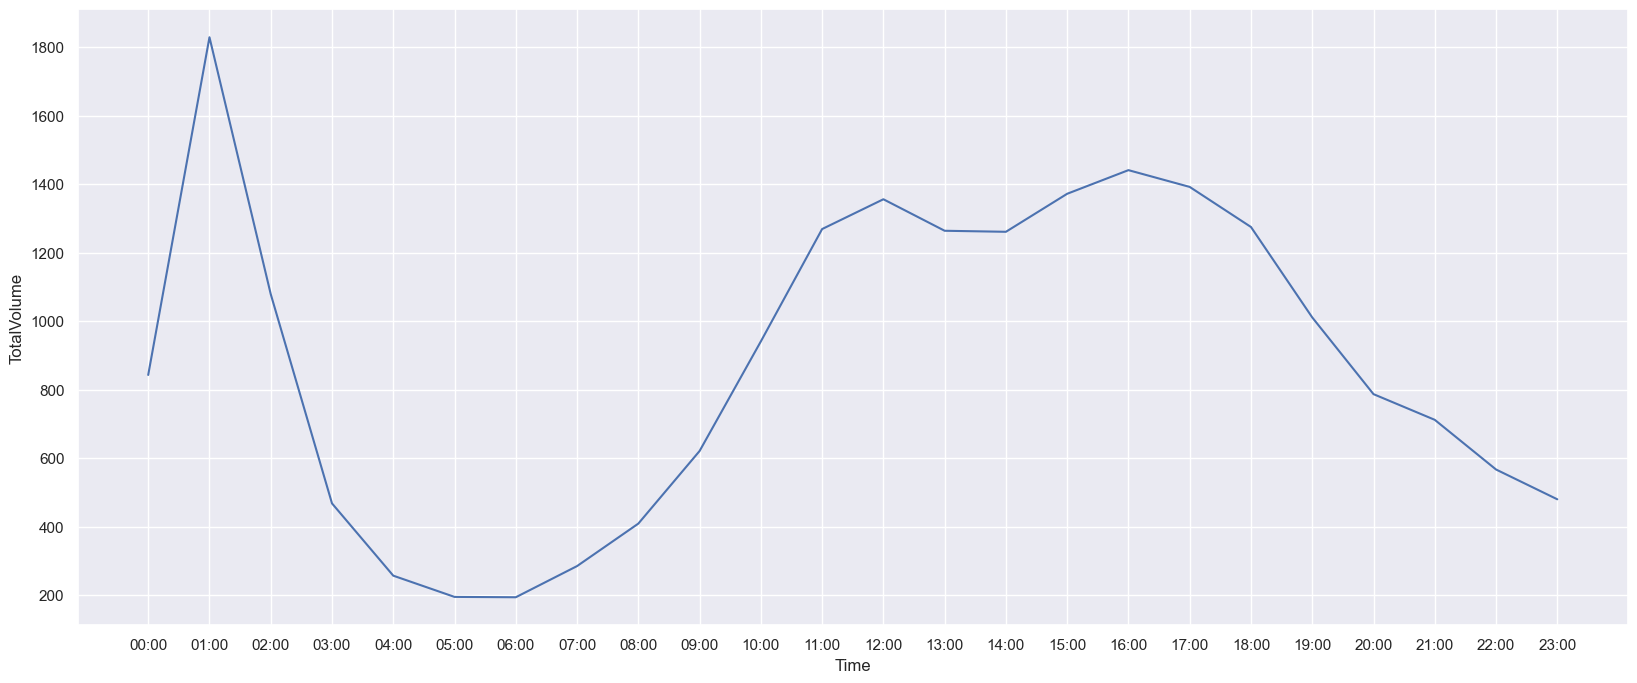

In [67]:
%%time
#Filter the dataset 1st Jan 2018 having TollPointID as LCW and not LCE
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2018-01-01') ) & ( df_peak['TollPointID'] == "LCW" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 281 ms


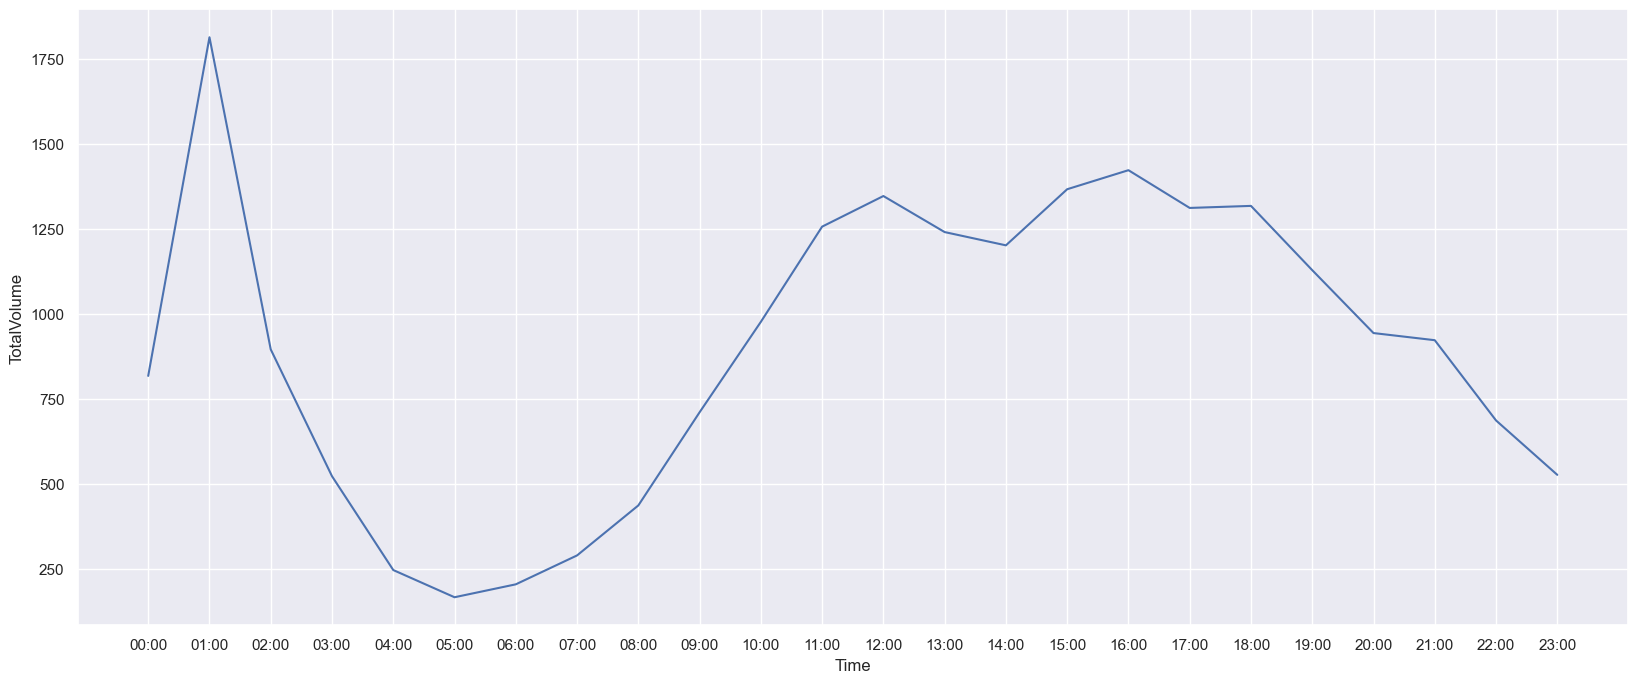

In [68]:
%%time
#Filter the dataset 1st Jan 2019 having TollPointID as LCW and not LCE
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2019-01-01') ) & ( df_peak['TollPointID'] == "LCW" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 265 ms


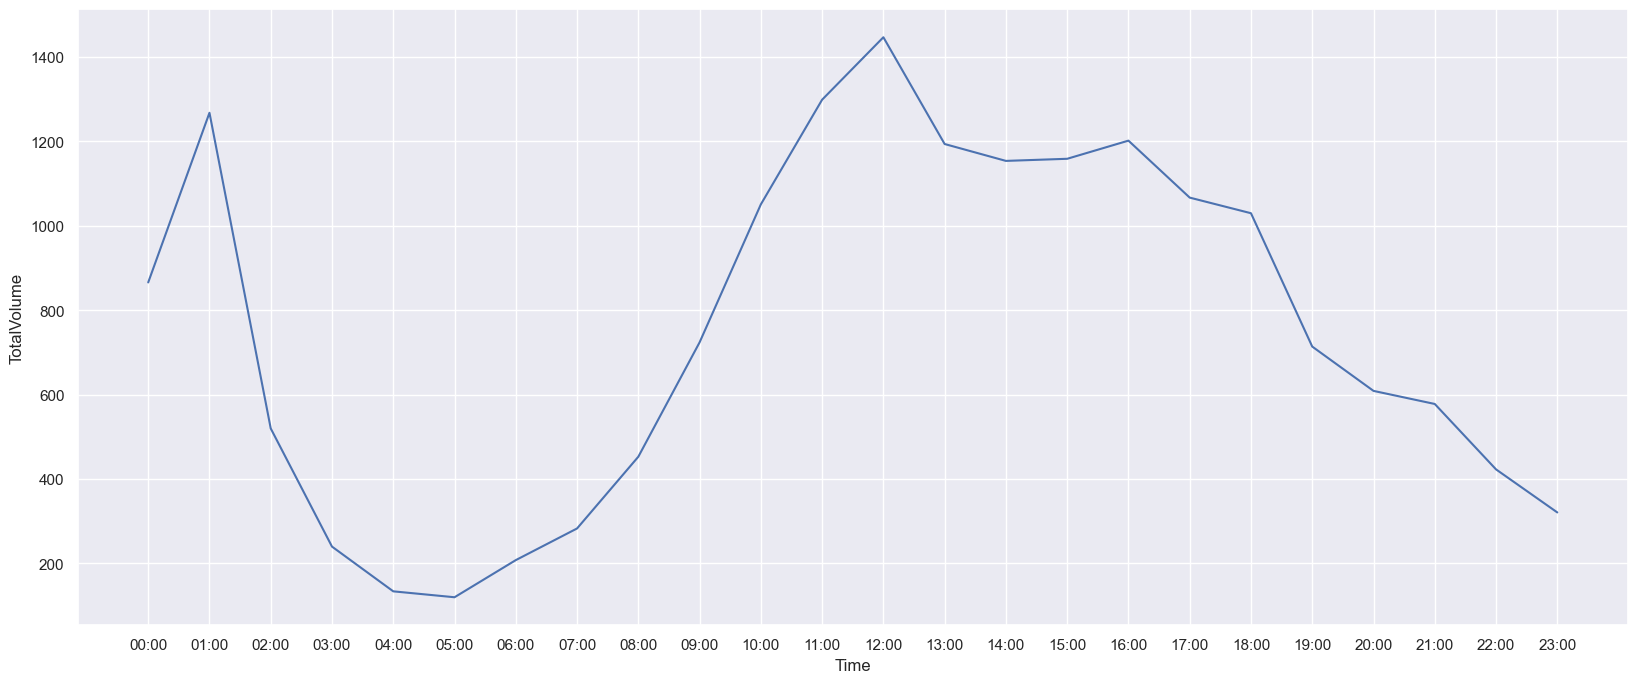

In [69]:
%%time
#Filter the dataset 1st Jan 2022 having TollPointID as LCW and not LCE
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2022-01-01') ) & ( df_peak['TollPointID'] == "LCW" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<h2>Conclusion:</h2>
<h3>
(i) As per the above descriptive analytics, every year, at the start of the year, 01st Jan 00:30 – 2:30 AM, vehicle traffic was high due to people returning home after celebrating New Year Eve in the city center. This trend can advise people to plan their travel via the toll road.
<br><br>(ii) So, it is recommended for the government to alert following services during this time.
<br><br>&emsp;&emsp;Emergency Ambulance Services.
<br><br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br><br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br><br>&emsp;&emsp;Increasing speeding fine charges.
<br><br>(iii) This will ensure customer safety.
<br><br>(iv) Government can get revenue from speeding fines.
<br><br>(v) Automobile service companies can benefit from service works.
</h3>

<font color='green'><center><h2><u>Christmas Day</u></h2></center></font>

Wall time: 297 ms


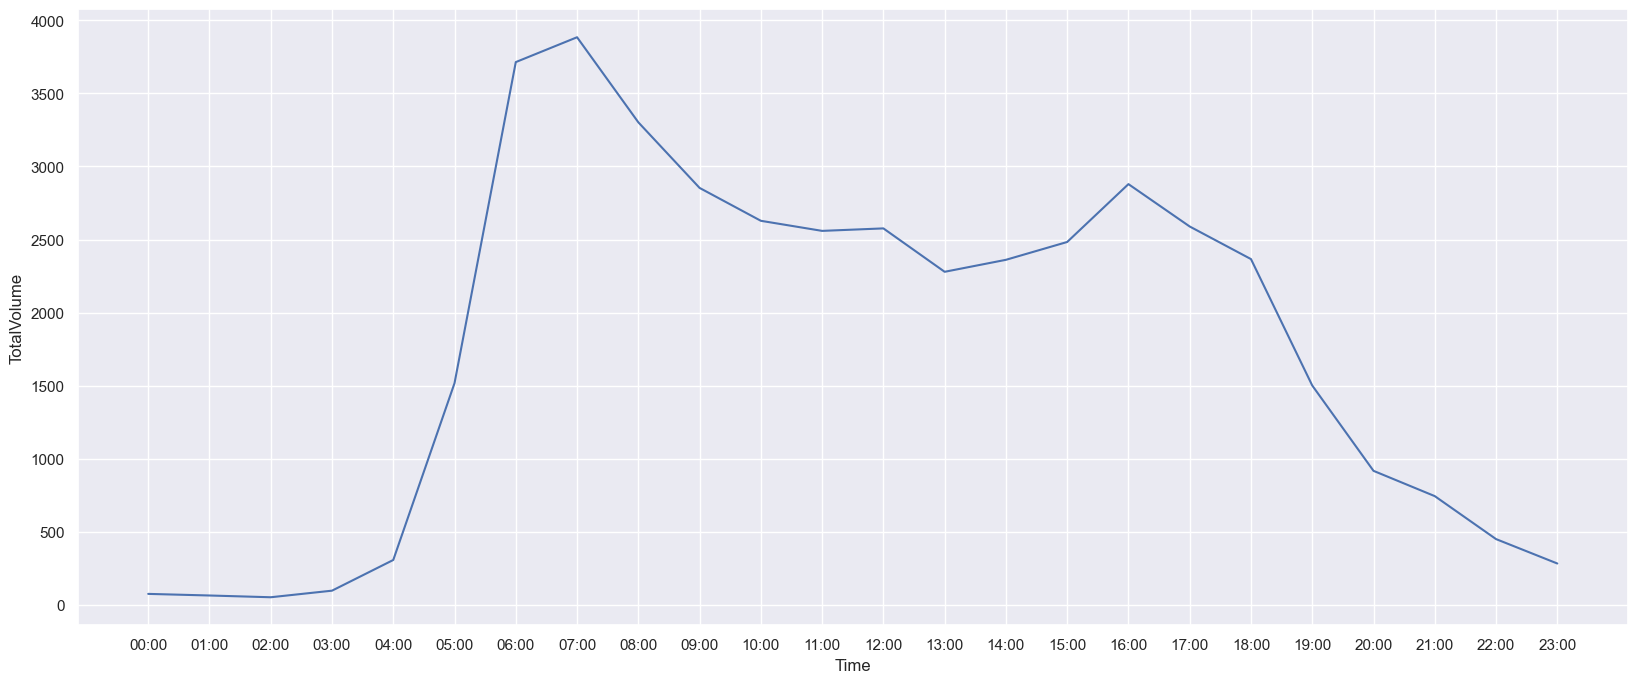

In [70]:
%%time
#Filter the dataset 25th Dec 2018 having TollPointID as LCE
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2018-01-25') ) & ( df_peak['TollPointID'] == "LCE" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 266 ms


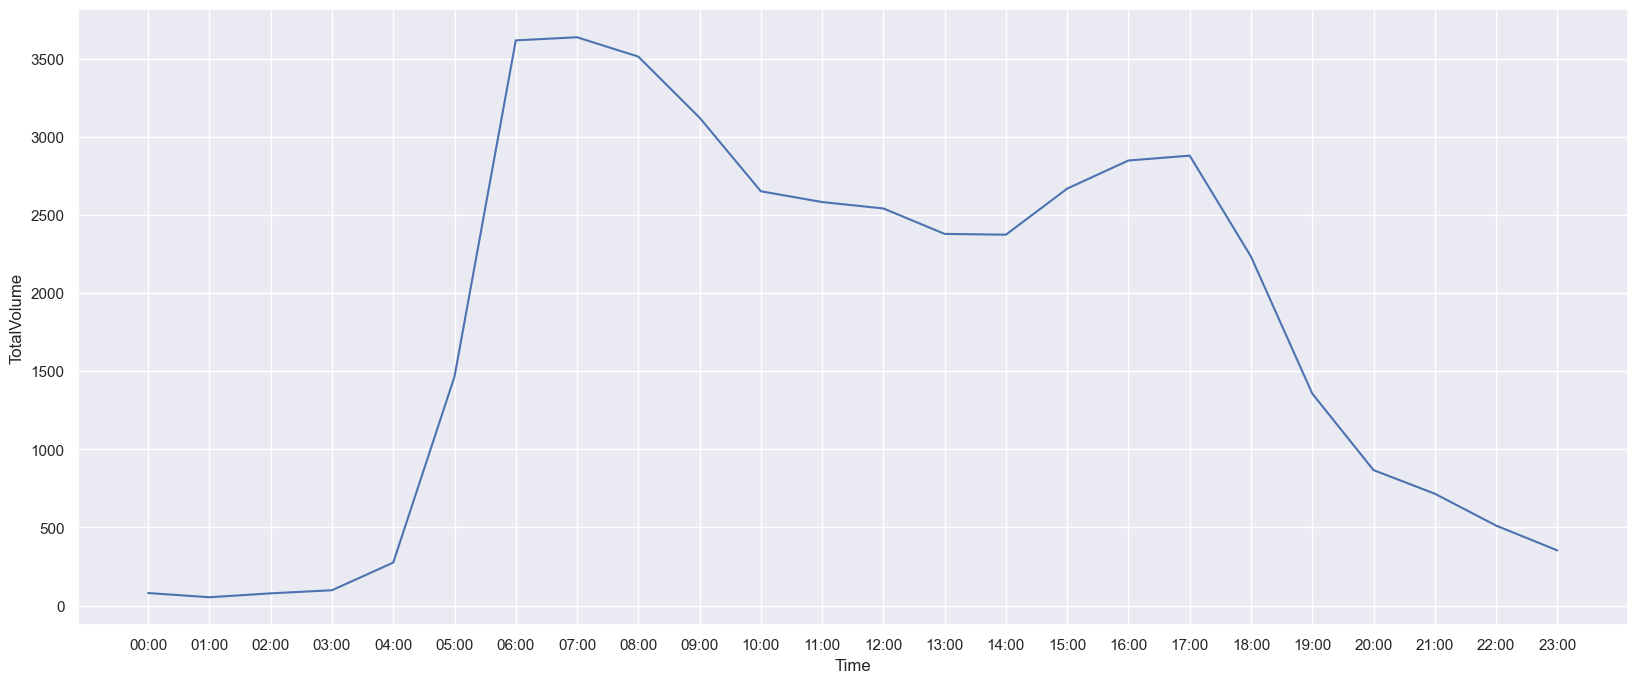

In [71]:
%%time
#Filter the dataset 25th Dec 2019 having TollPointID as LCE
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2019-01-25') ) & ( df_peak['TollPointID'] == "LCE" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 281 ms


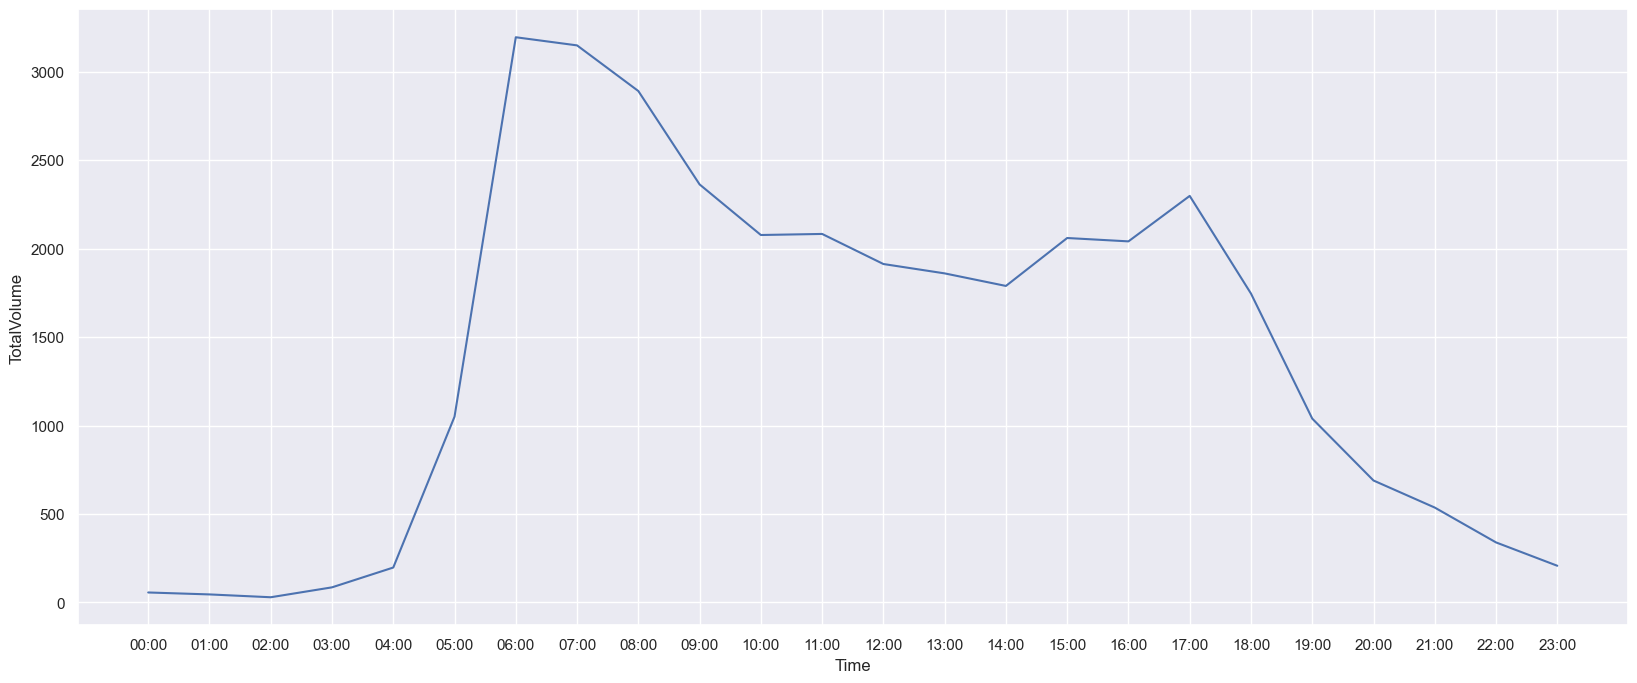

In [72]:
%%time
#Filter the dataset 25th Dec 2022 having TollPointID as LCE
df_peak_2 = df_peak[( df_peak['Date'] == pd.to_datetime('2022-01-25') ) & ( df_peak['TollPointID'] == "LCE" )]

#Creating a dataframe with hour and its total volume
df_peak_3 = df_peak_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_peak_4 = df_peak_3.to_frame()
df_peak_4.to_csv('peak.csv')
df_peak_5 = pd.read_csv("C:/Users/USER/Documents/Toll/peak.csv")

#Display the dataframe with hour, Time in a seperate column and its total volume
df_peak_5['Time'] = df_peak_5['Year-Month-Day-Time'].str.slice(11, 16)

#Plot hourly traffic volume line graph for this date
sns.lineplot(x=df_peak_5["Time"], y=df_peak_5["TotalVolume"], data=df_peak_5)
sns.set(rc={'figure.figsize':(20,8)})

<h2>Conclusion:</h2>
<h3>
(i) Looking at the above graphs, peak hours during daytime on Christmas are 6.00am – 10.00am and 2.00pm – 6.00pm.
<br><br>(ii) The project suggests the government to alert the following services during this time duration.
<br><br>&emsp;&emsp;Emergency Ambulance Services.
<br><br>&emsp;&emsp;Car Repair / Breakdown Assistance.
<br><br>&emsp;&emsp;Mobile Speed Camera to control speed.
<br><br>&emsp;&emsp;Increasing speeding fine charges.
<br><br>(iii) These are essential to ensure customer safety.
<br><br>(iv) Government can get revenue from speeding fines.
<br><br>(v) Automobile service companies can benefit from service works.
</h3>

<font color='purple'><center><h1>End: Answering "Special events can affect/change the daily seasonal traffic pattern which will be fetched and shown" of the dissertation</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Train and test the hourly traffic volume of cars and trucks in the historical data between 2010 & 2022 and will predict the next hour traffic volume as a short-range prediction"</h1></center></font>

<font color='blue'><center><h2>Model 1: ARIMA</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [67]:
%%time
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#Auto correlation - To know how many previous data we have to take. 
#p,d,q. p - AR Model Lags, d - Differencing / Integration, q - Moving Average Lags
#q is determined from ACF and p from PACF
#In ACF if band is increasing then the error part is increasing
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA is used when the dataset is non seasonal
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

Wall time: 1.46 s


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [68]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as LCE
df_arima = df_inp_data.copy()
df_arima['Date'] = pd.to_datetime(df_arima['Date'])
df_arima['Year-Month-Day-Time'] = df_arima['Date'].dt.strftime('%Y-%m-%d') + " " + df_arima['IntervalStart'].str.slice(0, 2) + ":00"
df_arima_1 = df_arima[df_arima['TollPointID'] == "LCE"]

Wall time: 57 s


In [69]:
%%time
#Creating a dataframe with hour and its total volume
df_arima_2 = df_arima_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_arima_3 = df_arima_2.to_frame()
df_arima_3.to_csv('arima.csv')
df_arima_4 = pd.read_csv("C:/Users/USER/Documents/Toll/arima.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_arima_4['Year-Month-Day-Time'] = pd.to_datetime(df_arima_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_arima_4 = df_arima_4.set_index("Year-Month-Day-Time")

Wall time: 1.02 s


In [70]:
%%time
#Display the dataframe with hour and its total volume
df_arima_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00           92
2010-01-01 01:00:00          159
2010-01-01 02:00:00          135
2010-01-01 03:00:00          104
2010-01-01 04:00:00          107
...                          ...
2022-12-31 19:00:00         1151
2022-12-31 20:00:00          859
2022-12-31 21:00:00          692
2022-12-31 22:00:00          625
2022-12-31 23:00:00          465

[113934 rows x 1 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

Wall time: 5.78 s


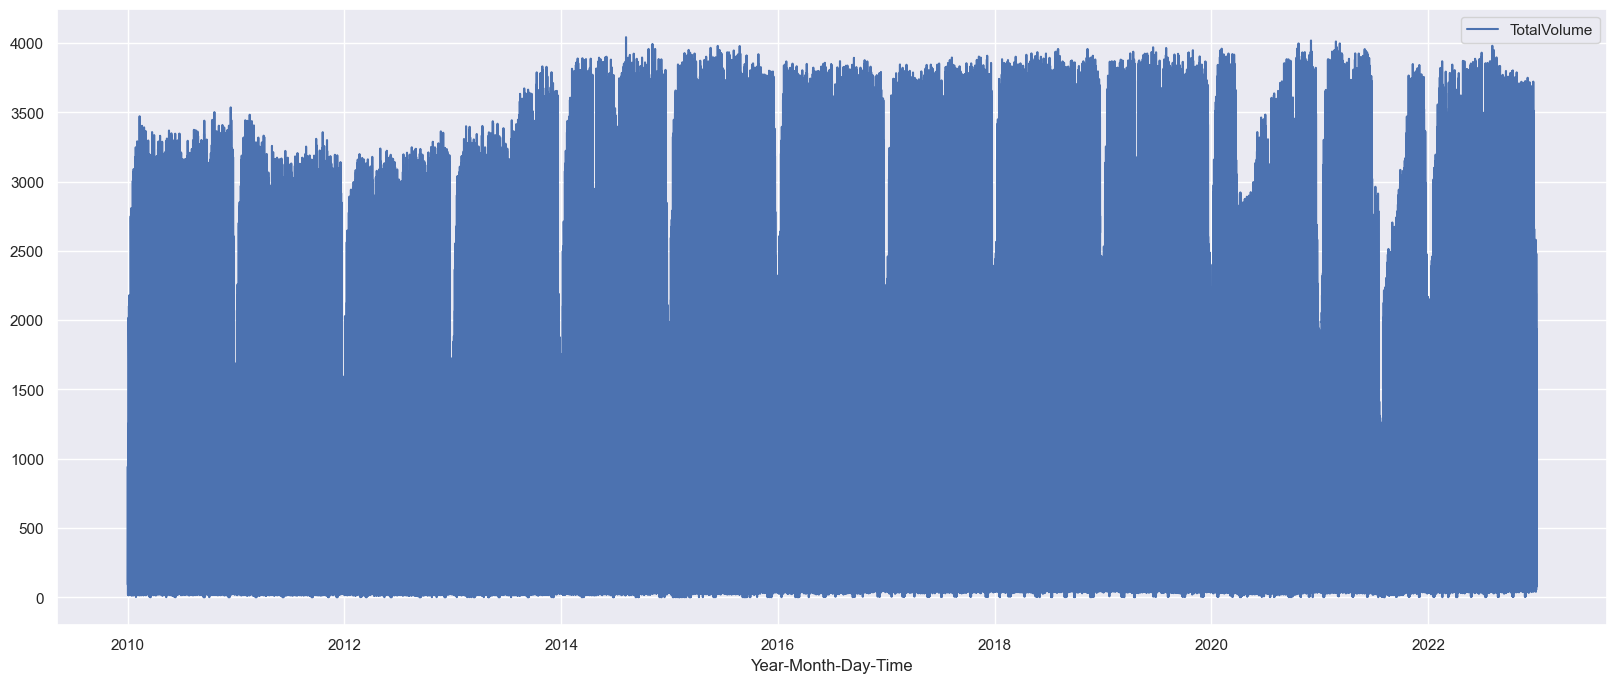

In [71]:
%%time
#Plot hourly traffic volume line graph for the given dataset
sns.lineplot(data=df_arima_4)
sns.set(rc={'figure.figsize':(20,8)})

Wall time: 580 ms


<AxesSubplot:xlabel='Year-Month-Day-Time'>

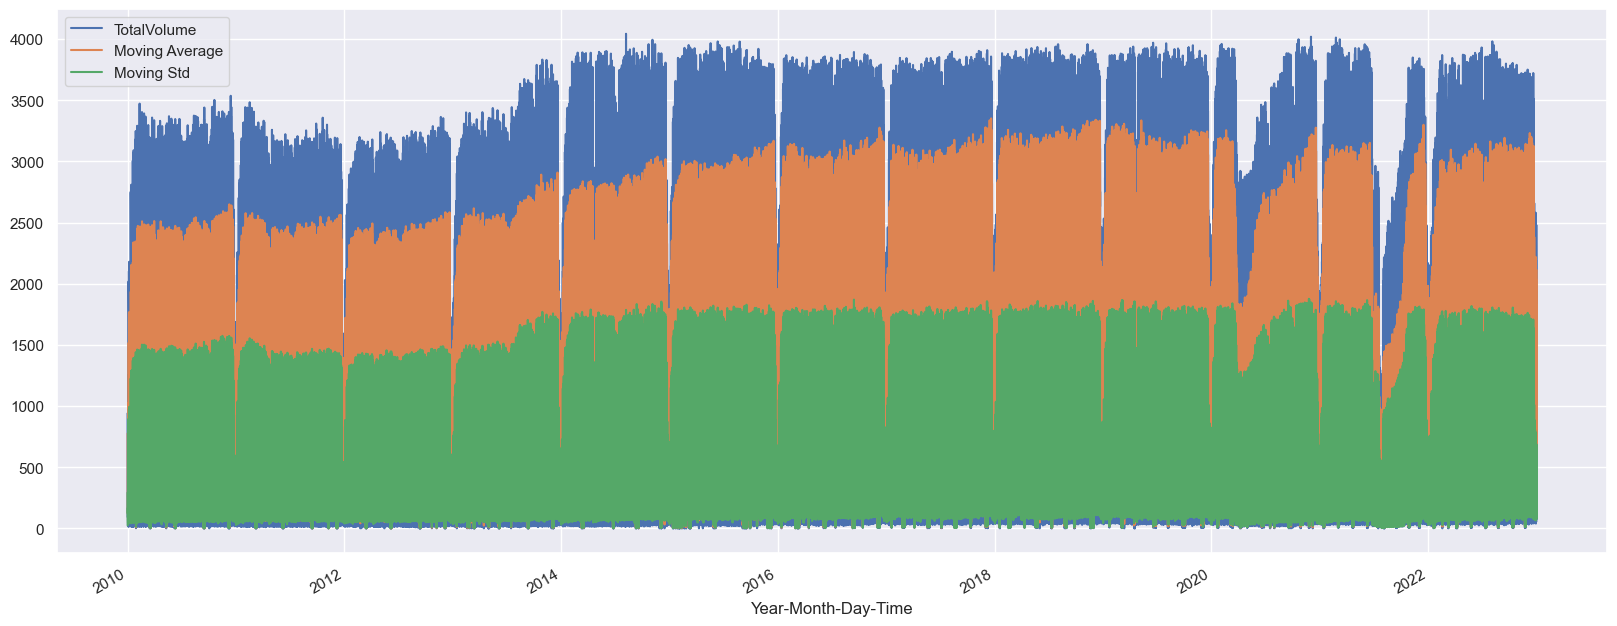

In [72]:
%%time
# Input Data Visualization, Moving average and Moving Standard Deviation
df_arima_4['Moving Average'] = df_arima_4['TotalVolume'].rolling(window=6).mean()
df_arima_4['Moving Std'] = df_arima_4['TotalVolume'].rolling(window=6).std()
df_arima_4.plot.line(y=['TotalVolume','Moving Average','Moving Std'])

<font color='green'><center><h2><u>Stationarity Test: Augmented Dickey-Fuller Test</u></h2></center></font>

In [73]:
%%time
#Ho: It is not stationary
#H1: It is stationary
#This test is for hypothesis testing

def adfuller_test(volume):
    result = adfuller(volume)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    print("Critical values:")
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] <= 0.05:
        print("p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("p-value: Weak evidence against the null hypothesis, time series has a unit root, indicating it is not stationary")
    
    if result[0] < result[4]["5%"]:
        print("t-value: Reject Ho - Time Series is Stationary")
    else:
        print("t-value: Failed to Reject Ho - Time Series is Non-Stationary")

Wall time: 0 ns


In [74]:
%%time
adfuller_test(df_arima_4['TotalVolume'])

ADF Test Statistic : -19.936727580571247
p-value : 0.0
#Lags Used : 70
Number of Observations Used : 113863
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 24.6 s


<font color='green'><center><h2><u>Stationarity Test: Kwiatkowski–Phillips–Schmidt–Shin Test</u></h2></center></font>

In [75]:
%%time
stats, p, lags, critical_values = kpss(df_arima_4['TotalVolume'], 'ct')

Wall time: 54.4 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [76]:
%%time
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 1.1501168791379992
p-value : 0.01
#Lags Used : 902
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is not stationary
Wall time: 0 ns


<font color='green'><center><h2><u>Differencing to make data as stationary for future prediction</u></h2></center></font>

In [77]:
%%time
df_arima_4['Volume First Difference'] = df_arima_4['TotalVolume'] - df_arima_4['TotalVolume'].shift(1)

Wall time: 2.67 ms


In [78]:
%%time
df_arima_4.head(25)

Wall time: 997 µs


TotalVolume  Moving Average  Moving Std  \
Year-Month-Day-Time                                            
2010-01-01 00:00:00           92             NaN         NaN   
2010-01-01 01:00:00          159             NaN         NaN   
2010-01-01 02:00:00          135             NaN         NaN   
2010-01-01 03:00:00          104             NaN         NaN   
2010-01-01 04:00:00          107             NaN         NaN   
2010-01-01 05:00:00          122      119.833333   24.326255   
2010-01-01 06:00:00          163      131.666667   25.327192   
2010-01-01 07:00:00          227      143.000000   46.428440   
2010-01-01 08:00:00          292      169.166667   75.903667   
2010-01-01 09:00:00          415      221.000000  117.366094   
2010-01-01 10:00:00          522      290.166667  153.476274   
2010-01-01 11:00:00          852      411.833333  251.529256   
2010-01-01 12:00:00          943      541.833333  295.010113   
2010-01-01 13:00:00          826      641.666667  267.202295   
2010-01-01 14:00:00          759      719.500000  205.979368   
2010-01-01 15:00:00          651      758.833333  151.543283   
2010-01-01 16:00:00          642      778.833333  118.310467   
2010-01-01 17:00:00          649      745.000000  122.165462   
2010-01-01 18:00:00          590      686.166667   87.948659   
2010-01-01 19:00:00          463      625.666667   96.915771   
2010-01-01 20:00:00          355      558.333333  122.673007   
2010-01-01 21:00:00          319      503.000000  145.303820   
2010-01-01 22:00:00          210      431.000000  167.922601   
2010-01-01 23:00:00          163      350.000000  158.697196   
2010-01-02 00:00:00           93      267.166667  136.531925   

                     Volume First Difference  
Year-Month-Day-Time                           
2010-01-01 00:00:00                      NaN  
2010-01-01 01:00:00                     67.0  
2010-01-01 02:00:00                    -24.0  
2010-01-01 03:00:00                    -31.0  
2010-01-01 04:00:00                      3.0  
2010-01-01 05:00:00                     15.0  
2010-01-01 06:00:00                     41.0  
2010-01-01 07:00:00                     64.0  
2010-01-01 08:00:00                     65.0  
2010-01-01 09:00:00                    123.0  
2010-01-01 10:00:00                    107.0  
2010-01-01 11:00:00                    330.0  
2010-01-01 12:00:00                     91.0  
2010-01-01 13:00:00                   -117.0  
2010-01-01 14:00:00                    -67.0  
2010-01-01 15:00:00                   -108.0  
2010-01-01 16:00:00                     -9.0  
2010-01-01 17:00:00                      7.0  
2010-01-01 18:00:00                    -59.0  
2010-01-01 19:00:00                   -127.0  
2010-01-01 20:00:00                   -108.0  
2010-01-01 21:00:00                    -36.0  
2010-01-01 22:00:00                   -109.0  
2010-01-01 23:00:00                    -47.0  
2010-01-02 00:00:00                    -70.0

In [79]:
%%time
#Again do adf test
adfuller_test( df_arima_4['Volume First Difference'].dropna() )

ADF Test Statistic : -69.94244326396105
p-value : 0.0
#Lags Used : 70
Number of Observations Used : 113862
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 23.8 s


In [80]:
%%time
#Again do kpss test
stats, p, lags, critical_values = kpss(df_arima_4['Volume First Difference'].dropna(), 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.0022730358414579568
p-value : 0.1
#Lags Used : 632
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is stationary
Wall time: 35.5 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Visualize first order shifted dataset</u></h2></center></font>

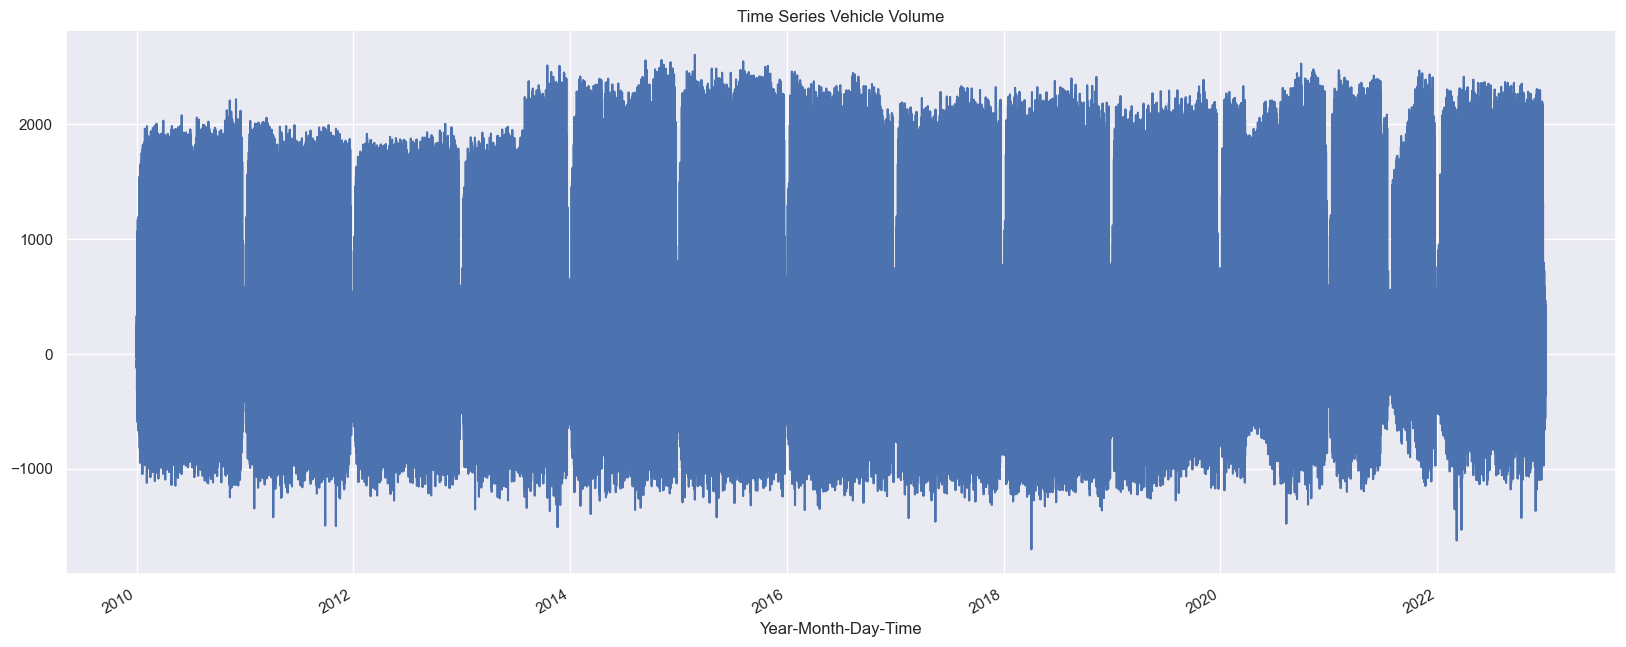

Wall time: 2.54 s


In [81]:
%%time
df_arima_4['Volume First Difference'].plot(figsize=(20,8), title="Time Series Vehicle Volume")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

Wall time: 517 ms


<AxesSubplot:xlabel='Year-Month-Day-Time'>

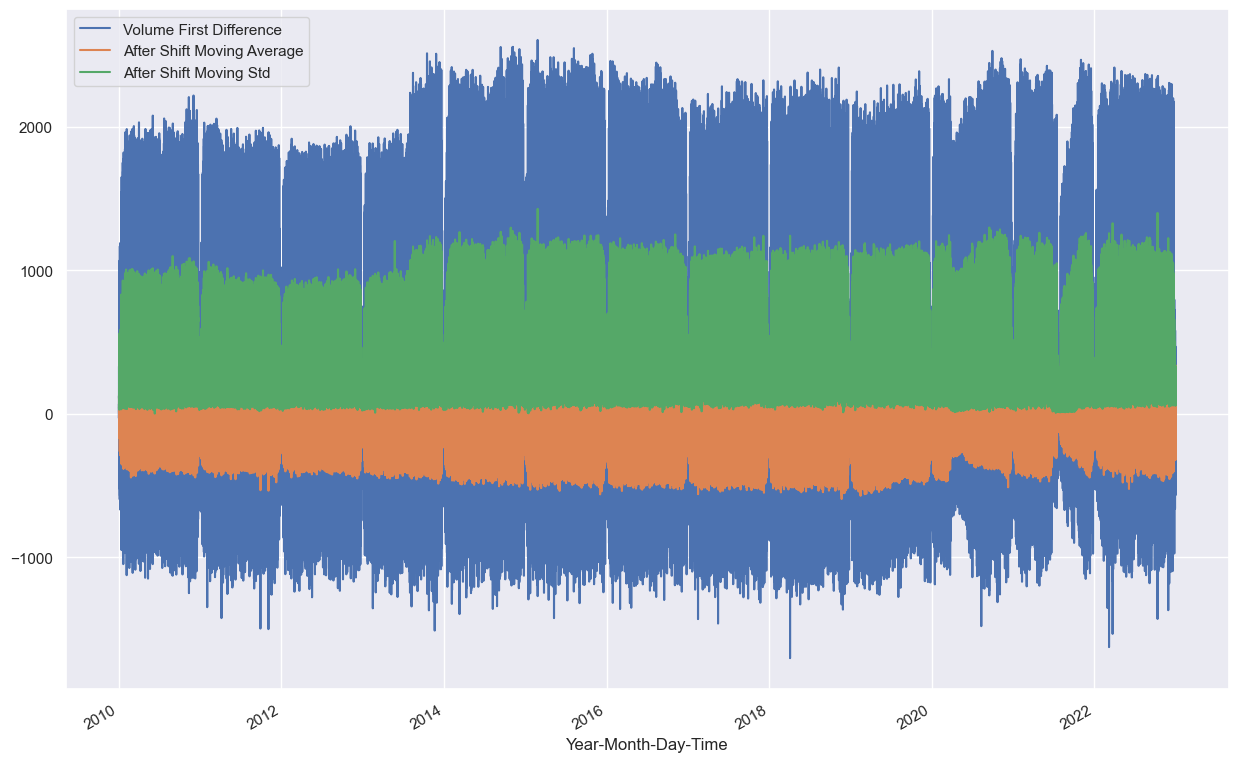

In [82]:
%%time
#Moving average and Moving standard deviation
df_arima_4['After Shift Moving Average'] = df_arima_4['Volume First Difference'].rolling(window=6).mean()
df_arima_4['After Shift Moving Std'] = df_arima_4['Volume First Difference'].rolling(window=6).std()
df_arima_4.plot.line(y=['Volume First Difference','After Shift Moving Average','After Shift Moving Std'])

<font color='green'><center><h2><u>Seasonality Check</u></h2></center></font>

Additive Decomposition:


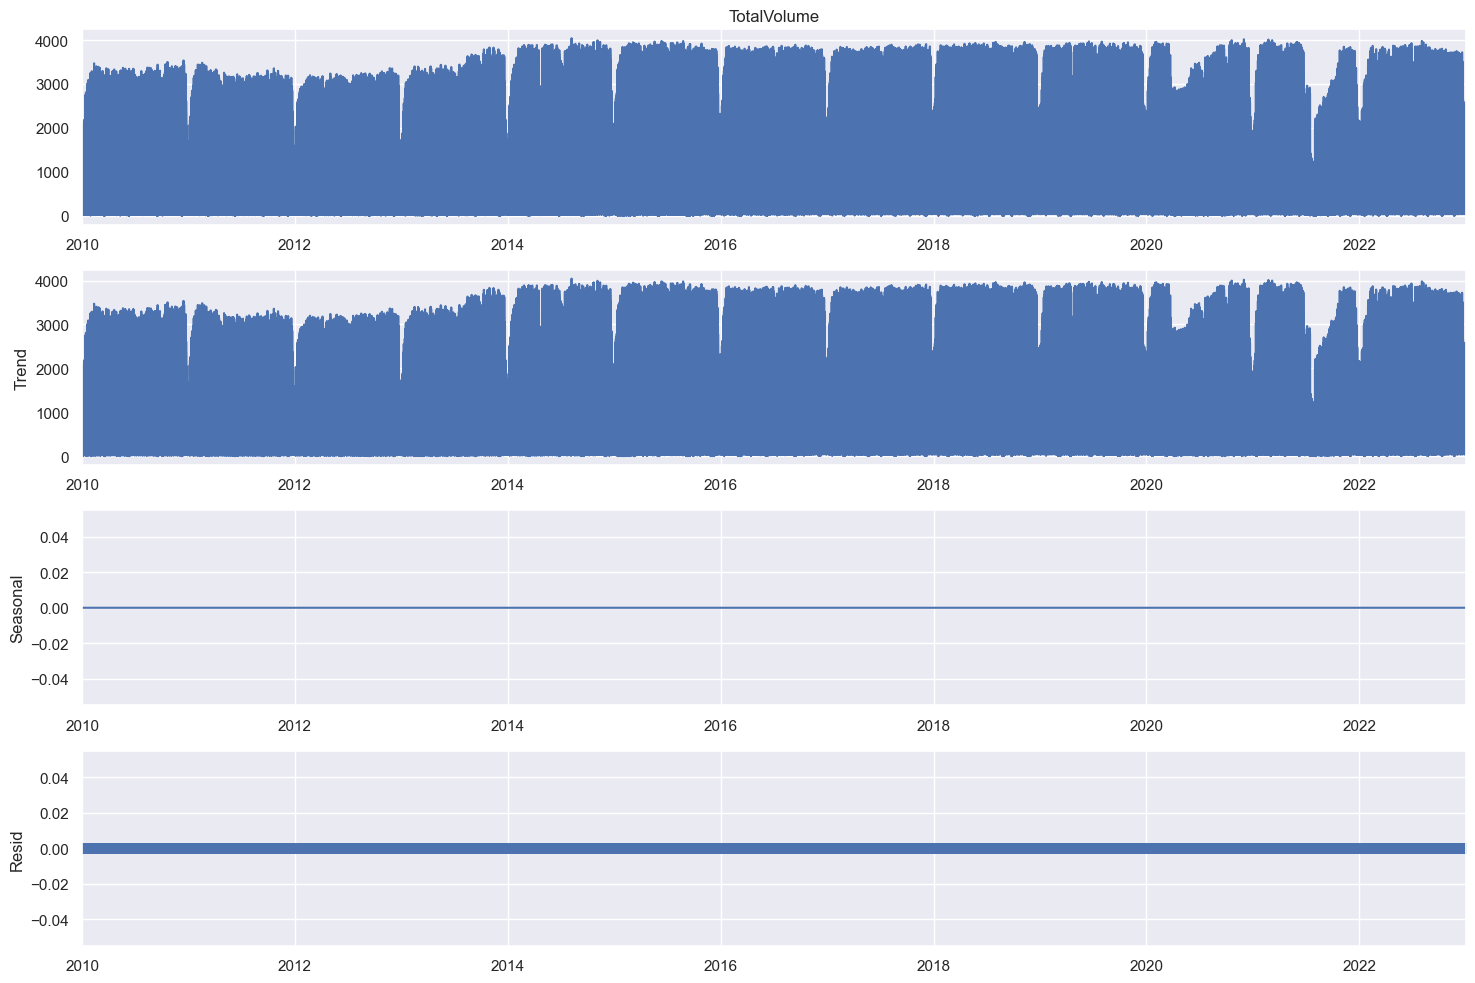

Wall time: 3.71 s


In [83]:
%%time
# Naive decomposition Additive
# observed = Trend + Sesonal + Residual
print("Additive Decomposition:")
result_additive = seasonal_decompose(x=df_arima_4['TotalVolume'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (15,10)})
result_additive.plot().suptitle('', fontsize=20)
plt.show()

In [84]:
%%time
df_arima_4['Seasonal First Difference'] = df_arima_4['TotalVolume'] - df_arima_4['TotalVolume'].shift(24)

Wall time: 2.1 ms


In [85]:
%%time
df_arima_4.head(25)

Wall time: 0 ns


TotalVolume  Moving Average  Moving Std  \
Year-Month-Day-Time                                            
2010-01-01 00:00:00           92             NaN         NaN   
2010-01-01 01:00:00          159             NaN         NaN   
2010-01-01 02:00:00          135             NaN         NaN   
2010-01-01 03:00:00          104             NaN         NaN   
2010-01-01 04:00:00          107             NaN         NaN   
2010-01-01 05:00:00          122      119.833333   24.326255   
2010-01-01 06:00:00          163      131.666667   25.327192   
2010-01-01 07:00:00          227      143.000000   46.428440   
2010-01-01 08:00:00          292      169.166667   75.903667   
2010-01-01 09:00:00          415      221.000000  117.366094   
2010-01-01 10:00:00          522      290.166667  153.476274   
2010-01-01 11:00:00          852      411.833333  251.529256   
2010-01-01 12:00:00          943      541.833333  295.010113   
2010-01-01 13:00:00          826      641.666667  267.202295   
2010-01-01 14:00:00          759      719.500000  205.979368   
2010-01-01 15:00:00          651      758.833333  151.543283   
2010-01-01 16:00:00          642      778.833333  118.310467   
2010-01-01 17:00:00          649      745.000000  122.165462   
2010-01-01 18:00:00          590      686.166667   87.948659   
2010-01-01 19:00:00          463      625.666667   96.915771   
2010-01-01 20:00:00          355      558.333333  122.673007   
2010-01-01 21:00:00          319      503.000000  145.303820   
2010-01-01 22:00:00          210      431.000000  167.922601   
2010-01-01 23:00:00          163      350.000000  158.697196   
2010-01-02 00:00:00           93      267.166667  136.531925   

                     Volume First Difference  After Shift Moving Average  \
Year-Month-Day-Time                                                        
2010-01-01 00:00:00                      NaN                         NaN   
2010-01-01 01:00:00                     67.0                         NaN   
2010-01-01 02:00:00                    -24.0                         NaN   
2010-01-01 03:00:00                    -31.0                         NaN   
2010-01-01 04:00:00                      3.0                         NaN   
2010-01-01 05:00:00                     15.0                         NaN   
2010-01-01 06:00:00                     41.0                   11.833333   
2010-01-01 07:00:00                     64.0                   11.333333   
2010-01-01 08:00:00                     65.0                   26.166667   
2010-01-01 09:00:00                    123.0                   51.833333   
2010-01-01 10:00:00                    107.0                   69.166667   
2010-01-01 11:00:00                    330.0                  121.666667   
2010-01-01 12:00:00                     91.0                  130.000000   
2010-01-01 13:00:00                   -117.0                   99.833333   
2010-01-01 14:00:00                    -67.0                   77.833333   
2010-01-01 15:00:00                   -108.0                   39.333333   
2010-01-01 16:00:00                     -9.0                   20.000000   
2010-01-01 17:00:00                      7.0                  -33.833333   
2010-01-01 18:00:00                    -59.0                  -58.833333   
2010-01-01 19:00:00                   -127.0                  -60.500000   
2010-01-01 20:00:00                   -108.0                  -67.333333   
2010-01-01 21:00:00                    -36.0                  -55.333333   
2010-01-01 22:00:00                   -109.0                  -72.000000   
2010-01-01 23:00:00                    -47.0                  -81.000000   
2010-01-02 00:00:00                    -70.0                  -82.833333   

                     After Shift Moving Std  Seasonal First Difference  
Year-Month-Day-Time                                                     
2010-01-01 00:00:00                     NaN                        NaN  
2010-01-01 01:00:00 

In [86]:
%%time
#Again do adf test
adfuller_test( df_arima_4['Seasonal First Difference'].dropna() )

ADF Test Statistic : -56.7791587064992
p-value : 0.0
#Lags Used : 70
Number of Observations Used : 113839
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 22.7 s


In [87]:
%%time
#Again do kpss test
stats, p, lags, critical_values = kpss(df_arima_4['Seasonal First Difference'].dropna(), 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.000951729220335147
p-value : 0.1
#Lags Used : 110
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is stationary
Wall time: 23.6 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Visualize seasonal order shifted dataset</u></h2></center></font>

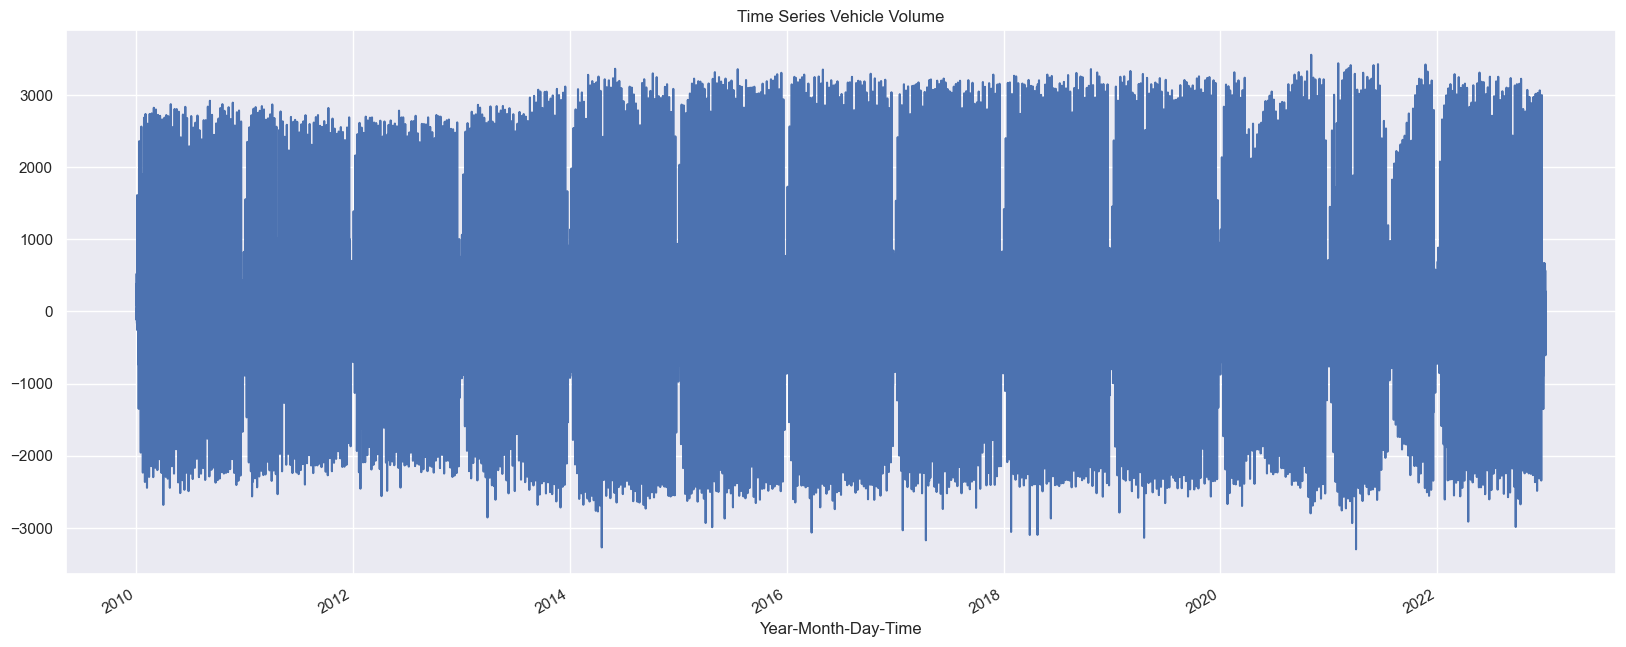

Wall time: 1.64 s


In [88]:
%%time
df_arima_4['Seasonal First Difference'].plot(figsize=(20,8), title="Time Series Vehicle Volume")
plt.show()

<font color='green'><center><h2><u>Plot Autocorrelation & Partial Autocorrelation</u></h2></center></font>

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Wall time: 2.75 s


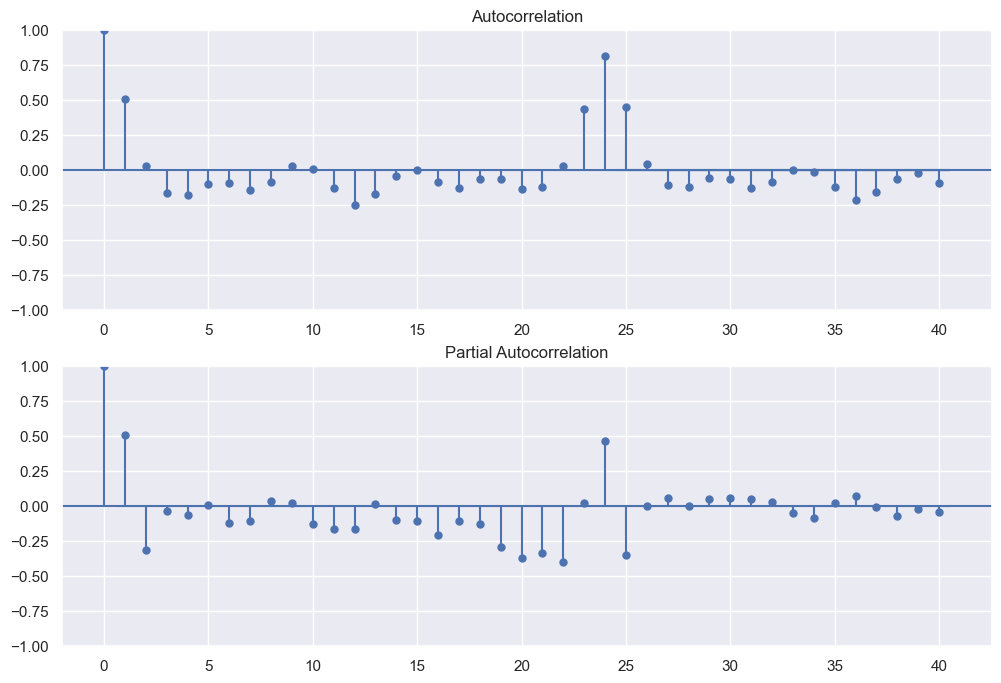

In [89]:
%%time
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima_4['Volume First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima_4['Volume First Difference'].iloc[2:],lags=40,ax=ax2)

In [90]:
%%time
model = sm.tsa.arima.ARIMA(df_arima_4['TotalVolume'], order=(9,1,9))
results = model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

Wall time: 13min 59s


<font color='green'><center><h2><u>Forecast / Predict using ARIMA model</u></h2></center></font>

Wall time: 343 ms


<AxesSubplot:xlabel='Year-Month-Day-Time'>

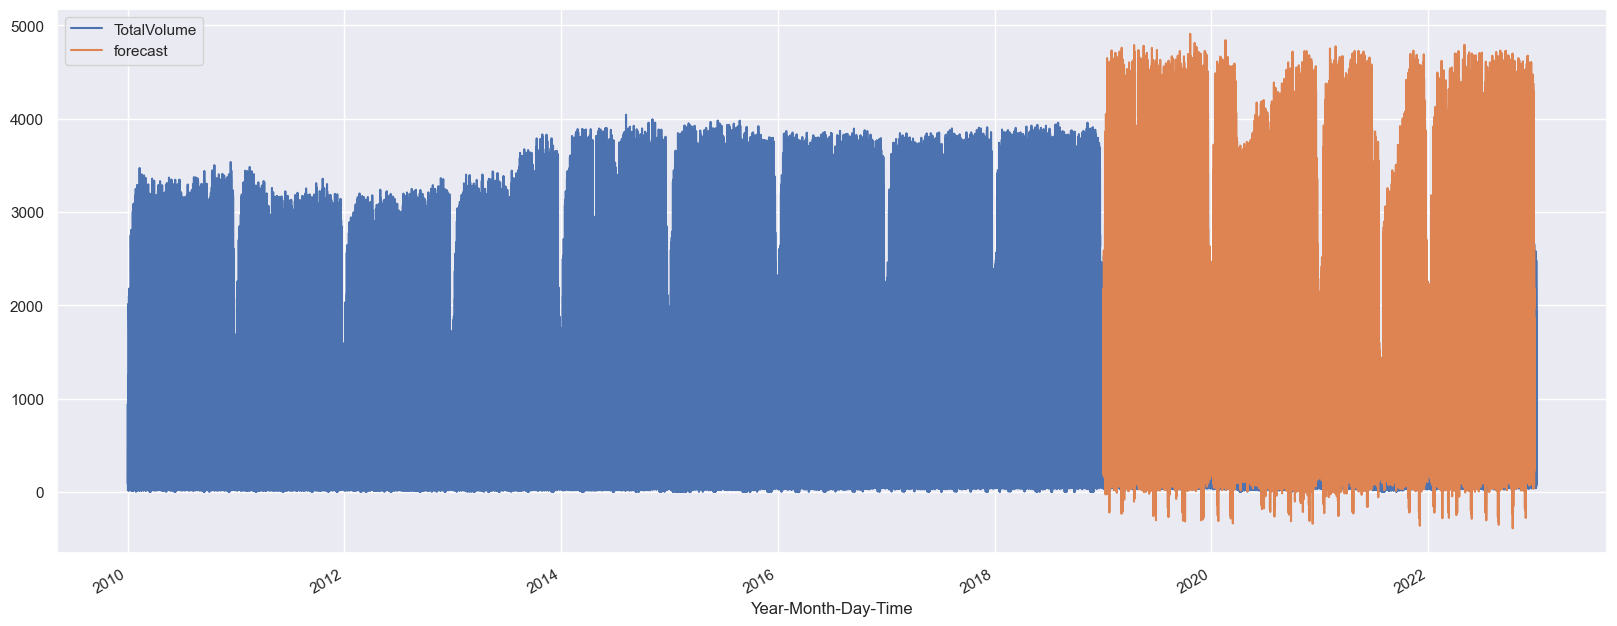

In [109]:
%%time
df_arima_4['forecast'] = results.predict(start=78888, end = 113752, dynamic= False)
df_arima_4[['TotalVolume','forecast']].plot(figsize=(20,8))

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [110]:
%%time
ErrorValue = np.abs( df_arima_4['TotalVolume'] - df_arima_4['forecast'] )
print('Mean Abosolute Error Score of the predicted Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the predicted Dataset: 263.84
Wall time: 1.99 ms


<font color='blue'><center><h2>Model 2: LSTM</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [71]:
%%time
#Import Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

Wall time: 3.64 s


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [72]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as LCE
df_lstm = df_inp_data.copy()
df_lstm['Date'] = pd.to_datetime(df_lstm['Date'])
df_lstm['Year-Month-Day-Time'] = df_lstm['Date'].dt.strftime('%Y-%m-%d') + " " + df_lstm['IntervalStart'].str.slice(0, 2) + ":00"
df_lstm_1 = df_lstm[df_lstm['TollPointID'] == "LCE"]

Wall time: 46.1 s


In [73]:
%%time
#Creating a dataframe with hour and its total volume
df_lstm_2 = df_lstm_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_lstm_3 = df_lstm_2.to_frame()
df_lstm_3.to_csv('lstm.csv')
df_lstm_4 = pd.read_csv("C:/Users/USER/Documents/Toll/lstm.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_lstm_4['Year-Month-Day-Time'] = pd.to_datetime(df_lstm_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_lstm_4 = df_lstm_4.set_index("Year-Month-Day-Time")

Wall time: 604 ms


In [74]:
%%time
#Display the dataframe with hour and its total volume
df_lstm_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00           92
2010-01-01 01:00:00          159
2010-01-01 02:00:00          135
2010-01-01 03:00:00          104
2010-01-01 04:00:00          107
...                          ...
2022-12-31 19:00:00         1151
2022-12-31 20:00:00          859
2022-12-31 21:00:00          692
2022-12-31 22:00:00          625
2022-12-31 23:00:00          465

[113934 rows x 1 columns]

In [75]:
%%time
#Convert total volume to float
df_lstm_5 = df_lstm_4.values
df_lstm_5 = df_lstm_5.astype('float32')

Wall time: 0 ns


In [76]:
%%time
#Display Total Volume as float
df_lstm_5

Wall time: 0 ns


array([[ 92.],
       [159.],
       [135.],
       ...,
       [692.],
       [625.],
       [465.]], dtype=float32)

<font color='green'><center><h2><u>Data Normalization</u></h2></center></font>

In [77]:
%%time
#Normalize the dataset
scaler = MinMaxScaler()
df_lstm_6 = scaler.fit_transform(df_lstm_5)

Wall time: 997 µs


<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [78]:
%%time
#Split dataset into train and test
training_size = int(len(df_lstm_6)*0.70)
print ("Training size:",training_size)

testing_size = len(df_lstm_6) - training_size
print ("Testing size:",testing_size)

train, test = df_lstm_6[:training_size], df_lstm_6[training_size:]

Training size: 79753
Testing size: 34181
Wall time: 998 µs


In [79]:
%%time
#Create dataset matrix
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

Wall time: 0 ns


In [80]:
%%time
#Look back 730 values
look_back = 730
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#Reshape training & testing dataset
trainX = np.reshape(trainX, (trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1]))

Wall time: 228 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [81]:
%%time
#Create LSTM Model
model = Sequential()
model.add(LSTM(256,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               1010688   
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,010,945
Trainable params: 1,010,945
Non-trainable params: 0
_________________________________________________________________
Wall time: 408 ms


In [82]:
%%time
#fit the model
model.fit(trainX, trainY, batch_size=50, verbose=2, epochs=10)

Epoch 1/10
1581/1581 - 21s - loss: 0.0047 - mse: 0.0047 - 21s/epoch - 13ms/step
Epoch 2/10
1581/1581 - 18s - loss: 0.0018 - mse: 0.0018 - 18s/epoch - 12ms/step
Epoch 3/10
1581/1581 - 20s - loss: 0.0014 - mse: 0.0014 - 20s/epoch - 13ms/step
Epoch 4/10
1581/1581 - 20s - loss: 0.0013 - mse: 0.0013 - 20s/epoch - 12ms/step
Epoch 5/10
1581/1581 - 18s - loss: 0.0011 - mse: 0.0011 - 18s/epoch - 12ms/step
Epoch 6/10
1581/1581 - 20s - loss: 0.0011 - mse: 0.0011 - 20s/epoch - 13ms/step
Epoch 7/10
1581/1581 - 18s - loss: 0.0010 - mse: 0.0010 - 18s/epoch - 12ms/step
Epoch 8/10
1581/1581 - 18s - loss: 9.3459e-04 - mse: 9.3459e-04 - 18s/epoch - 12ms/step
Epoch 9/10
1581/1581 - 19s - loss: 9.3381e-04 - mse: 9.3381e-04 - 19s/epoch - 12ms/step
Epoch 10/10
1581/1581 - 20s - loss: 8.9923e-04 - mse: 8.9923e-04 - 20s/epoch - 13ms/step
Wall time: 3min 13s


<font color='green'><center><h2><u>Predict train & test dataset</u></h2></center></font>

In [83]:
%%time
#Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1046/1046 [==============================] - 4s 3ms/step
Wall time: 14.7 s


In [84]:
%%time
#Inverse Transform Function
trainPredict2 = scaler.inverse_transform(trainPredict)
testPredict2 = scaler.inverse_transform(testPredict)

trainY2 = scaler.inverse_transform([trainY])
testY2 = scaler.inverse_transform([testY])

Wall time: 2.99 ms


<font color='green'><center><h2><u>Visualize Original Vs Predicted Dataset</u></h2></center></font>

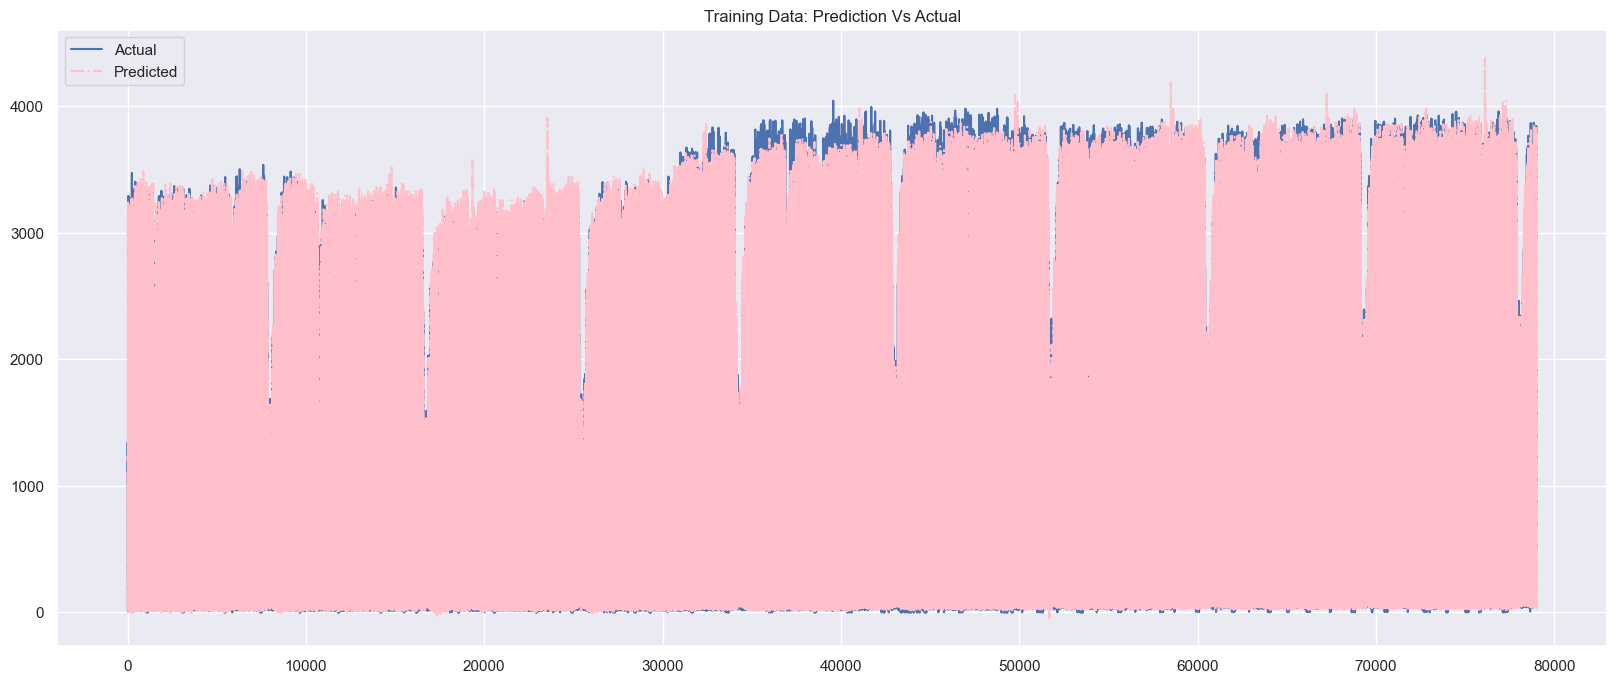

Wall time: 1.77 s


In [85]:
%%time
plt.figure(figsize=(20,8))
plt.plot(trainY2[0].tolist())
plt.plot(trainPredict2.tolist(), color='pink', linestyle='dashdot')
plt.title("Training Data: Prediction Vs Actual")
plt.legend(["Actual", "Predicted"])
plt.show()

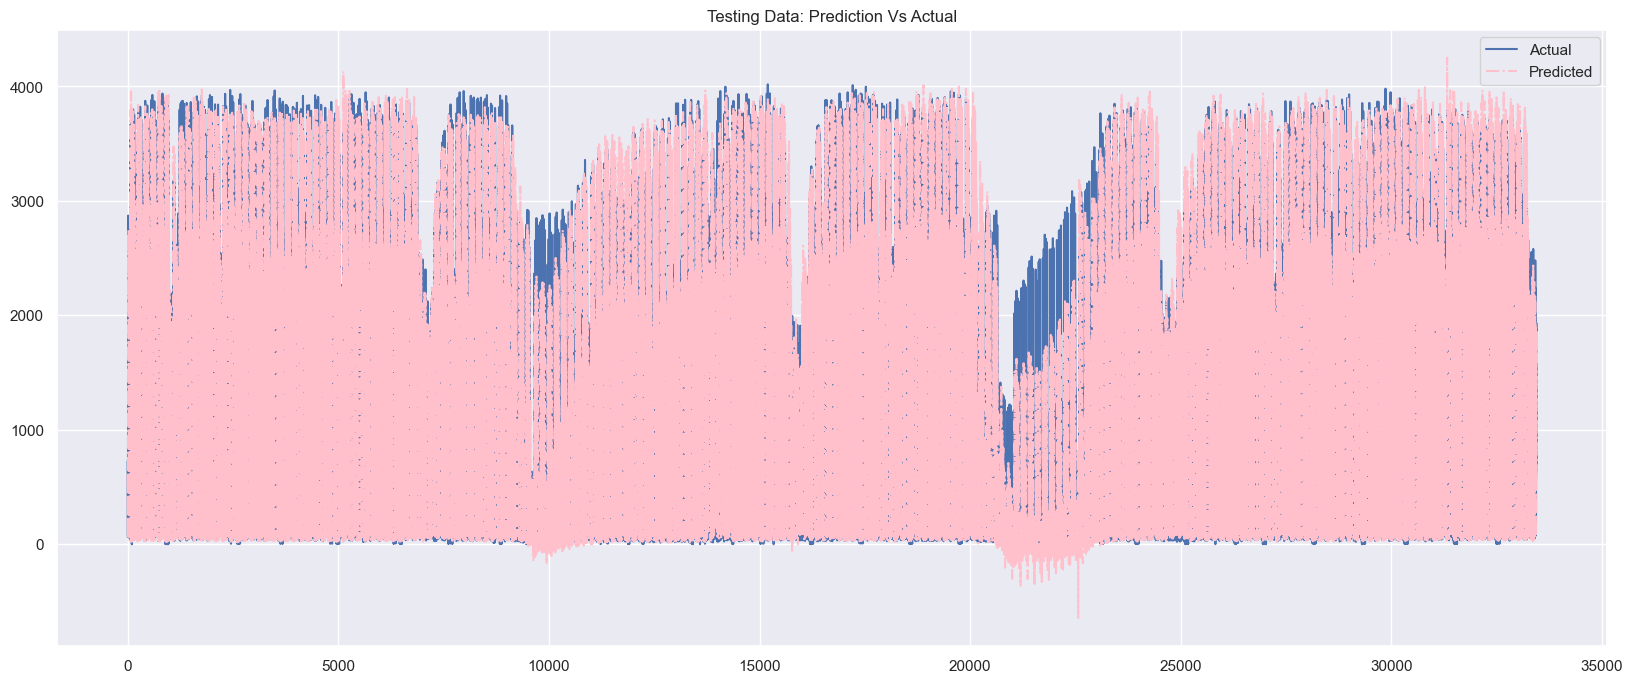

Wall time: 744 ms


In [86]:
%%time
plt.figure(figsize=(20,8))
plt.plot(testY2[0].tolist())
plt.plot(testPredict2.tolist(), color='pink', linestyle='dashdot')
plt.title("Testing Data: Prediction Vs Actual")
plt.legend(["Actual", "Predicted"])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [87]:
%%time
# Calculate Mean Absolute Error
ErrorValue = np.abs( trainY2[0] - trainPredict2[:,0] )
print('Mean Abosolute Error Score of the Training Dataset:', round(ErrorValue.mean(),2) )

ErrorValue = np.abs( testY2[0] - testPredict2[:,0] )
print('Mean Abosolute Error Score of the Testing Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the Training Dataset: 70.9
Mean Abosolute Error Score of the Testing Dataset: 121.1
Wall time: 998 µs


<font color='blue'><center><h2>Model 3: DecisionTreeRegressor</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [88]:
%%time
#Import Libraries
from sklearn.tree import DecisionTreeRegressor

Wall time: 195 ms


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [89]:
%%time
#Input traffic data set
#Filter and store the dataset having TollPointID as LCE
df_dtregressor = df_inp_data.copy()
df_dtregressor['Date'] = pd.to_datetime(df_dtregressor['Date'])
df_dtregressor['Year-Month-Day-Time'] = df_dtregressor['Date'].dt.strftime('%Y-%m-%d') + " " + df_dtregressor['IntervalStart'].str.slice(0, 2) + ":00"
df_dtregressor_1 = df_dtregressor[df_dtregressor['TollPointID'] == "LCE"]

Wall time: 29.7 s


In [90]:
%%time
#Creating a dataframe with hour and its total volume
df_dtregressor_2 = df_dtregressor_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_dtregressor_3 = df_dtregressor_2.to_frame()
df_dtregressor_3.to_csv('dt.csv')
df_dtregressor_4 = pd.read_csv("C:/Users/USER/Documents/Toll/dt.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_dtregressor_4['Year-Month-Day-Time'] = pd.to_datetime(df_dtregressor_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_dtregressor_4 = df_dtregressor_4.set_index("Year-Month-Day-Time")

Wall time: 552 ms


In [91]:
%%time
#Display the dataframe with hour and its total volume
df_dtregressor_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00           92
2010-01-01 01:00:00          159
2010-01-01 02:00:00          135
2010-01-01 03:00:00          104
2010-01-01 04:00:00          107
...                          ...
2022-12-31 19:00:00         1151
2022-12-31 20:00:00          859
2022-12-31 21:00:00          692
2022-12-31 22:00:00          625
2022-12-31 23:00:00          465

[113934 rows x 1 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

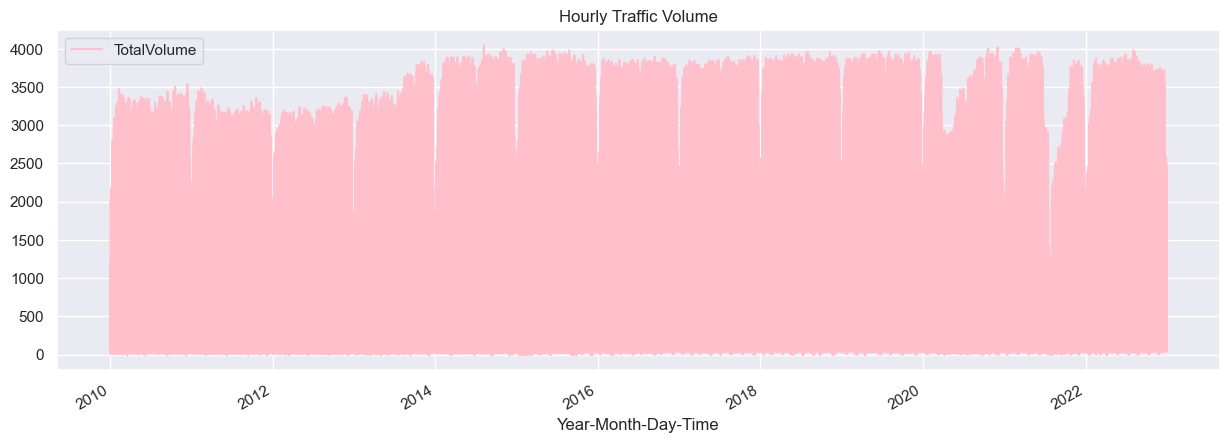

Wall time: 1.67 s


In [92]:
%%time
#Plot hourly traffic volume line graph for the given dataset
df_dtregressor_4.plot(style='-', figsize=(15,5), color='pink', title='Hourly Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [93]:
%%time
#Split train and test dataset for as a time series
training_df = df_dtregressor_4.loc[df_dtregressor_4.index < '01-01-2019']
testing_df = df_dtregressor_4.loc[ (df_dtregressor_4.index >= '01-01-2019') ]

Wall time: 12 ms


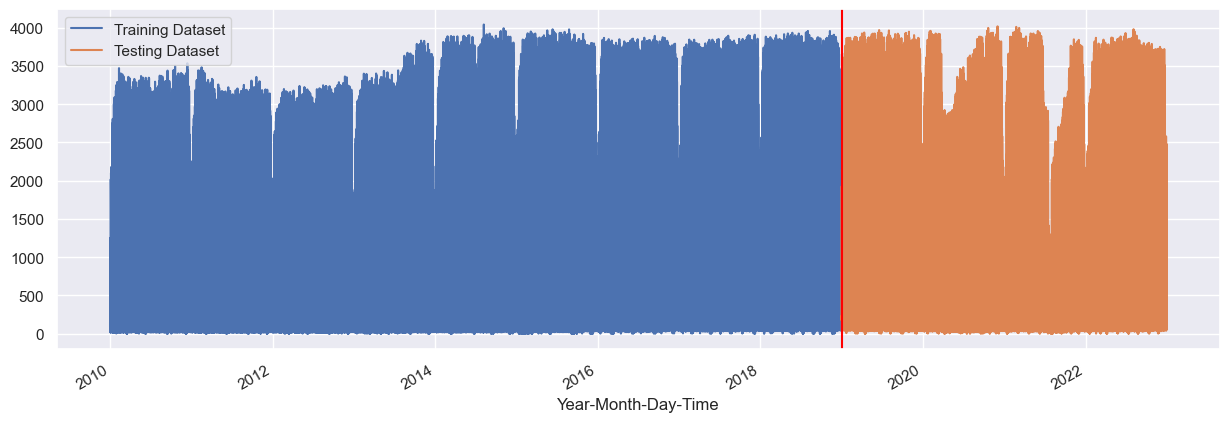

Wall time: 1.48 s


In [94]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2019', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [95]:
%%time
#Below is the feature creation created as a function
def dt_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [96]:
%%time
#Diplay features
df = dt_feature_creation(df_dtregressor_4)
df

Wall time: 70.8 ms


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2010-01-01 00:00:00           92     0                4        1      1  2010   
2010-01-01 01:00:00          159     1                4        1      1  2010   
2010-01-01 02:00:00          135     2                4        1      1  2010   
2010-01-01 03:00:00          104     3                4        1      1  2010   
2010-01-01 04:00:00          107     4                4        1      1  2010   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1151    19                5        4     12  2022   
2022-12-31 20:00:00          859    20                5        4     12  2022   
2022-12-31 21:00:00          692    21                5        4     12  2022   
2022-12-31 22:00:00          625    22                5        4     12  2022   
2022-12-31 23:00:00          465    23                5        4     12  2022   

                     Day of the year  
Year-Month-Day-Time                   
2010-01-01 00:00:00                1  
2010-01-01 01:00:00                1  
2010-01-01 02:00:00                1  
2010-01-01 03:00:00                1  
2010-01-01 04:00:00                1  
...                              ...  
2022-12-31 19:00:00              365  
2022-12-31 20:00:00              365  
2022-12-31 21:00:00              365  
2022-12-31 22:00:00              365  
2022-12-31 23:00:00              365  

[113934 rows x 7 columns]

In [97]:
%%time
#Adding features to train and test dataset
training_df = dt_feature_creation(training_df)
testing_df = dt_feature_creation(testing_df)
COLUMN_FEATURES = ['Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
COLUMN_TARGET = ['TotalVolume']

Wall time: 75.8 ms


In [98]:
%%time
X_train = training_df[COLUMN_FEATURES]
y_train = training_df[COLUMN_TARGET]

X_test = testing_df[COLUMN_FEATURES]
y_test = testing_df[COLUMN_TARGET]

Wall time: 11 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [99]:
%%time
#Create the model
#dtRegressor = DecisionTreeRegressor(max_depth=48, min_samples_leaf=0.1)
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train
       )

Wall time: 309 ms


DecisionTreeRegressor()

<font color='green'><center><h2><u>Predict test dataset</u></h2></center></font>

In [100]:
%%time
testing_df['PredictedVolume'] = dtRegressor.predict(X_test)

Wall time: 13 ms


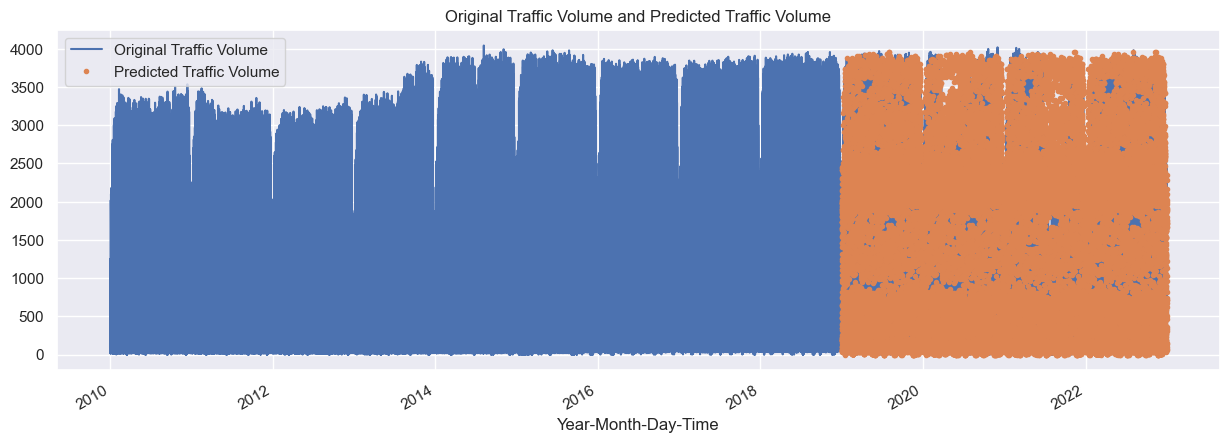

Wall time: 2.09 s


In [101]:
%%time
df = df.merge(testing_df['PredictedVolume'], how='left', left_index = True, right_index = True)
ax = df['TotalVolume'].plot(figsize=(15,5))
df['PredictedVolume'].plot(ax=ax, style='.')
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
ax.set_title('Original Traffic Volume and Predicted Traffic Volume')
plt.show()

In [102]:
%%time
#Display test data with predicted traffic volume
testing_df

Wall time: 0 ns


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2019-01-01 00:00:00          234     0                1        1      1  2019   
2019-01-01 01:00:00          293     1                1        1      1  2019   
2019-01-01 02:00:00          280     2                1        1      1  2019   
2019-01-01 03:00:00          227     3                1        1      1  2019   
2019-01-01 04:00:00          173     4                1        1      1  2019   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1151    19                5        4     12  2022   
2022-12-31 20:00:00          859    20                5        4     12  2022   
2022-12-31 21:00:00          692    21                5        4     12  2022   
2022-12-31 22:00:00          625    22                5        4     12  2022   
2022-12-31 23:00:00          465    23                5        4     12  2022   

                     Day of the year  PredictedVolume  
Year-Month-Day-Time                                    
2019-01-01 00:00:00                1            182.0  
2019-01-01 01:00:00                1            260.0  
2019-01-01 02:00:00                1            228.0  
2019-01-01 03:00:00                1            174.0  
2019-01-01 04:00:00                1            153.0  
...                              ...              ...  
2022-12-31 19:00:00              365           1129.0  
2022-12-31 20:00:00              365            814.0  
2022-12-31 21:00:00              365            738.0  
2022-12-31 22:00:00              365            506.0  
2022-12-31 23:00:00              365            365.0  

[35056 rows x 8 columns]

<font color='green'><center><h2><u>Plot Predicted Next Hour Traffic Volume of test dataset</u></h2></center></font>

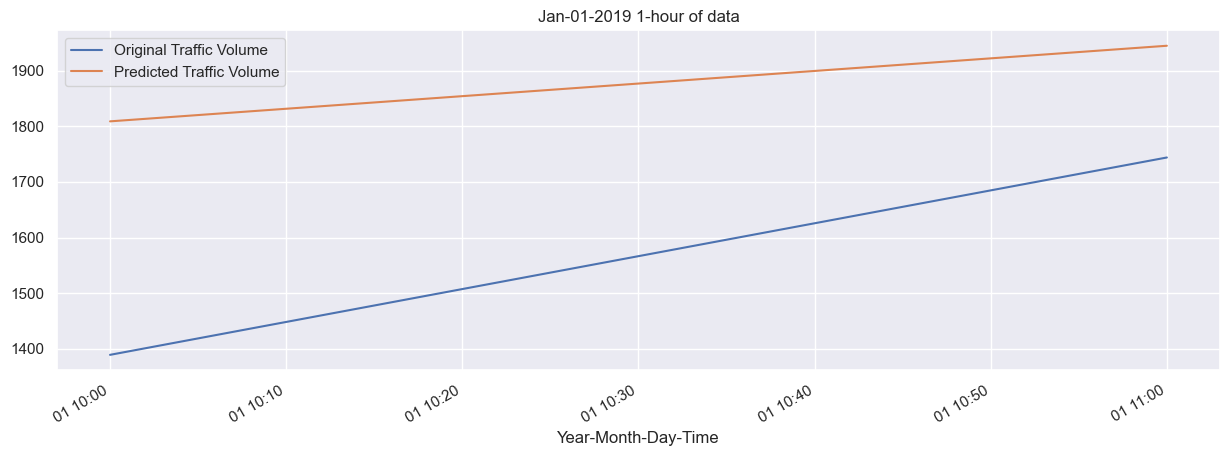

Wall time: 350 ms


In [103]:
%%time
#Hourly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan-01-2019 1-hour of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next one week Traffic Volume of test dataset for understanding</u></h2></center></font>

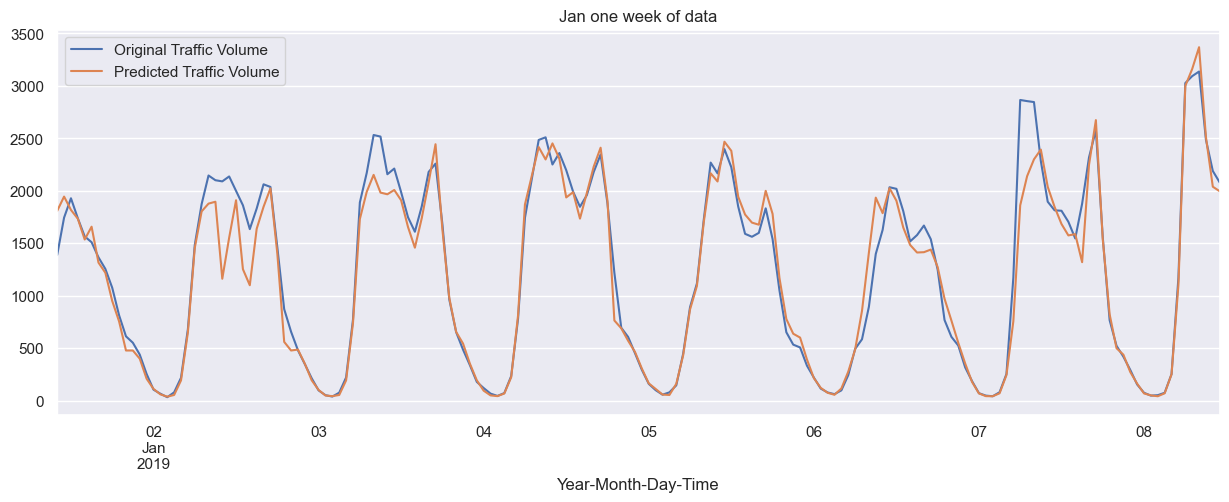

Wall time: 296 ms


In [104]:
%%time
#Weekly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan one week of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [105]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 285.16
Wall time: 9.99 ms


<font color='blue'><center><h2>Model 4: XGBoostRegressor - Part 1</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [174]:
%%time
#Importing Libraries Required
import xgboost as xgb
from sklearn.metrics import mean_squared_error
colour_palette = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import TimeSeriesSplit

Wall time: 0 ns


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [175]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as LCE
df_xgboost = df_inp_data.copy()
df_xgboost['Date'] = pd.to_datetime(df_xgboost['Date'])
df_xgboost['Year-Month-Day-Time'] = df_xgboost['Date'].dt.strftime('%Y-%m-%d') + " " + df_xgboost['IntervalStart'].str.slice(0, 2) + ":00"
df_xgboost_1 = df_xgboost[df_xgboost['TollPointID'] == "LCE"]

Wall time: 27.5 s


In [176]:
%%time
#Creating a dataframe with hour and its total volume
df_xgboost_2 = df_xgboost_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_xgboost_3 = df_xgboost_2.to_frame()
df_xgboost_3.to_csv('boost.csv')
df_xgboost_4 = pd.read_csv("C:/Users/USER/Documents/Toll/boost.csv")

Wall time: 537 ms


In [177]:
%%time
#Display the dataframe with hour and its total volume
df_xgboost_4

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume
0         2010-01-01 00:00           92
1         2010-01-01 01:00          159
2         2010-01-01 02:00          135
3         2010-01-01 03:00          104
4         2010-01-01 04:00          107
...                    ...          ...
113929    2022-12-31 19:00         1151
113930    2022-12-31 20:00          859
113931    2022-12-31 21:00          692
113932    2022-12-31 22:00          625
113933    2022-12-31 23:00          465

[113934 rows x 2 columns]

In [178]:
%%time
#Convert the column: Year-Month-Day-Time into datetime data type
df_xgboost_4['Year-Month-Day-Time'] = pd.to_datetime(df_xgboost_4['Year-Month-Day-Time'])

Wall time: 84.3 ms


In [179]:
%%time
#Display the dataframe with hour and its total volume
df_xgboost_4

Wall time: 0 ns


Year-Month-Day-Time  TotalVolume
0      2010-01-01 00:00:00           92
1      2010-01-01 01:00:00          159
2      2010-01-01 02:00:00          135
3      2010-01-01 03:00:00          104
4      2010-01-01 04:00:00          107
...                    ...          ...
113929 2022-12-31 19:00:00         1151
113930 2022-12-31 20:00:00          859
113931 2022-12-31 21:00:00          692
113932 2022-12-31 22:00:00          625
113933 2022-12-31 23:00:00          465

[113934 rows x 2 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

Wall time: 3.11 s


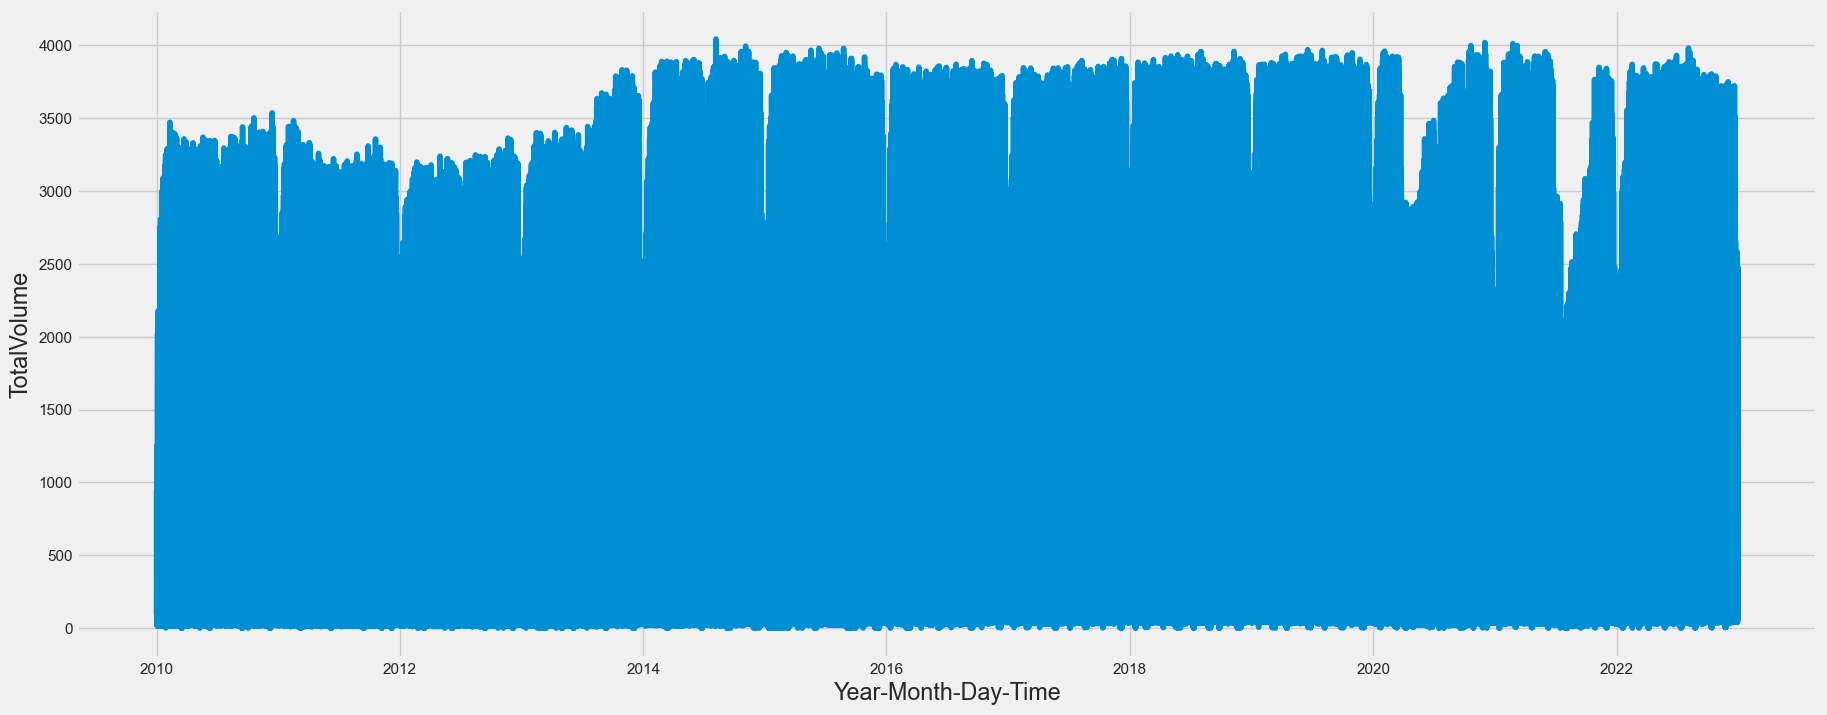

In [180]:
%%time
#Plot hourly traffic volume line graph for the given dataset
sns.lineplot(x=df_xgboost_4["Year-Month-Day-Time"], y=df_xgboost_4["TotalVolume"], data=df_xgboost_4)
sns.set(rc={'figure.figsize':(20,8)})

In [181]:
%%time
#Index the column: Year-Month-Day-Time
df_xgboost_4 = df_xgboost_4.set_index("Year-Month-Day-Time")

Wall time: 0 ns


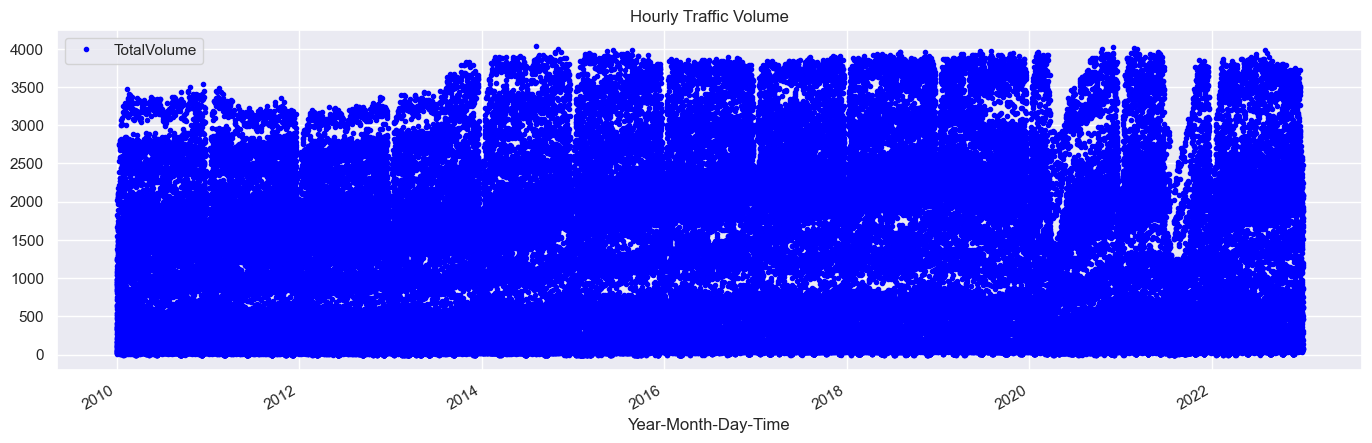

Wall time: 844 ms


In [182]:
%%time
df_xgboost_4.plot(style='.', figsize=(15,5), color='blue', title='Hourly Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [183]:
%%time
#Split train and test dataset for as a time series
training_df = df_xgboost_4.loc[df_xgboost_4.index < '01-01-2019']
testing_df = df_xgboost_4.loc[df_xgboost_4.index >= '01-01-2019']

Wall time: 5.98 ms


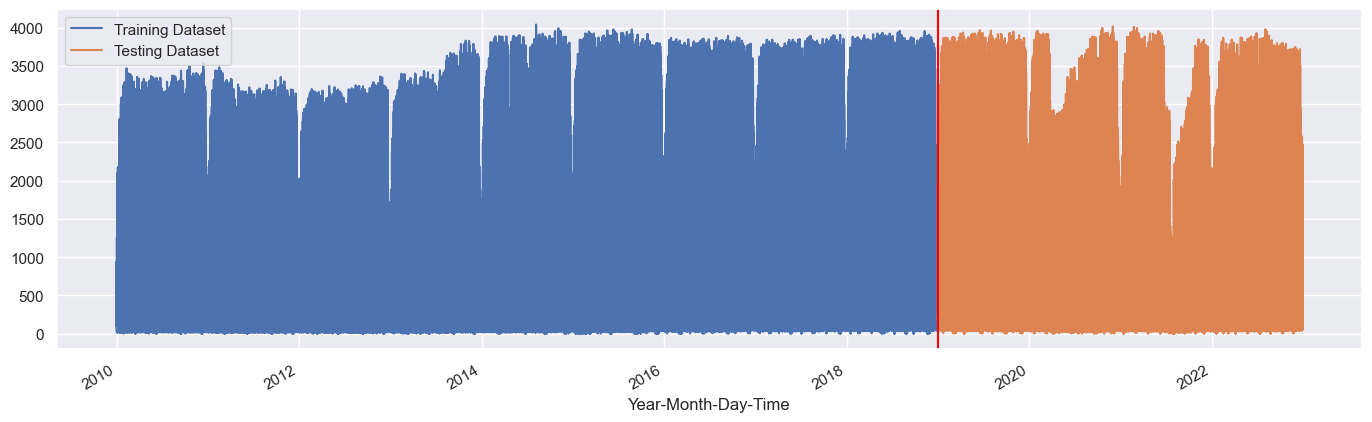

Wall time: 1.49 s


In [184]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2019', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [185]:
%%time
#Below is the feature creation created as a function
def feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [186]:
%%time
#Diplay features
df = feature_creation(df_xgboost_4)
df

Wall time: 67.4 ms


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2010-01-01 00:00:00           92     0                4        1      1  2010   
2010-01-01 01:00:00          159     1                4        1      1  2010   
2010-01-01 02:00:00          135     2                4        1      1  2010   
2010-01-01 03:00:00          104     3                4        1      1  2010   
2010-01-01 04:00:00          107     4                4        1      1  2010   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1151    19                5        4     12  2022   
2022-12-31 20:00:00          859    20                5        4     12  2022   
2022-12-31 21:00:00          692    21                5        4     12  2022   
2022-12-31 22:00:00          625    22                5        4     12  2022   
2022-12-31 23:00:00          465    23                5        4     12  2022   

                     Day of the year  
Year-Month-Day-Time                   
2010-01-01 00:00:00                1  
2010-01-01 01:00:00                1  
2010-01-01 02:00:00                1  
2010-01-01 03:00:00                1  
2010-01-01 04:00:00                1  
...                              ...  
2022-12-31 19:00:00              365  
2022-12-31 20:00:00              365  
2022-12-31 21:00:00              365  
2022-12-31 22:00:00              365  
2022-12-31 23:00:00              365  

[113934 rows x 7 columns]

Wall time: 194 ms


Text(0.5, 1.0, 'Hourly Traffic Volume')

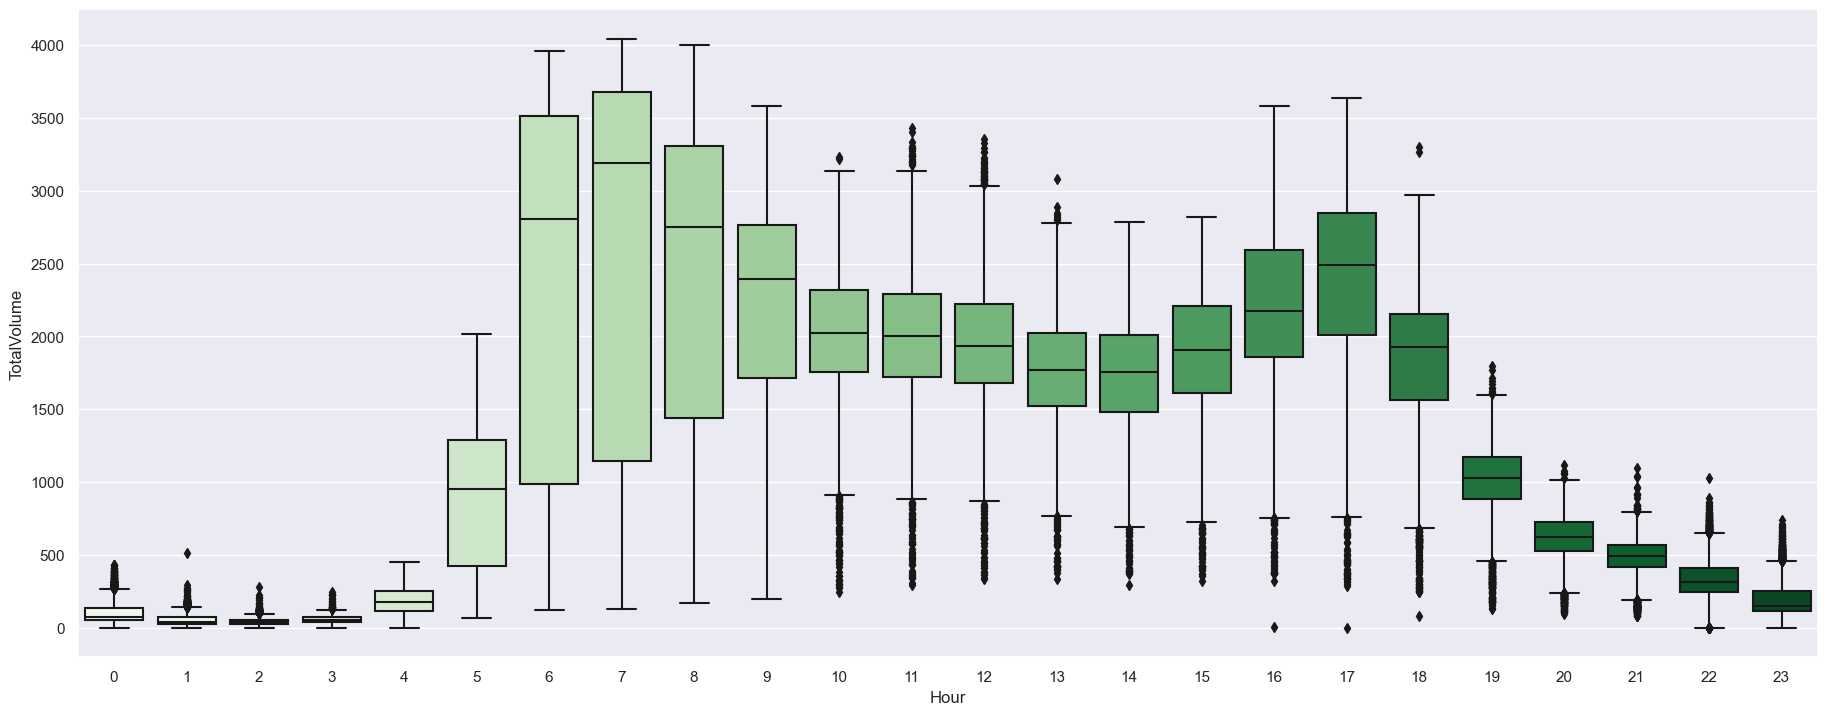

In [187]:
%%time
# Visualize hourly feature to target relationship
sns.boxplot(data=df, x='Hour', y='TotalVolume', palette='Greens')
ax.set_title('Hourly Traffic Volume')

<h2>Summary from hourly feature to target relationship:
<h3>
1. Peak hours in day-time: 6.00am - 10.00am and 3.00pm - 6.00pm<br>
2. Off-Peak hours in day-time: 10.00am - 3.00pm

Wall time: 179 ms


Text(0.5, 1.0, 'Monthly Traffic Volume')

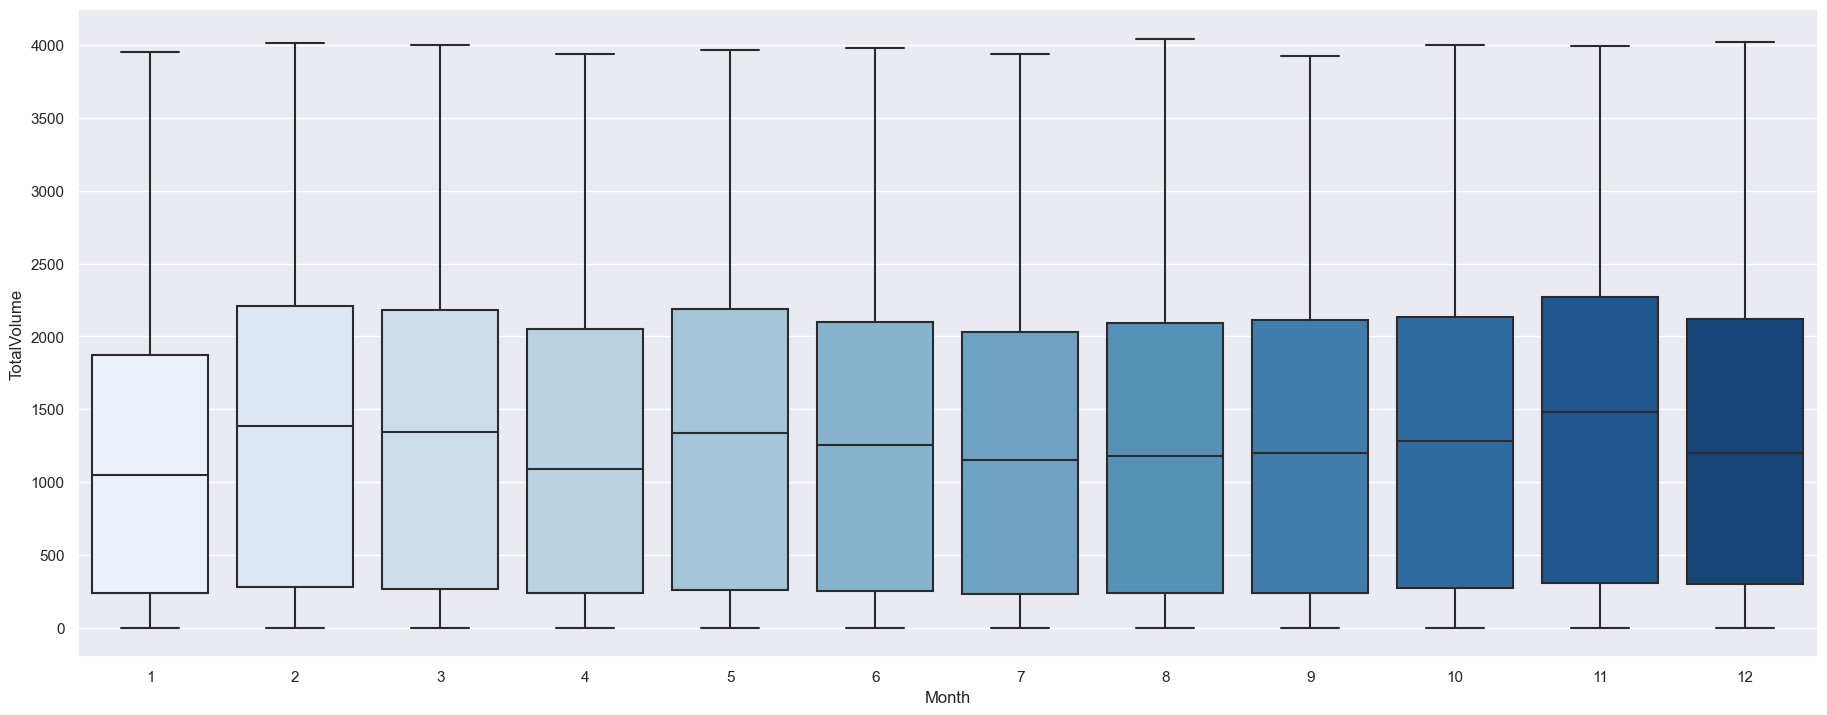

In [188]:
%%time
# Visualize monthly feature to target relationship
sns.boxplot(data=df, x='Month', y='TotalVolume', palette='Blues')
ax.set_title('Monthly Traffic Volume')

<h2>Summary from monthly feature to target relationship:
<h3>
Most of the monthly traffic lies between 250 - 2500

<font color='green'><center><h2><u>Add features to dataset</u></h2></center></font>

In [189]:
%%time
#Adding features to train and test dataset
training_df = feature_creation(training_df)
testing_df = feature_creation(testing_df)
COLUMN_FEATURES = ['Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
COLUMN_TARGET = ['TotalVolume']

Wall time: 60.8 ms


<font color='green'><center><h2><u>Define feature & target columns for train & test dataset</u></h2></center></font>

In [190]:
%%time
X_train = training_df[COLUMN_FEATURES]
y_train = training_df[COLUMN_TARGET]

X_test = testing_df[COLUMN_FEATURES]
y_test = testing_df[COLUMN_TARGET]

Wall time: 8.98 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [191]:
%%time
#Create the model
regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
#regressor = xgb.XGBRegressor(n_estimators=1000)

"""
regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=2000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 """
                                 
regressor.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

[0]	validation_0-rmse:1187.73831	validation_1-rmse:1200.17497
[56]	validation_0-rmse:127.66966	validation_1-rmse:468.93422
Wall time: 1.01 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<font color='green'><center><h2><u>Visualize Feature Importance</u></h2></center></font>

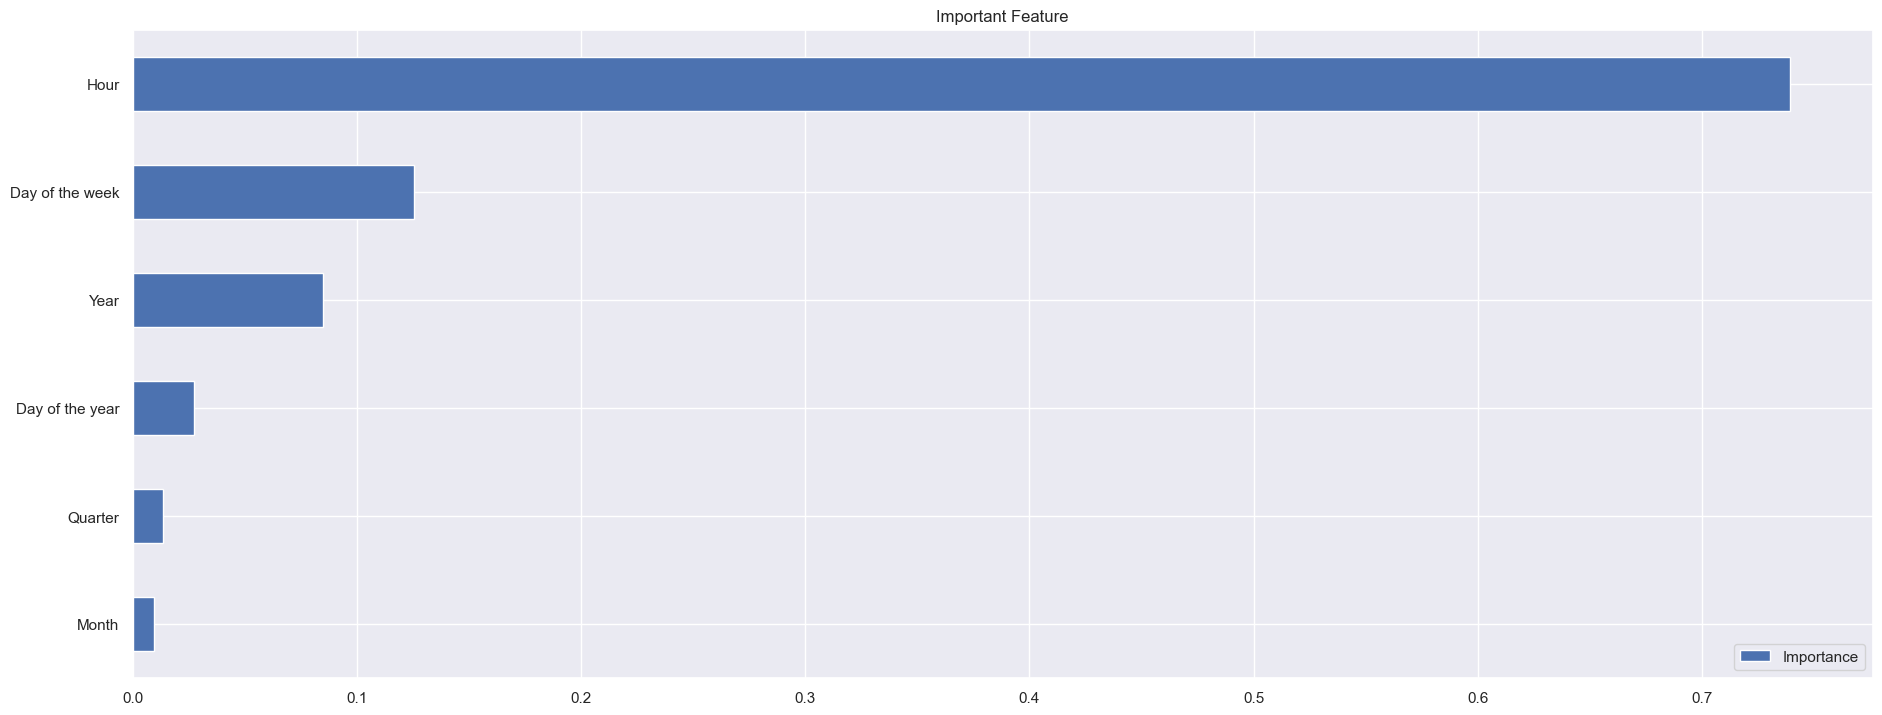

Wall time: 217 ms


In [192]:
%%time
fImportance = pd.DataFrame(data=regressor.feature_importances_,
                 index=regressor.feature_names_in_,
                 columns=['Importance'])
fImportance.sort_values('Importance').plot(kind='barh', title='Important Feature')
plt.show()

<h3>Conlusion: Hourly traffic volume has more importance than the other features

<font color='green'><center><h2><u>Predict test dataset</u></h2></center></font>

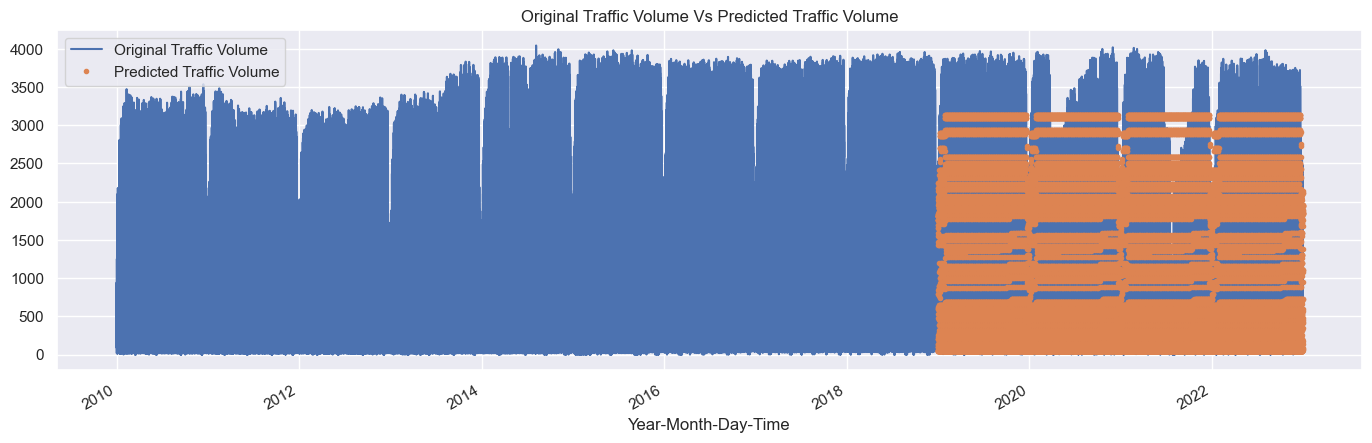

Wall time: 1.92 s


In [193]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedVolume'] = regressor.predict(X_test)
df = df.merge(testing_df['PredictedVolume'], how='left', left_index = True, right_index = True)
ax = df['TotalVolume'].plot(figsize=(15,5))
df['PredictedVolume'].plot(ax=ax, style='.')
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
ax.set_title('Original Traffic Volume Vs Predicted Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next Hour Traffic Volume of test dataset</u></h2></center></font>

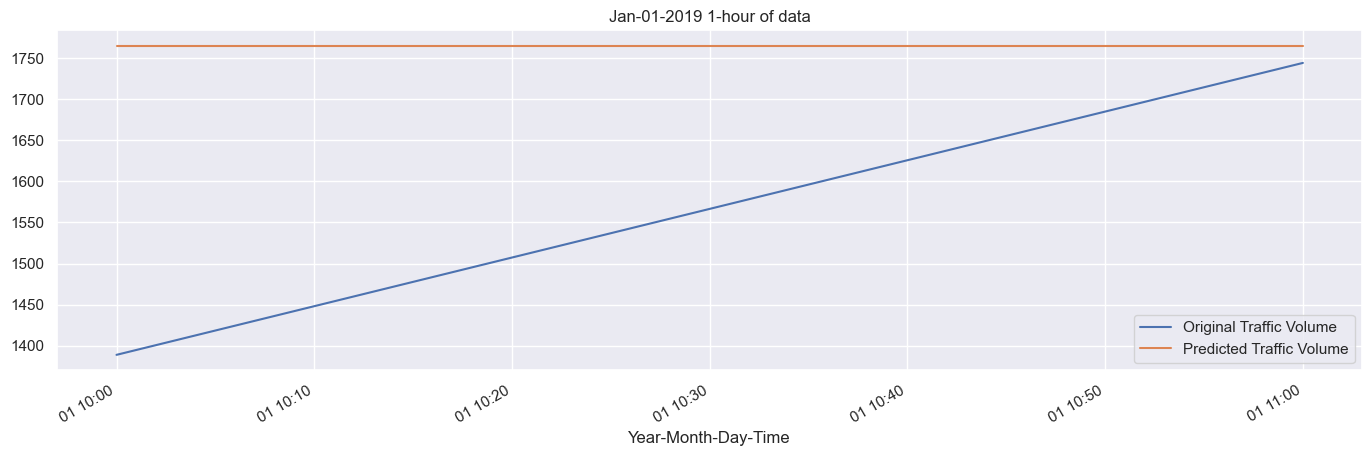

Wall time: 265 ms


In [194]:
%%time
#Hourly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan-01-2019 1-hour of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next one week Traffic Volume of test dataset for understanding</u></h2></center></font>

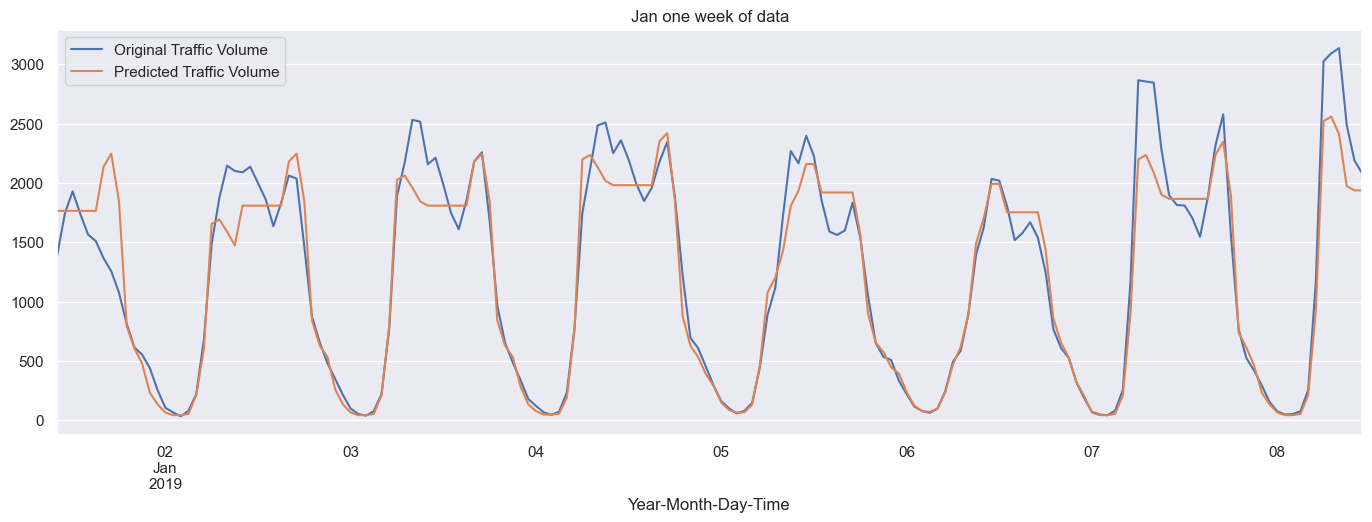

Wall time: 231 ms


In [195]:
%%time
#Weekly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan one week of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [196]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 260.23
Wall time: 2 ms


<font color='blue'><center><h2>Model 4: XGBoostRegressor - Part 2</h2></center></font>

<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [197]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as LCE
df_xgboost_p2 = df_inp_data.copy()
df_xgboost_p2['Date'] = pd.to_datetime(df_xgboost_p2['Date'])
df_xgboost_p2['Year-Month-Day-Time'] = df_xgboost_p2['Date'].dt.strftime('%Y-%m-%d') + " " + df_xgboost_p2['IntervalStart'].str.slice(0, 2) + ":00"
df_xgboost_p2_2 = df_xgboost_p2[df_xgboost_p2['TollPointID'] == "LCE"]

Wall time: 28.4 s


In [198]:
%%time
#Creating a dataframe with hour and its total volume
df_xgboost_p2_3 = df_xgboost_p2_2.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_xgboost_p2_4 = df_xgboost_p2_3.to_frame()
df_xgboost_p2_4.to_csv('boost_2.csv')
df_xgboost_p2_5 = pd.read_csv("C:/Users/USER/Documents/Toll/boost_2.csv")
df_xgboost_p2_5['Year-Month-Day-Time'] = pd.to_datetime(df_xgboost_p2_5['Year-Month-Day-Time'])
df_xgboost_p2_5 = df_xgboost_p2_5.set_index("Year-Month-Day-Time")

Wall time: 523 ms


<font color='green'><center><h2><u>Display Histogram</u></h2></center></font>

Wall time: 156 ms


<AxesSubplot:ylabel='Frequency'>

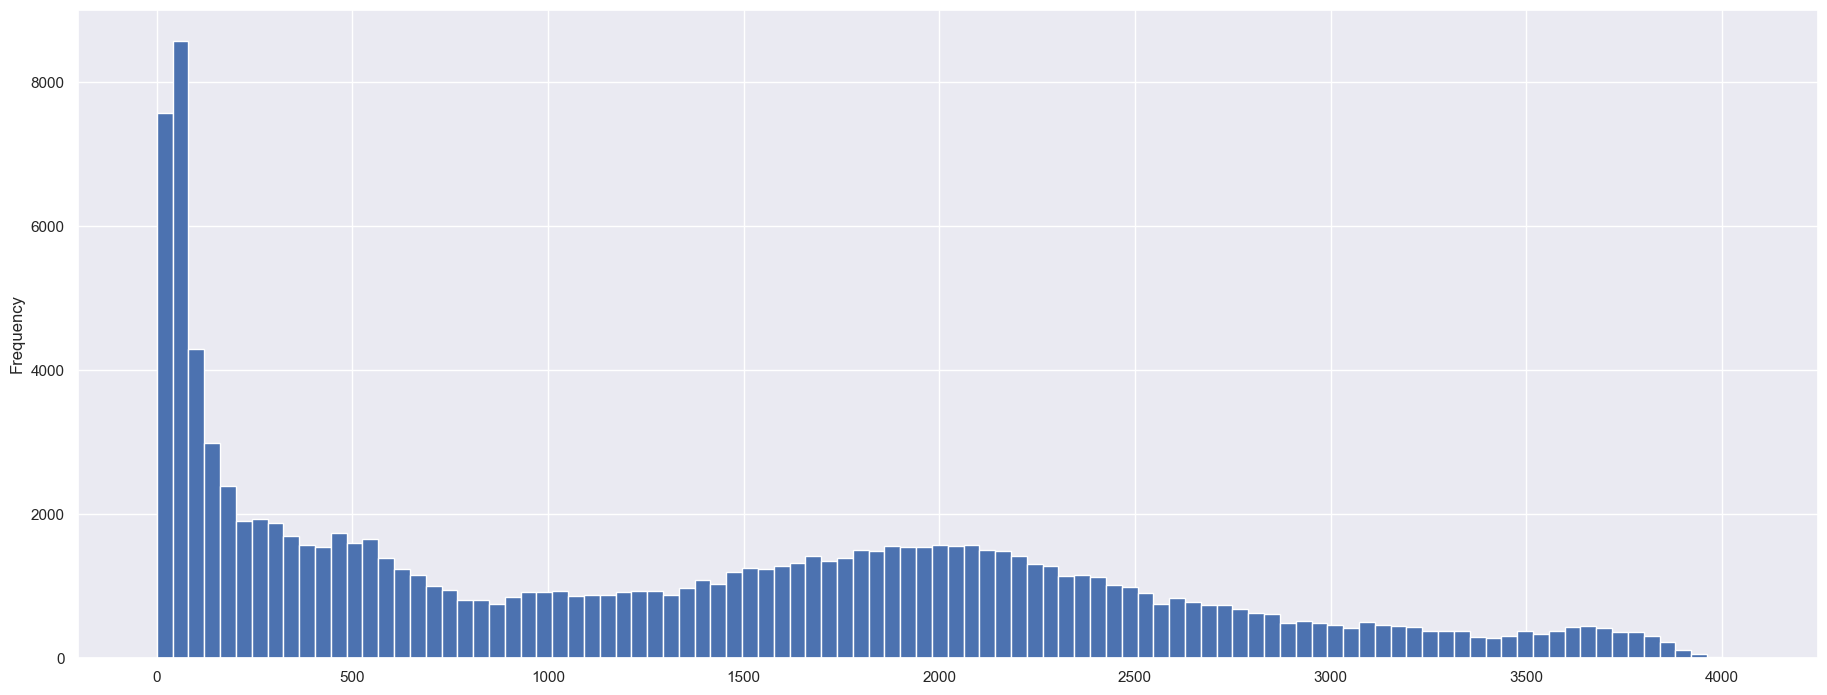

In [199]:
%%time
#Display Histogram of the Dataset
df_xgboost_p2_5['TotalVolume'].plot(kind='hist', bins=100)

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [200]:
%%time
#Below is the feature creation created as a function
def feature_creating(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    df['Day of the month'] = df.index.day
    df['Week of the year'] = df.index.isocalendar().week
    return df

Wall time: 0 ns


<font color='green'><center><h2><u>Create required lag features</u></h2></center></font>

In [201]:
%%time
#Creating Lag features like for same day last year etc.
def include_lags(df):    
    target_dict_map = df['TotalVolume'].to_dict()
    df['lag 1 year'] = (df.index - pd.Timedelta('364 days')).map(target_dict_map)
    df['lag 2 year'] = (df.index - pd.Timedelta('728 days')).map(target_dict_map)
    df['lag 3 year'] = (df.index - pd.Timedelta('1092 days')).map(target_dict_map)
    return(df)

Wall time: 0 ns


<font color='green'><center><h2><u>Training using cross validation: five fold cross validation.<br><br>Visualize 5-fold cross validation train & test dataset.</u></h2></center></font>

[0]	validation_0-rmse:1156.00825	validation_1-rmse:1369.90426
[100]	validation_0-rmse:101.05500	validation_1-rmse:155.55634
[103]	validation_0-rmse:100.21990	validation_1-rmse:155.36172
[0]	validation_0-rmse:1181.63156	validation_1-rmse:1326.05860
[100]	validation_0-rmse:102.41923	validation_1-rmse:216.49118
[174]	validation_0-rmse:90.41011	validation_1-rmse:216.18212
[0]	validation_0-rmse:1199.98271	validation_1-rmse:1038.97656
[53]	validation_0-rmse:121.42605	validation_1-rmse:511.74218
[0]	validation_0-rmse:1194.81103	validation_1-rmse:1168.44571
[64]	validation_0-rmse:120.15267	validation_1-rmse:577.18566
[0]	validation_0-rmse:1191.97411	validation_1-rmse:1394.39375
[59]	validation_0-rmse:132.28669	validation_1-rmse:608.94508
Wall time: 16.5 s


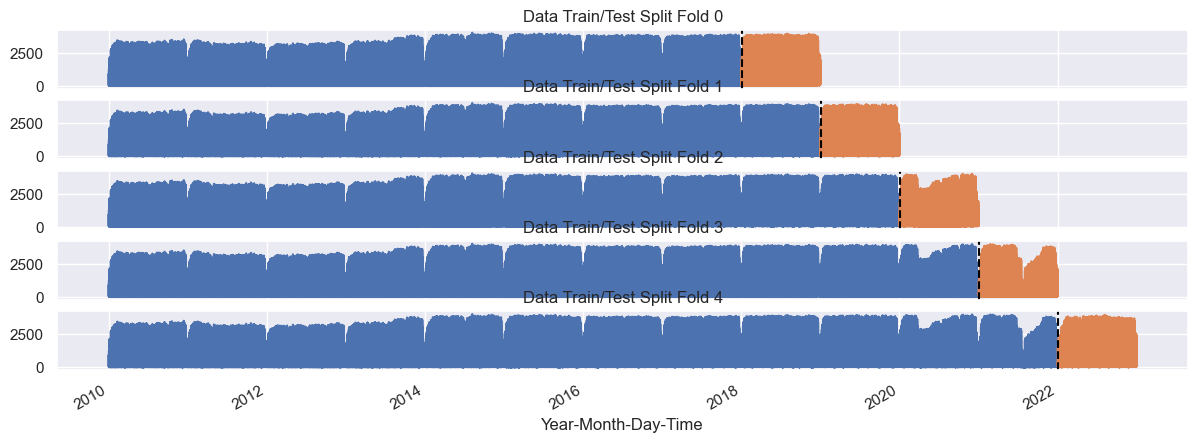

In [202]:
%%time
#Training using Cross Validation
TSsplit = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df_xgboost_p2_5.sort_index()
df = include_lags(df)

folding = 0
predicted_val = []
scores_val = []
mean_abs_err = []
fig, axs = plt.subplots(5, 1, figsize=(13, 5), sharex=True)
for training_idx, validation_idx in TSsplit.split(df):
    training = df.iloc[training_idx]
    testing = df.iloc[validation_idx]
    
    #Visualize 5-fold cross validation train & test dataset
    training['TotalVolume'].plot(ax=axs[folding], label='Training Set', title=f'Data Train/Test Split Fold {folding}')
    testing['TotalVolume'].plot(ax=axs[folding], label='Testing Set')
    axs[folding].axvline(testing.index.min(), color='black', ls='--')

    training = feature_creating(training)
    testing = feature_creating(testing)

    FEATURES = ['Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month',
                'lag 1 year','lag 2 year','lag 3 year']
    TARGET = 'TotalVolume'

    X_train = training[FEATURES]
    y_train = training[TARGET]

    X_test = testing[FEATURES]
    y_test = testing[TARGET]
    
    regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)

    """
    regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=2000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 """
                                 
    regressor.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_predicted = regressor.predict(X_test)
    predicted_val.append(y_predicted)
    score_val = np.sqrt(mean_squared_error(y_test, y_predicted))
    scores_val.append( round(score_val,2) )
    ErrVal = np.abs(y_test - y_predicted)
    mean_abs_err.append( round(ErrVal.mean(),2) )
    
    folding = folding + 1

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [203]:
%%time
print(f'Mean absolute error across folds for testing dataset: {np.mean(mean_abs_err):0.2f}')
print(f'Each fold mean absolute error for testing dataset: {mean_abs_err}')

Mean absolute error across folds for testing dataset: 241.07
Each fold mean absolute error for testing dataset: [98.9, 126.13, 233.5, 355.68, 391.12]
Wall time: 0 ns


<font color='green'><center><h2><u>Visualize Input Data Monthly Traffic Volume</u></h2></center></font>

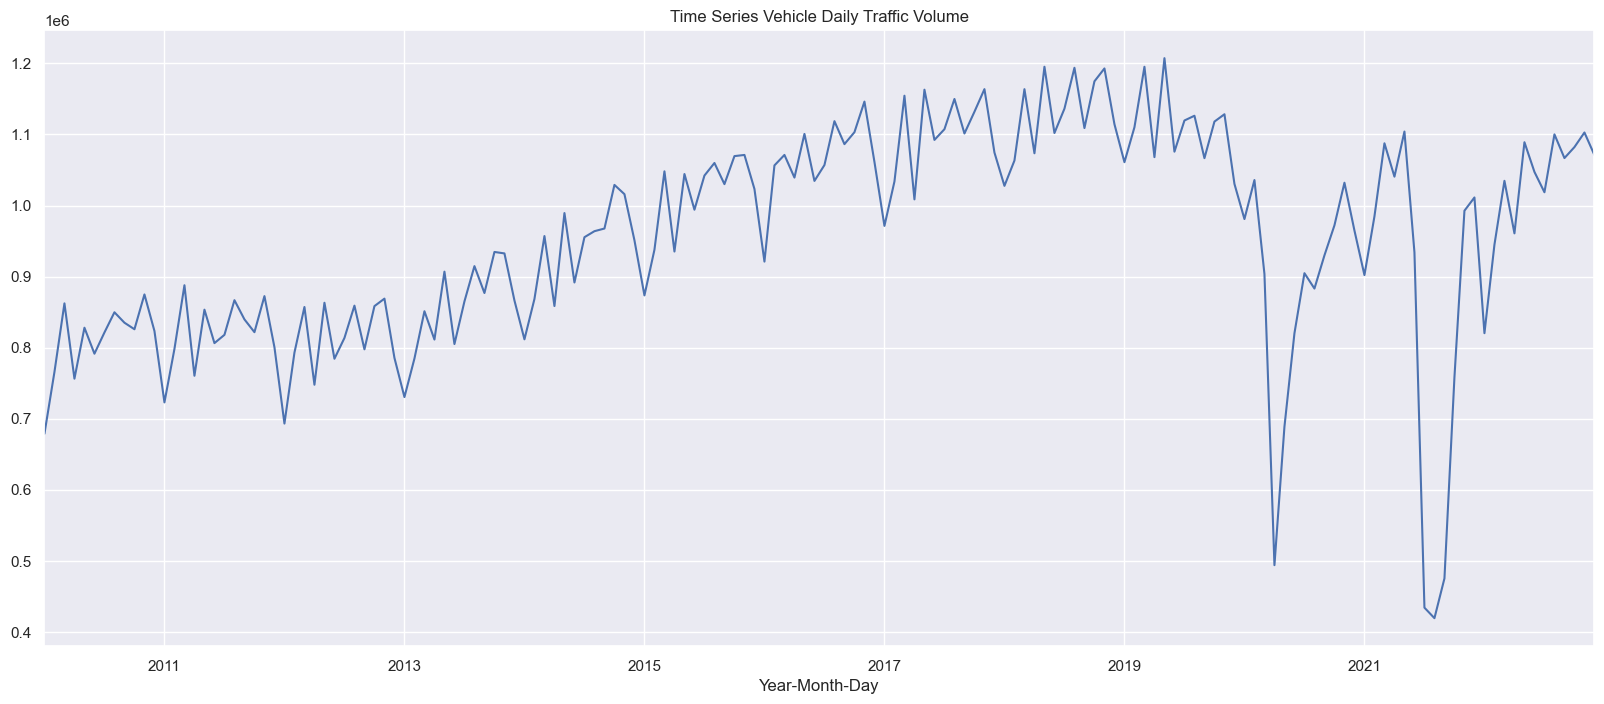

Wall time: 3.2 s


In [70]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as LCE
df_monthly_vol = df_inp_data.copy()
df_monthly_vol['Year-Month-Day'] = df_monthly_vol['Date'].str.slice(0, 7) + "-01"
df_monthly_vol_1 = df_monthly_vol[df_monthly_vol['TollPointID'] == "LCE"]

#Creating a dataframe with month and its total volume
df_monthly_vol_2 = df_monthly_vol_1.groupby(['Year-Month-Day'])['TotalVolume'].sum()
df_monthly_vol_3 = df_monthly_vol_2.to_frame()
df_monthly_vol_3.to_csv('monthly.csv')
df_monthly_vol_4 = pd.read_csv("C:/Users/USER/Documents/Toll/monthly.csv")

df_monthly_vol_4['Year-Month-Day'] = pd.to_datetime(df_monthly_vol_4['Year-Month-Day'])
df_monthly_vol_4 = df_monthly_vol_4.set_index("Year-Month-Day")

#Plot Monthly Traffic Volume
df_monthly_vol_4.TotalVolume.plot(figsize=(20,8), title="Time Series Vehicle Daily Traffic Volume")
plt.show()

<h2>Summary:
<h3>The mean absolute error is high in the years 2020, 2021, and 2022 due to a sharp fall in traffic volume due to COVID-19.

<font color='green'><center><h2><u>Future Traffic Volume Prediction</u></h2></center></font>

In [205]:
%%time
#Train all of the data before doing future prediction
df = feature_creating(df)

FEATURES = ['Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month', 'lag 1 year','lag 2 year','lag 3 year']
TARGET = 'TotalVolume'

X_all = df[FEATURES]
y_all = df[TARGET]

regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)

"""
regressor = xgb.XGBRegressor(base_score=0.5,
                             booster='gbtree', 
                             n_estimators=2000,
                             early_stopping_rounds=50,
                             objective='reg:linear',
                             max_depth=3,
                             learning_rate=0.01)
                             """                             
regressor.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[0]	validation_0-rmse:1199.51522
[100]	validation_0-rmse:121.68583
[200]	validation_0-rmse:100.69987
[300]	validation_0-rmse:88.93040
[400]	validation_0-rmse:81.56603
[500]	validation_0-rmse:75.66736
[600]	validation_0-rmse:70.88379
[700]	validation_0-rmse:66.96754
[800]	validation_0-rmse:63.28211
[900]	validation_0-rmse:60.00316
[999]	validation_0-rmse:57.03970
Wall time: 38 s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [206]:
%%time
#Find recent / latest data and time of the given dataset
df.index.max()

Wall time: 0 ns


Timestamp('2022-12-31 23:00:00')

In [207]:
%%time
#Create future dataframe
future = pd.date_range('2023-01-01', '2023-01-08', freq='1h')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
Past_and_future_df = pd.concat([df, future_df])

Wall time: 8.97 ms


In [208]:
%%time
Past_and_future_df

Wall time: 0 ns


TotalVolume  lag 1 year  lag 2 year  lag 3 year  Hour  \
2010-01-01 00:00:00         92.0         NaN         NaN         NaN   0.0   
2010-01-01 01:00:00        159.0         NaN         NaN         NaN   1.0   
2010-01-01 02:00:00        135.0         NaN         NaN         NaN   2.0   
2010-01-01 03:00:00        104.0         NaN         NaN         NaN   3.0   
2010-01-01 04:00:00        107.0         NaN         NaN         NaN   4.0   
...                          ...         ...         ...         ...   ...   
2023-01-07 20:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-07 21:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-07 22:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-07 23:00:00          NaN         NaN         NaN         NaN   NaN   
2023-01-08 00:00:00          NaN         NaN         NaN         NaN   NaN   

                     Day of the week  Quarter  Month    Year  Day of the year  \
2010-01-01 00:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 01:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 02:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 03:00:00              4.0      1.0    1.0  2010.0              1.0   
2010-01-01 04:00:00              4.0      1.0    1.0  2010.0              1.0   
...                              ...      ...    ...     ...              ...   
2023-01-07 20:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-07 21:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-07 22:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-07 23:00:00              NaN      NaN    NaN     NaN              NaN   
2023-01-08 00:00:00              NaN      NaN    NaN     NaN              NaN   

                     Day of the month  Week of the year  isFuture  
2010-01-01 00:00:00               1.0                53     False  
2010-01-01 01:00:00               1.0                53     False  
2010-01-01 02:00:00               1.0                53     False  
2010-01-01 03:00:00               1.0                53     False  
2010-01-01 04:00:00               1.0                53     False  
...                               ...               ...       ...  
2023-01-07 20:00:00               NaN              <NA>      True  
2023-01-07 21:00:00               NaN              <NA>      True  
2023-01-07 22:00:00               NaN              <NA>      True  
2023-01-07 23:00:00               NaN              <NA>      True  
2023-01-08 00:00:00               NaN              <NA>      True  

[114103 rows x 13 columns]

In [209]:
%%time
#Pass past+future dataset to add features and lags
Past_and_future_df = feature_creating(Past_and_future_df)
Past_and_future_df = include_lags(Past_and_future_df)
Past_and_future_df

Wall time: 1.73 s


TotalVolume  lag 1 year  lag 2 year  lag 3 year  Hour  \
2010-01-01 00:00:00         92.0         NaN         NaN         NaN     0   
2010-01-01 01:00:00        159.0         NaN         NaN         NaN     1   
2010-01-01 02:00:00        135.0         NaN         NaN         NaN     2   
2010-01-01 03:00:00        104.0         NaN         NaN         NaN     3   
2010-01-01 04:00:00        107.0         NaN         NaN         NaN     4   
...                          ...         ...         ...         ...   ...   
2023-01-07 20:00:00          NaN       565.0       751.0       732.0    20   
2023-01-07 21:00:00          NaN       461.0       580.0       583.0    21   
2023-01-07 22:00:00          NaN       329.0       453.0       579.0    22   
2023-01-07 23:00:00          NaN       218.0       341.0       419.0    23   
2023-01-08 00:00:00          NaN       135.0       208.0       255.0     0   

                     Day of the week  Quarter  Month  Year  Day of the year  \
2010-01-01 00:00:00                4        1      1  2010                1   
2010-01-01 01:00:00                4        1      1  2010                1   
2010-01-01 02:00:00                4        1      1  2010                1   
2010-01-01 03:00:00                4        1      1  2010                1   
2010-01-01 04:00:00                4        1      1  2010                1   
...                              ...      ...    ...   ...              ...   
2023-01-07 20:00:00                5        1      1  2023                7   
2023-01-07 21:00:00                5        1      1  2023                7   
2023-01-07 22:00:00                5        1      1  2023                7   
2023-01-07 23:00:00                5        1      1  2023                7   
2023-01-08 00:00:00                6        1      1  2023                8   

                     Day of the month  Week of the year  isFuture  
2010-01-01 00:00:00                 1                53     False  
2010-01-01 01:00:00                 1                53     False  
2010-01-01 02:00:00                 1                53     False  
2010-01-01 03:00:00                 1                53     False  
2010-01-01 04:00:00                 1                53     False  
...                               ...               ...       ...  
2023-01-07 20:00:00                 7                 1      True  
2023-01-07 21:00:00                 7                 1      True  
2023-01-07 22:00:00                 7                 1      True  
2023-01-07 23:00:00                 7                 1      True  
2023-01-08 00:00:00                 8                 1      True  

[114103 rows x 13 columns]

In [210]:
%%time
#Split and dislay only future dataset
future_with_features = Past_and_future_df.query('isFuture').copy()
future_with_features.tail()

Wall time: 13 ms


TotalVolume  lag 1 year  lag 2 year  lag 3 year  Hour  \
2023-01-07 20:00:00          NaN       565.0       751.0       732.0    20   
2023-01-07 21:00:00          NaN       461.0       580.0       583.0    21   
2023-01-07 22:00:00          NaN       329.0       453.0       579.0    22   
2023-01-07 23:00:00          NaN       218.0       341.0       419.0    23   
2023-01-08 00:00:00          NaN       135.0       208.0       255.0     0   

                     Day of the week  Quarter  Month  Year  Day of the year  \
2023-01-07 20:00:00                5        1      1  2023                7   
2023-01-07 21:00:00                5        1      1  2023                7   
2023-01-07 22:00:00                5        1      1  2023                7   
2023-01-07 23:00:00                5        1      1  2023                7   
2023-01-08 00:00:00                6        1      1  2023                8   

                     Day of the month  Week of the year  isFuture  
2023-01-07 20:00:00                 7                 1      True  
2023-01-07 21:00:00                 7                 1      True  
2023-01-07 22:00:00                 7                 1      True  
2023-01-07 23:00:00                 7                 1      True  
2023-01-08 00:00:00                 8                 1      True

In [211]:
%%time
#Predict the future
future_with_features['PredictedVolume'] = regressor.predict(future_with_features[FEATURES])

Wall time: 4.99 ms


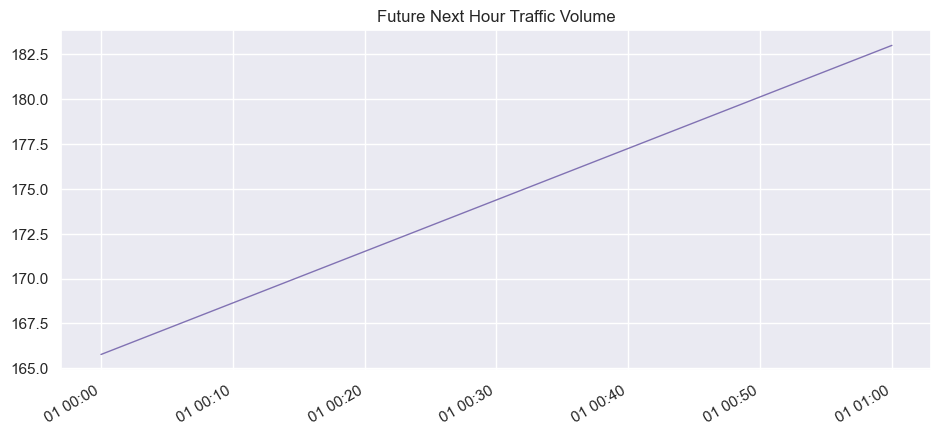

Wall time: 237 ms


In [212]:
%%time
#Plot the future: Next Hour
future_with_features['PredictedVolume'].iloc[0:2].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Hour Traffic Volume')
plt.show()

Next Hour Traffic Volume:
Wall time: 64.8 ms


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='TotalVolume'>

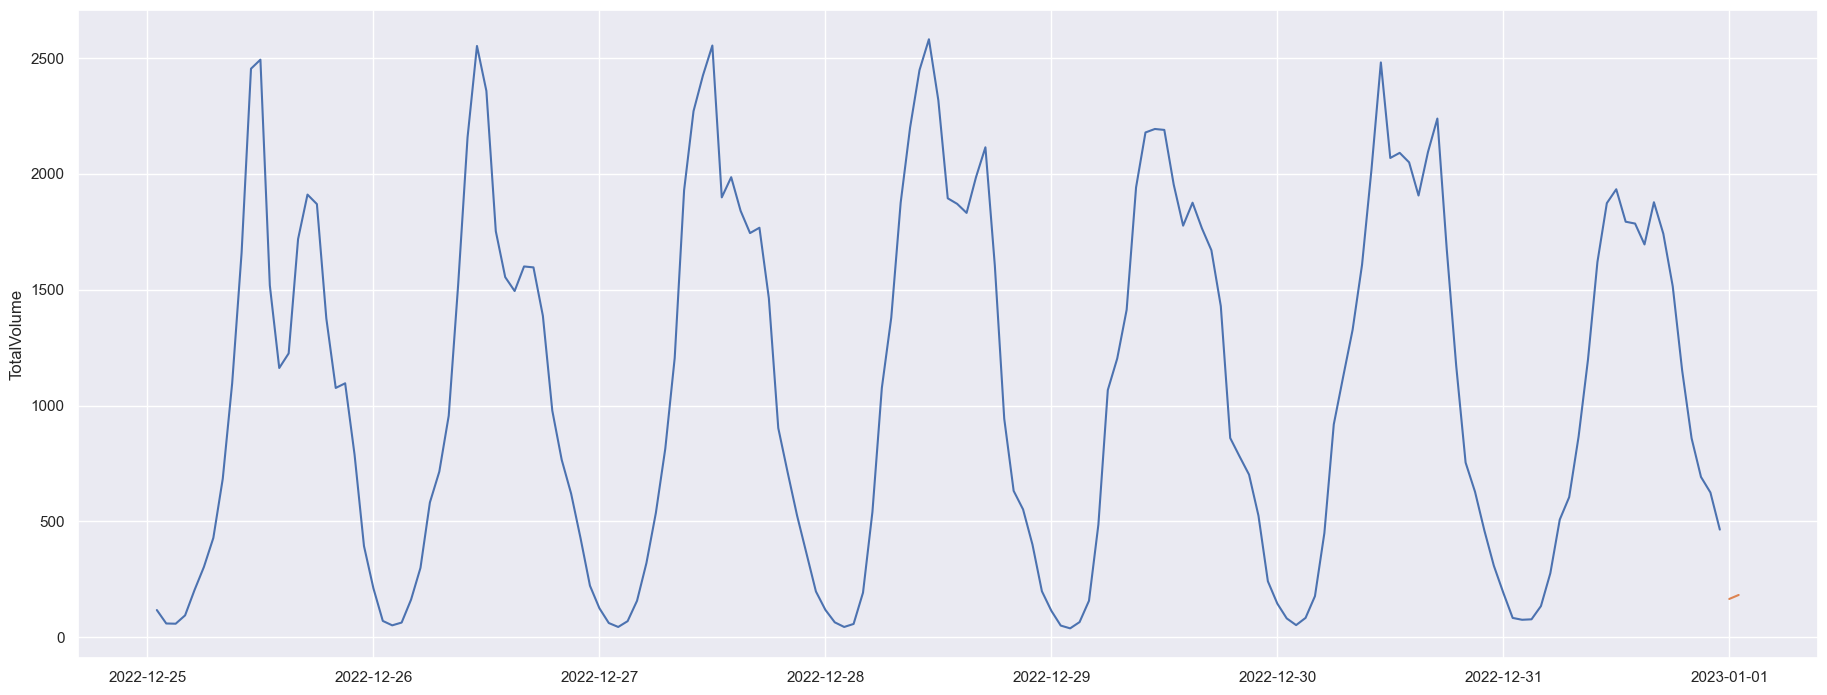

In [213]:
%%time
print("Next Hour Traffic Volume:")
plot1 = Past_and_future_df.loc[Past_and_future_df.index > '12-25-2022']
plot2 = future_with_features['PredictedVolume'].iloc[0:2]
sns.lineplot(plot1.index, plot1['TotalVolume'])
sns.lineplot(plot2.index, plot2)

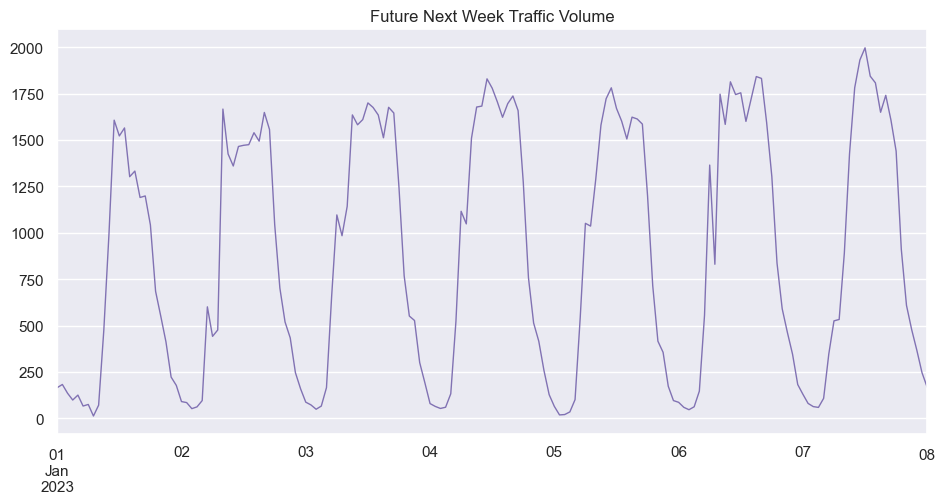

Wall time: 200 ms


In [214]:
%%time
#Plot the future: Next Week
future_with_features['PredictedVolume'].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Week Traffic Volume')
plt.show()

Next Week Traffic Volume:
Wall time: 66.8 ms


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='TotalVolume'>

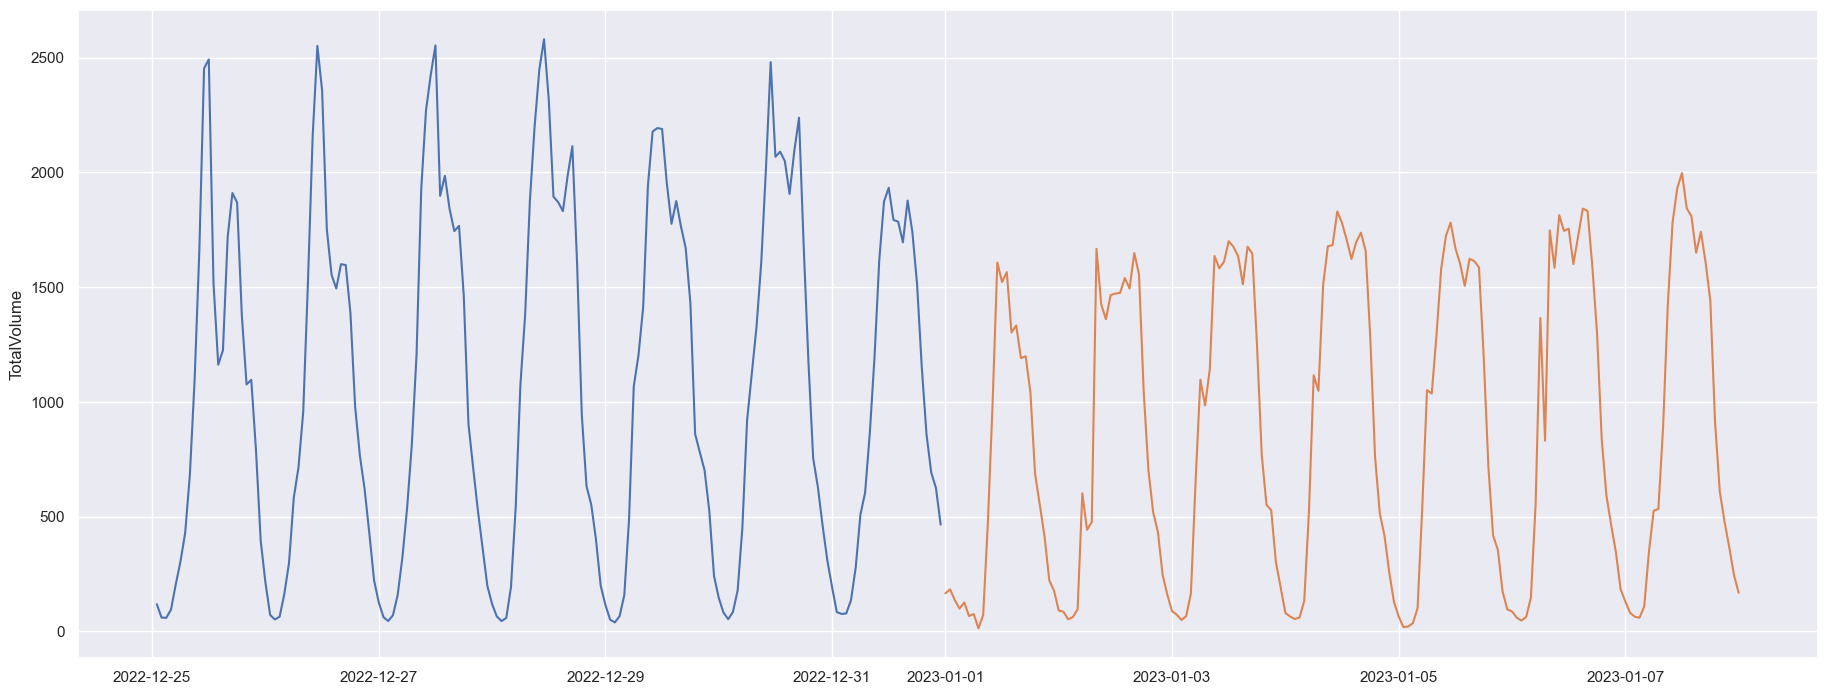

In [215]:
%%time
print("Next Week Traffic Volume:")
plot1 = Past_and_future_df.loc[Past_and_future_df.index > '12-25-2022']
plot2 = future_with_features['PredictedVolume']
sns.lineplot(plot1.index, plot1['TotalVolume'])
sns.lineplot(plot2.index, plot2)

<font color='blue'><center><h2>Model 5: RandomForestRegressor</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [106]:
%%time
#Import Libraries
from sklearn.ensemble import RandomForestRegressor

Wall time: 57.9 ms


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [107]:
%%time
#Input traffic data set
#Filter and store the dataset having TollPointID as LCE
df_RMregressor = df_inp_data.copy()
df_RMregressor['Date'] = pd.to_datetime(df_RMregressor['Date'])
df_RMregressor['Year-Month-Day-Time'] = df_RMregressor['Date'].dt.strftime('%Y-%m-%d') + " " + df_RMregressor['IntervalStart'].str.slice(0, 2) + ":00"
df_RMregressor_1 = df_RMregressor[df_RMregressor['TollPointID'] == "LCE"]

Wall time: 56.4 s


In [108]:
%%time
#Creating a dataframe with hour and its total volume
df_RMregressor_2 = df_RMregressor_1.groupby(['Year-Month-Day-Time'])['TotalVolume'].sum()
df_RMregressor_3 = df_RMregressor_2.to_frame()
df_RMregressor_3.to_csv('rm.csv')
df_RMregressor_4 = pd.read_csv("C:/Users/USER/Documents/Toll/rm.csv")

#Convert the column: Year-Month-Day-Time into datetime data type
df_RMregressor_4['Year-Month-Day-Time'] = pd.to_datetime(df_RMregressor_4['Year-Month-Day-Time'])

#Index the column: Year-Month-Day-Time
df_RMregressor_4 = df_RMregressor_4.set_index("Year-Month-Day-Time")

Wall time: 925 ms


In [109]:
%%time
#Display the dataframe with hour and its total volume
df_RMregressor_4

Wall time: 0 ns


TotalVolume
Year-Month-Day-Time             
2010-01-01 00:00:00           92
2010-01-01 01:00:00          159
2010-01-01 02:00:00          135
2010-01-01 03:00:00          104
2010-01-01 04:00:00          107
...                          ...
2022-12-31 19:00:00         1151
2022-12-31 20:00:00          859
2022-12-31 21:00:00          692
2022-12-31 22:00:00          625
2022-12-31 23:00:00          465

[113934 rows x 1 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

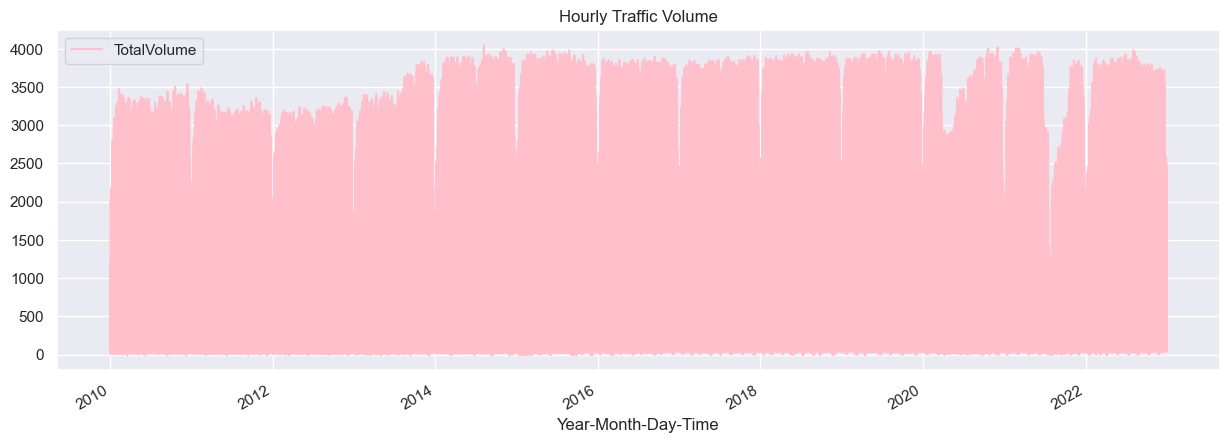

Wall time: 2.12 s


In [110]:
%%time
#Plot hourly traffic volume line graph for the given dataset
df_RMregressor_4.plot(style='-', figsize=(15,5), color='pink', title='Hourly Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Training & Testing Dataset</u></h2></center></font>

In [111]:
%%time
#Split train and test dataset for as a time series
training_df = df_RMregressor_4.loc[df_dtregressor_4.index < '01-01-2019']
testing_df = df_RMregressor_4.loc[ (df_dtregressor_4.index >= '01-01-2019') ]

Wall time: 3.3 ms


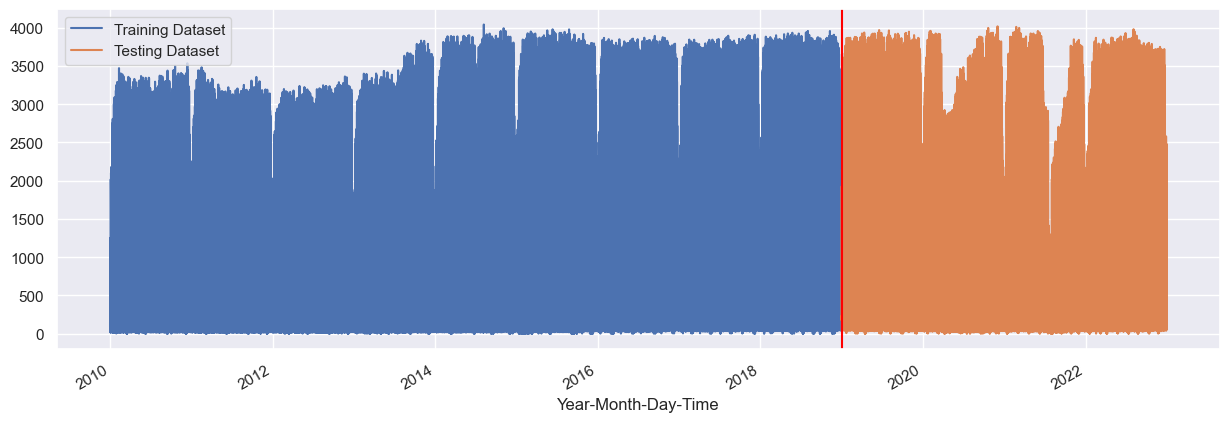

Wall time: 2.18 s


In [112]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2019', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [113]:
%%time
#Below is the feature creation created as a function
def rm_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [114]:
%%time
#Diplay features
df = rm_feature_creation(df_RMregressor_4)
df

Wall time: 75.6 ms


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2010-01-01 00:00:00           92     0                4        1      1  2010   
2010-01-01 01:00:00          159     1                4        1      1  2010   
2010-01-01 02:00:00          135     2                4        1      1  2010   
2010-01-01 03:00:00          104     3                4        1      1  2010   
2010-01-01 04:00:00          107     4                4        1      1  2010   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1151    19                5        4     12  2022   
2022-12-31 20:00:00          859    20                5        4     12  2022   
2022-12-31 21:00:00          692    21                5        4     12  2022   
2022-12-31 22:00:00          625    22                5        4     12  2022   
2022-12-31 23:00:00          465    23                5        4     12  2022   

                     Day of the year  
Year-Month-Day-Time                   
2010-01-01 00:00:00                1  
2010-01-01 01:00:00                1  
2010-01-01 02:00:00                1  
2010-01-01 03:00:00                1  
2010-01-01 04:00:00                1  
...                              ...  
2022-12-31 19:00:00              365  
2022-12-31 20:00:00              365  
2022-12-31 21:00:00              365  
2022-12-31 22:00:00              365  
2022-12-31 23:00:00              365  

[113934 rows x 7 columns]

In [115]:
%%time
#Adding features to train and test dataset
training_df = rm_feature_creation(training_df)
testing_df = rm_feature_creation(testing_df)
COLUMN_FEATURES = ['Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
COLUMN_TARGET = ['TotalVolume']

Wall time: 78 ms


In [116]:
%%time
X_train = training_df[COLUMN_FEATURES]
y_train = training_df[COLUMN_TARGET]

X_test = testing_df[COLUMN_FEATURES]
y_test = testing_df[COLUMN_TARGET]

Wall time: 10.2 ms


<font color='green'><center><h2><u>Model Creation</u></h2></center></font>

In [117]:
%%time
#Create the model
rmRegressor = RandomForestRegressor(n_estimators=100,
                            max_depth=50)
#rmRegressor = RandomForestRegressor(n_estimators=100)
#rmRegressor = RandomForestRegressor(n_estimators=100,
#                             max_depth=50)
rmRegressor.fit(X_train, y_train
       )

<timed exec>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 36.4 s


RandomForestRegressor(max_depth=50)

<font color='green'><center><h2><u>Predict test dataset</u></h2></center></font>

In [118]:
%%time
testing_df['PredictedVolume'] = rmRegressor.predict(X_test)

Wall time: 1.66 s


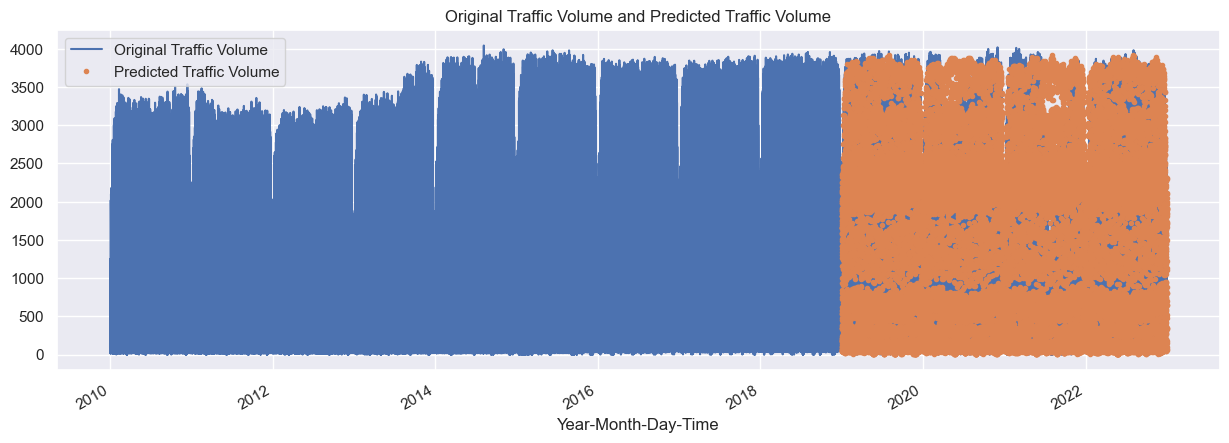

Wall time: 3.96 s


In [119]:
%%time
df = df.merge(testing_df['PredictedVolume'], how='left', left_index = True, right_index = True)
ax = df['TotalVolume'].plot(figsize=(15,5))
df['PredictedVolume'].plot(ax=ax, style='.')
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
ax.set_title('Original Traffic Volume and Predicted Traffic Volume')
plt.show()

In [120]:
%%time
#Display test data with predicted traffic volume
testing_df

Wall time: 0 ns


TotalVolume  Hour  Day of the week  Quarter  Month  Year  \
Year-Month-Day-Time                                                             
2019-01-01 00:00:00          234     0                1        1      1  2019   
2019-01-01 01:00:00          293     1                1        1      1  2019   
2019-01-01 02:00:00          280     2                1        1      1  2019   
2019-01-01 03:00:00          227     3                1        1      1  2019   
2019-01-01 04:00:00          173     4                1        1      1  2019   
...                          ...   ...              ...      ...    ...   ...   
2022-12-31 19:00:00         1151    19                5        4     12  2022   
2022-12-31 20:00:00          859    20                5        4     12  2022   
2022-12-31 21:00:00          692    21                5        4     12  2022   
2022-12-31 22:00:00          625    22                5        4     12  2022   
2022-12-31 23:00:00          465    23                5        4     12  2022   

                     Day of the year  PredictedVolume  
Year-Month-Day-Time                                    
2019-01-01 00:00:00                1           158.41  
2019-01-01 01:00:00                1           246.63  
2019-01-01 02:00:00                1           221.79  
2019-01-01 03:00:00                1           139.67  
2019-01-01 04:00:00                1           174.02  
...                              ...              ...  
2022-12-31 19:00:00              365          1137.03  
2022-12-31 20:00:00              365           812.16  
2022-12-31 21:00:00              365           652.83  
2022-12-31 22:00:00              365           515.69  
2022-12-31 23:00:00              365           349.67  

[35056 rows x 8 columns]

<font color='green'><center><h2><u>Plot Predicted Next Hour Traffic Volume of test dataset</u></h2></center></font>

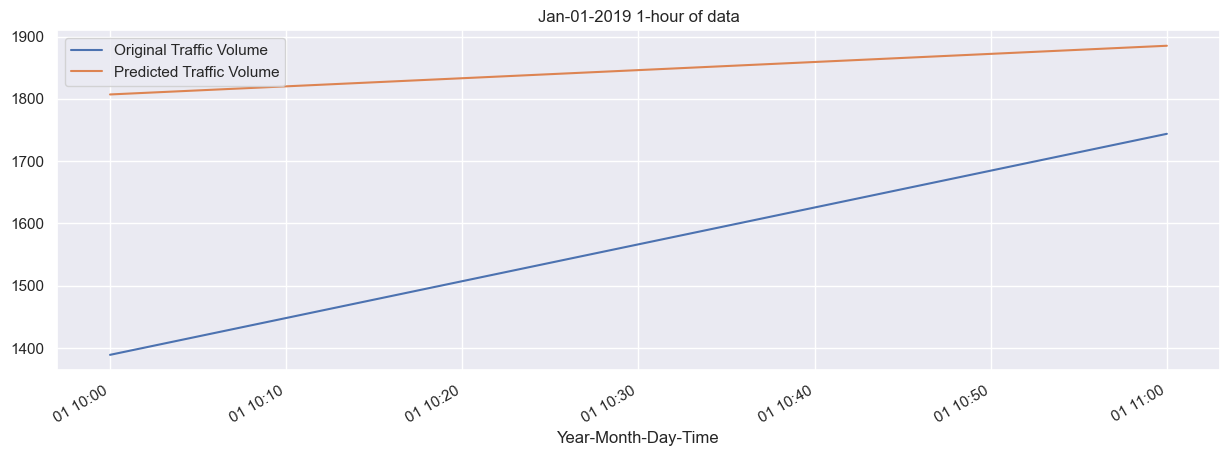

Wall time: 437 ms


In [121]:
%%time
#Hourly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan-01-2019 1-hour of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-01-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Plot Predicted Next one week Traffic Volume of test dataset for understanding</u></h2></center></font>

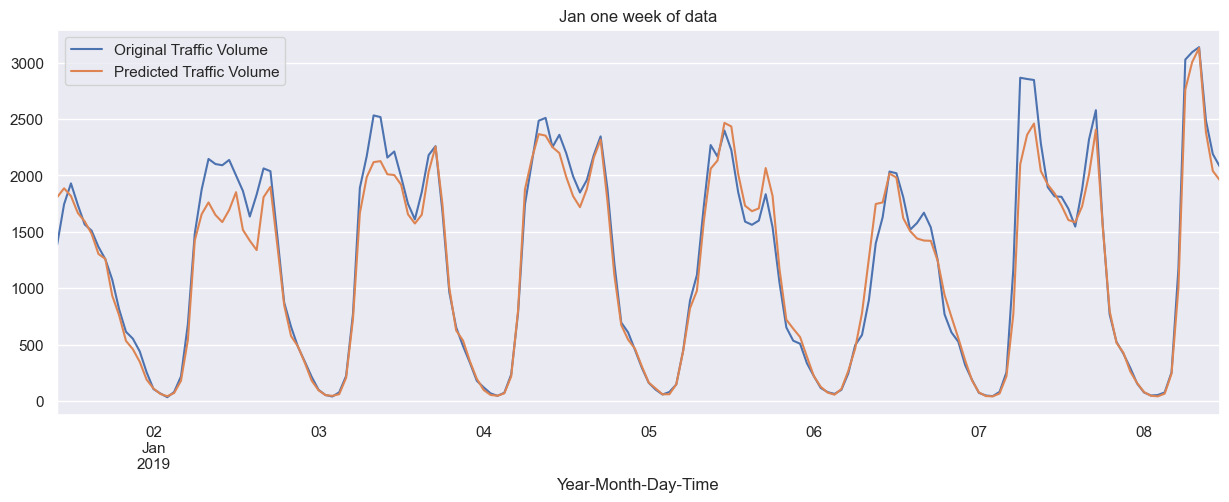

Wall time: 377 ms


In [122]:
%%time
#Weekly prediction
ax = df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['TotalVolume'].plot(figsize=(15, 5), title='Jan one week of data')
df.loc[(df.index >= '01-01-2019 10:00:00') & (df.index <= '01-08-2019 11:00:00')]['PredictedVolume'].plot(style="-")
plt.legend(['Original Traffic Volume', 'Predicted Traffic Volume'])
plt.show()

<font color='green'><center><h2><u>Evaluation Metrics</u></h2></center></font>

In [123]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 272.86
Wall time: 1.26 ms


<font color='purple'><center><h1>End: Answering "Train and test the hourly traffic volume of cars and trucks in the historical data between 2010 & 2022 and will predict the next hour traffic volume as a short-range prediction"</h1></center></font>

<font color='purple'><center><h1>Start: Answering "Predict the future next day+ revenue from cars and trucks based on daily traffic volume"</h1></center></font>

<font color='blue'><center><h2>Model 1: ARIMA</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [131]:
%%time
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

#Auto correlation - To know how many previous data we have to take. 
#p,d,q. p - AR Model Lags, d - Differencing / Integration, q - Moving Average Lags
#q is determined from ACF and p from PACF
#In ACF if band is increasing then the error part is increasing
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA is used when the dataset is non seasonal
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

Wall time: 503 ms


<font color='green'><center><h2><u>Cars: Read Data & Data Pre-Processing</u></h2></center></font>

In [132]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as LCE
df_arima_charge = df_inp_data_charge4.copy()
df_arima_charge['Date'] = pd.to_datetime(df_arima_charge['Date'])
df_arima_charge_1 = df_arima_charge[ (df_arima_charge['TollPointID_x'] == "LCE") & 
                                        (df_arima_charge['VehicleClass'] == "Car") ]

Wall time: 391 ms


In [133]:
%%time
#Group by TotalVolume & TotalCharges
df_arima_charge_2 = df_arima_charge_1.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_arima_charge_2 = df_arima_charge_2.drop(columns = ['TotalTollCharge'])
df_arima_charge_2

Wall time: 13 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume
Date                   
2019-07-01        35400
2019-07-02        37192
2019-07-03        37909
2019-07-04        38361
2019-07-05        38247
...                 ...
2022-12-27        25545
2022-12-28        27680
2022-12-29        25401
2022-12-30        26738
2022-12-31        23201

[1280 rows x 1 columns]

<font color='green'><center><h2><u>Cars: Input Data Visualization</u></h2></center></font>

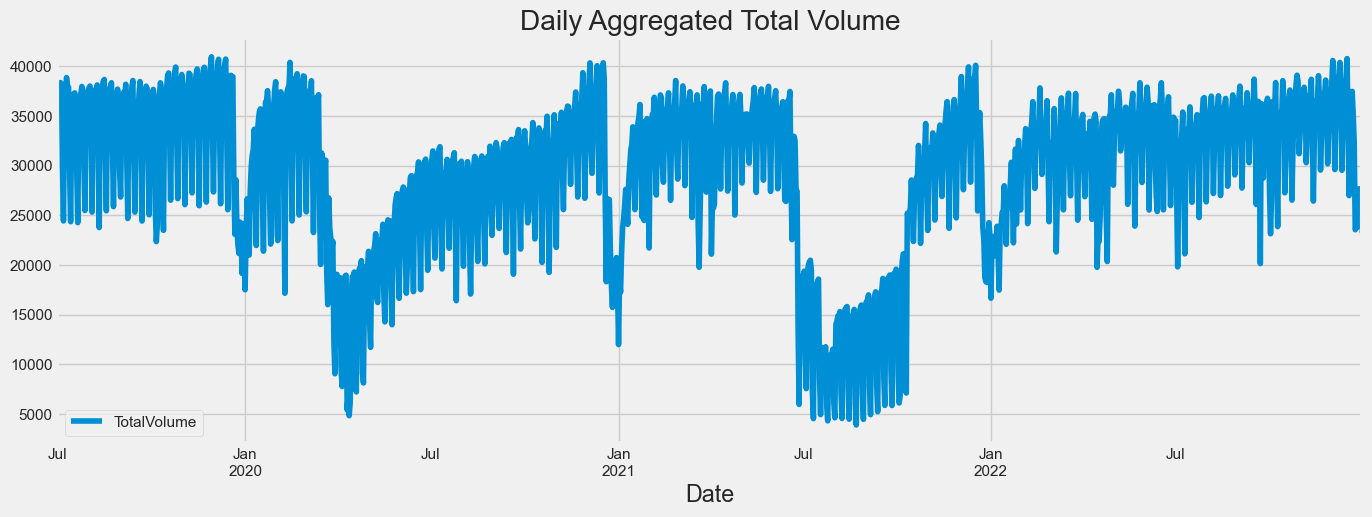

Wall time: 375 ms


In [134]:
%%time
#Plot daily aggregated traffic volume line graph for the given dataset
df_arima_charge_2.plot(figsize=(15,5), title='Daily Aggregated Total Volume')
plt.show()

Wall time: 68.8 ms


<AxesSubplot:xlabel='Date'>

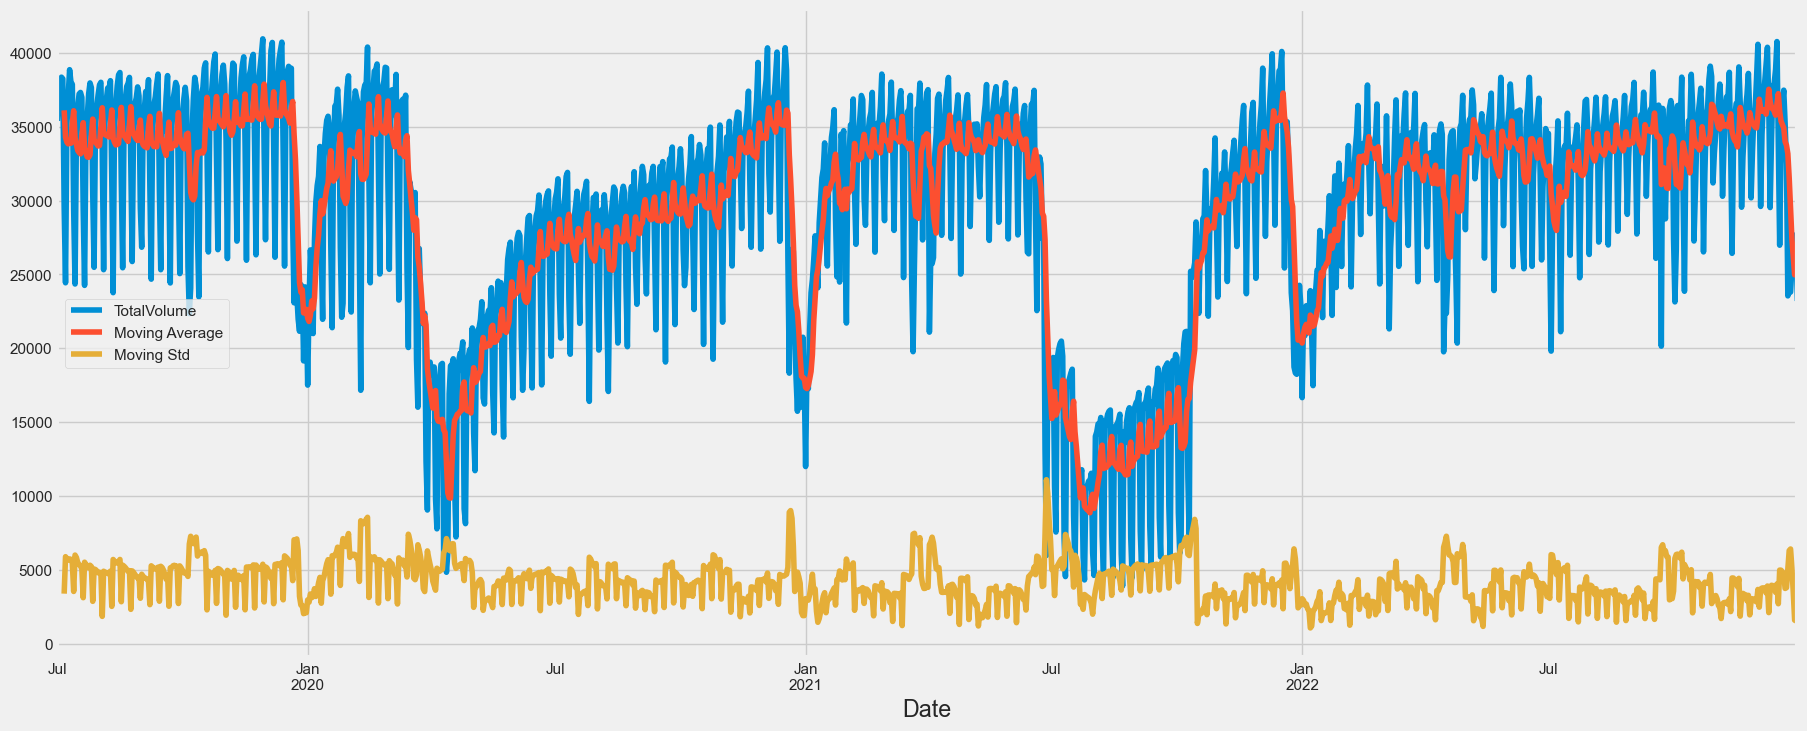

In [135]:
%%time
# Input Data Visualization, Moving average and Moving Standard Deviation
df_arima_charge_2['Moving Average'] = df_arima_charge_2['TotalVolume'].rolling(window=6).mean()
df_arima_charge_2['Moving Std'] = df_arima_charge_2['TotalVolume'].rolling(window=6).std()
df_arima_charge_2.plot.line(y=['TotalVolume','Moving Average','Moving Std'])

<font color='green'><center><h2><u>Cars: Stationarity Test: Augmented Dickey-Fuller Test</u></h2></center></font>

In [136]:
%%time
#Ho: It is not stationary
#H1: It is stationary
#This test is for hypothesis testing

def adfuller_test(volume):
    result = adfuller(volume)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    print("Critical values:")
    
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] <= 0.05:
        print("p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("p-value: Weak evidence against the null hypothesis, time series has a unit root, indicating it is not stationary")
    
    if result[0] < result[4]["5%"]:
        print("t-value: Reject Ho - Time Series is Stationary")
    else:
        print("t-value: Failed to Reject Ho - Time Series is Non-Stationary")

Wall time: 0 ns


In [137]:
%%time
adfuller_test(df_arima_charge_2['TotalVolume'])

ADF Test Statistic : -3.3339636037161178
p-value : 0.013426899909782792
#Lags Used : 21
Number of Observations Used : 1258
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 132 ms


<font color='green'><center><h2><u>Cars: Stationarity Test: Kwiatkowski–Phillips–Schmidt–Shin Test</u></h2></center></font>

In [138]:
%%time
stats, p, lags, critical_values = kpss(df_arima_charge_2['TotalVolume'], 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.38169207025696794
p-value : 0.01
#Lags Used : 19
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is not stationary
Wall time: 9.97 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Cars: Differencing to make data as stationary for future prediction</u></h2></center></font>

In [139]:
%%time
df_arima_charge_2['Volume First Difference'] = df_arima_charge_2['TotalVolume'] - df_arima_charge_2['TotalVolume'].shift(1)

Wall time: 998 µs


In [140]:
%%time
df_arima_charge_2.head(25)

Wall time: 0 ns


TotalVolume  Moving Average   Moving Std  Volume First Difference
Date                                                                         
2019-07-01        35400             NaN          NaN                      NaN
2019-07-02        37192             NaN          NaN                   1792.0
2019-07-03        37909             NaN          NaN                    717.0
2019-07-04        38361             NaN          NaN                    452.0
2019-07-05        38247             NaN          NaN                   -114.0
2019-07-06        29589    36116.333333  3378.407771                  -8658.0
2019-07-07        24434    34288.666667  5882.002743                  -5155.0
2019-07-08        35232    33962.000000  5741.255054                  10798.0
2019-07-09        37186    33841.500000  5648.686458                   1954.0
2019-07-10        38867    33925.833333  5732.807180                   1681.0
2019-07-11        38016    33887.333333  5698.657374                   -851.0
2019-07-12        37880    35269.166667  5447.612630                   -136.0
2019-07-13        29328    36084.833333  3529.508998                  -8552.0
2019-07-14        24352    34271.500000  5991.496566                  -4976.0
2019-07-15        34351    33799.000000  5825.163139                   9999.0
2019-07-16        36410    33389.500000  5473.375257                   2059.0
2019-07-17        37222    33257.166667  5347.292115                    812.0
2019-07-18        37326    33164.833333  5255.498622                    104.0
2019-07-19        36987    34441.333333  5063.838136                   -339.0
2019-07-20        29347    35273.833333  3105.206300                  -7640.0
2019-07-21        24258    33591.666667  5508.727355                  -5089.0
2019-07-22        34160    33216.666667  5352.880259                   9902.0
2019-07-23        35637    32952.500000  5150.985333                   1477.0
2019-07-24        37231    32936.666667  5134.974300                   1594.0
2019-07-25        37970    33100.500000  5302.980322                    739.0

In [141]:
%%time
#Again do adf test
adfuller_test( df_arima_charge_2['Volume First Difference'].dropna() )

ADF Test Statistic : -8.143511983617007
p-value : 1.0132193364681512e-12
#Lags Used : 20
Number of Observations Used : 1258
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
p-value: Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary
t-value: Reject Ho - Time Series is Stationary
Wall time: 147 ms


In [142]:
%%time
#Again do kpss test
stats, p, lags, critical_values = kpss(df_arima_charge_2['Volume First Difference'].dropna(), 'ct')
print(f'KPSS Test Statistic : {stats}')
print(f'p-value : {p}') 
print(f'#Lags Used : {lags}')
print(f'Critical values : {critical_values}')
if (p < 0.05):
    print("Data Series is not stationary")
else:
    print("Data Series is stationary")

KPSS Test Statistic : 0.0425020764070901
p-value : 0.1
#Lags Used : 94
Critical values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Data Series is stationary
Wall time: 2.96 ms


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


<font color='green'><center><h2><u>Cars: Visualize first order shifted dataset</u></h2></center></font>

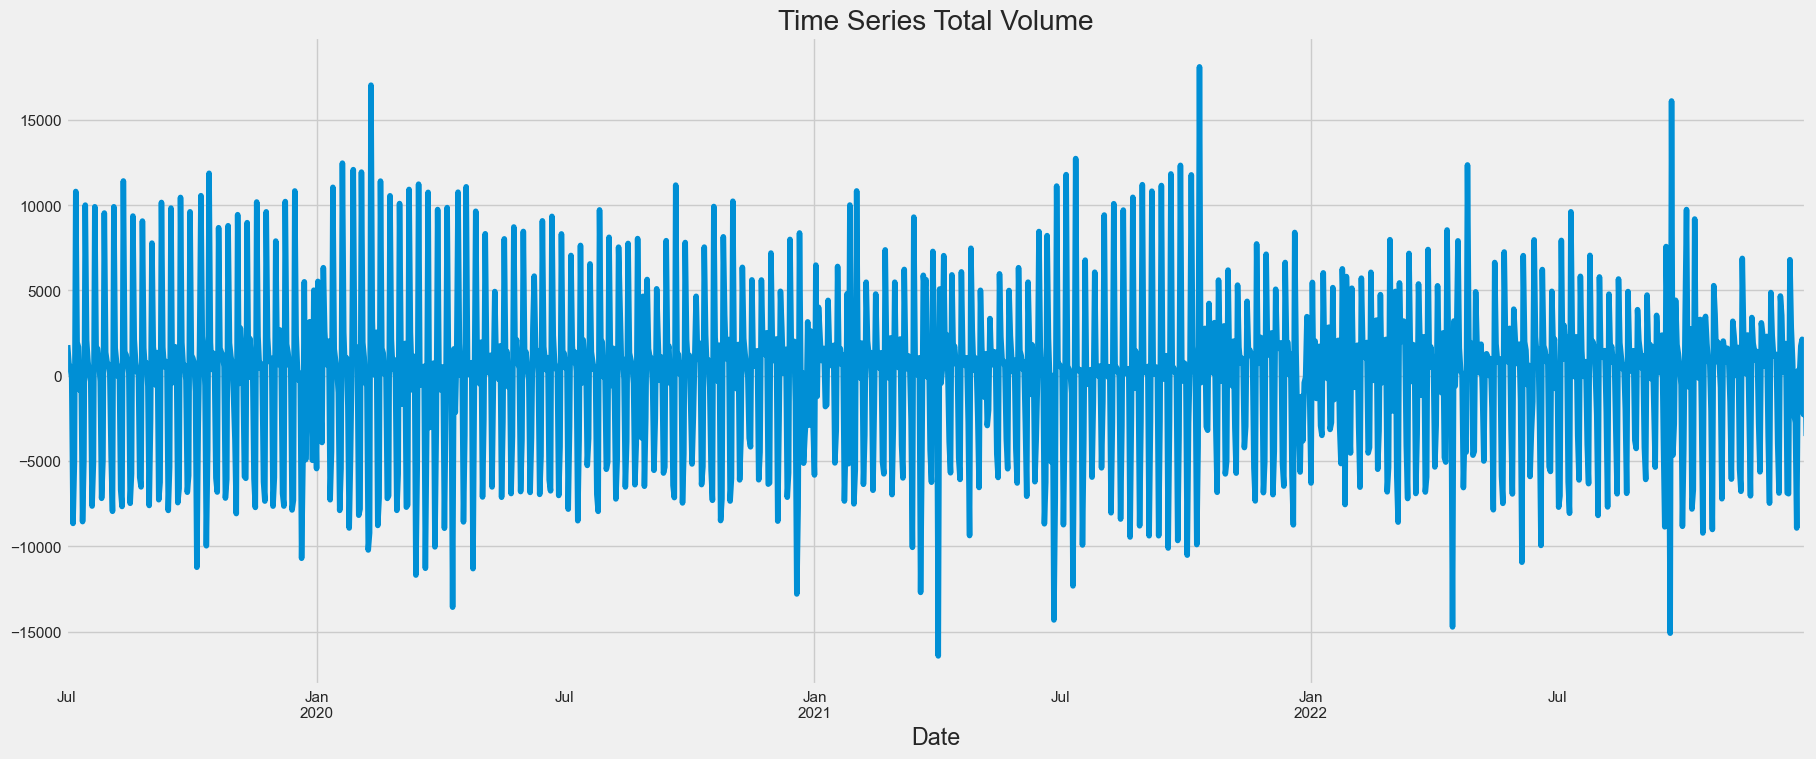

Wall time: 435 ms


In [143]:
%%time
df_arima_charge_2['Volume First Difference'].plot(figsize=(20,8), title="Time Series Total Volume")
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

Wall time: 219 ms


<AxesSubplot:xlabel='Date'>

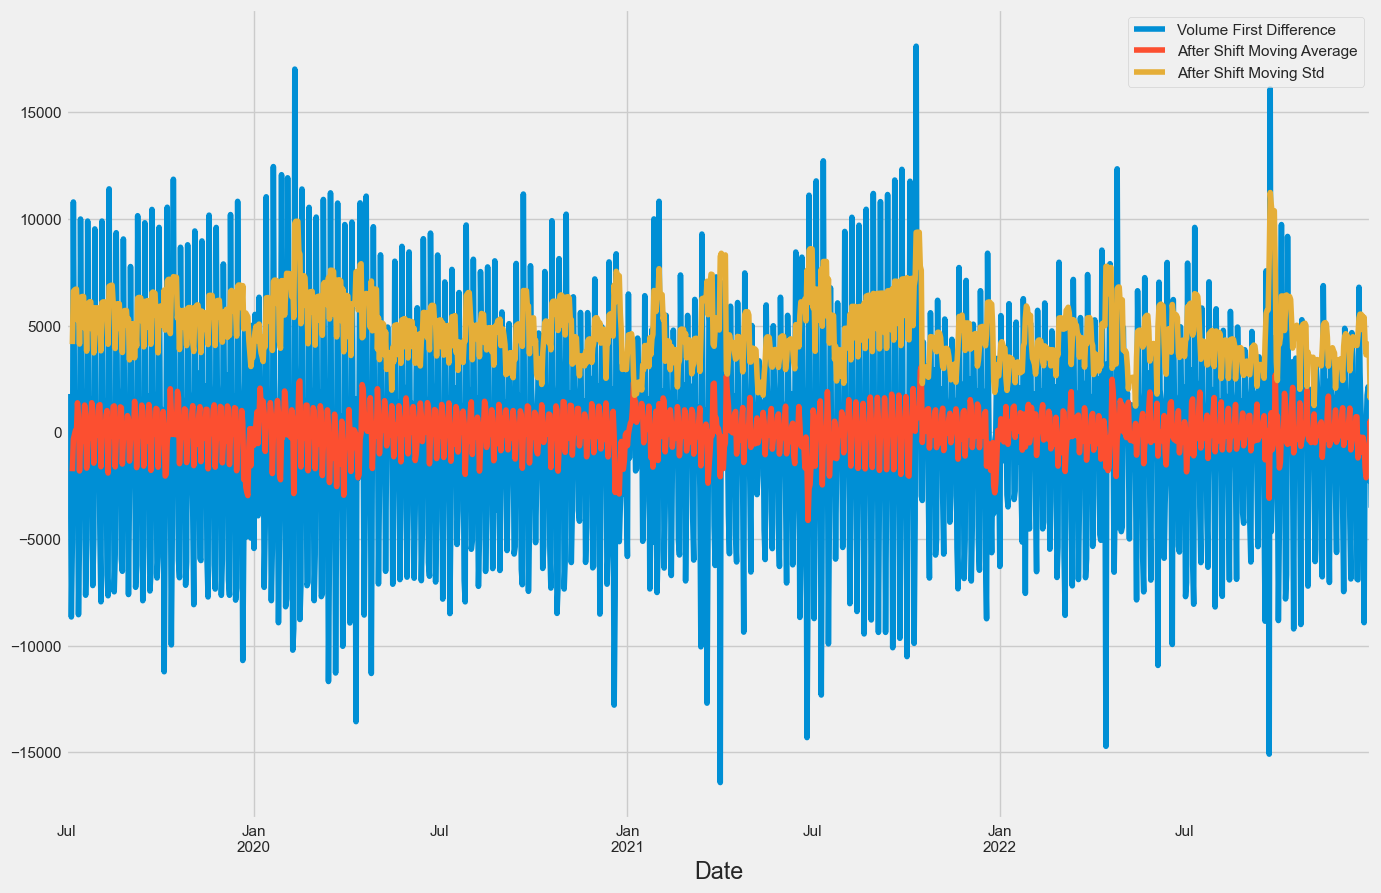

In [144]:
%%time
#Moving average and Moving standard deviation
df_arima_charge_2['After Shift Moving Average'] = df_arima_charge_2['Volume First Difference'].rolling(window=6).mean()
df_arima_charge_2['After Shift Moving Std'] = df_arima_charge_2['Volume First Difference'].rolling(window=6).std()
df_arima_charge_2.plot.line(y=['Volume First Difference','After Shift Moving Average','After Shift Moving Std'])

<font color='green'><center><h2><u>Cars: Plot Autocorrelation & Partial Autocorrelation</u></h2></center></font>

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Wall time: 49.9 ms


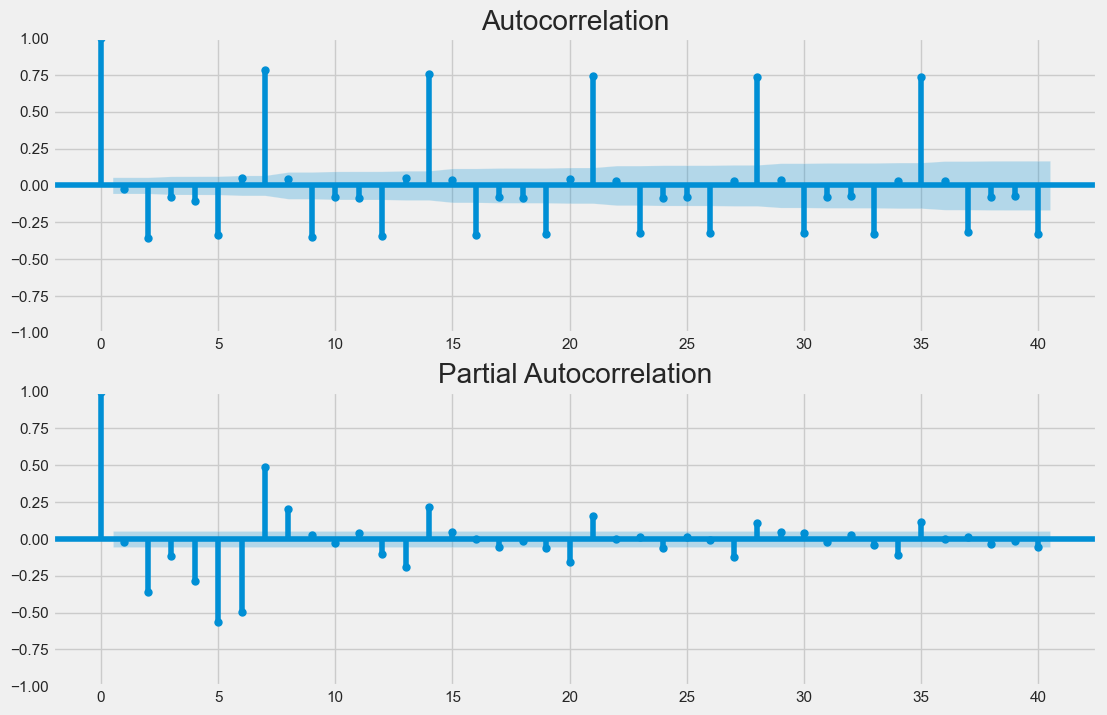

In [145]:
%%time
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_arima_charge_2['Volume First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_arima_charge_2['Volume First Difference'].iloc[2:],lags=40,ax=ax2)

<font color='green'><center><h2><u>Cars: Fit Model</u></h2></center></font>

In [146]:
%%time
model = sm.tsa.arima.ARIMA(df_arima_charge_2['TotalVolume'], order=(26,1,18))
results = model.fit()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

Wall time: 31.5 s


<font color='green'><center><h2><u>Cars: Forecast / Predict using ARIMA model</u></h2></center></font>

Wall time: 89.6 ms


<AxesSubplot:xlabel='Date'>

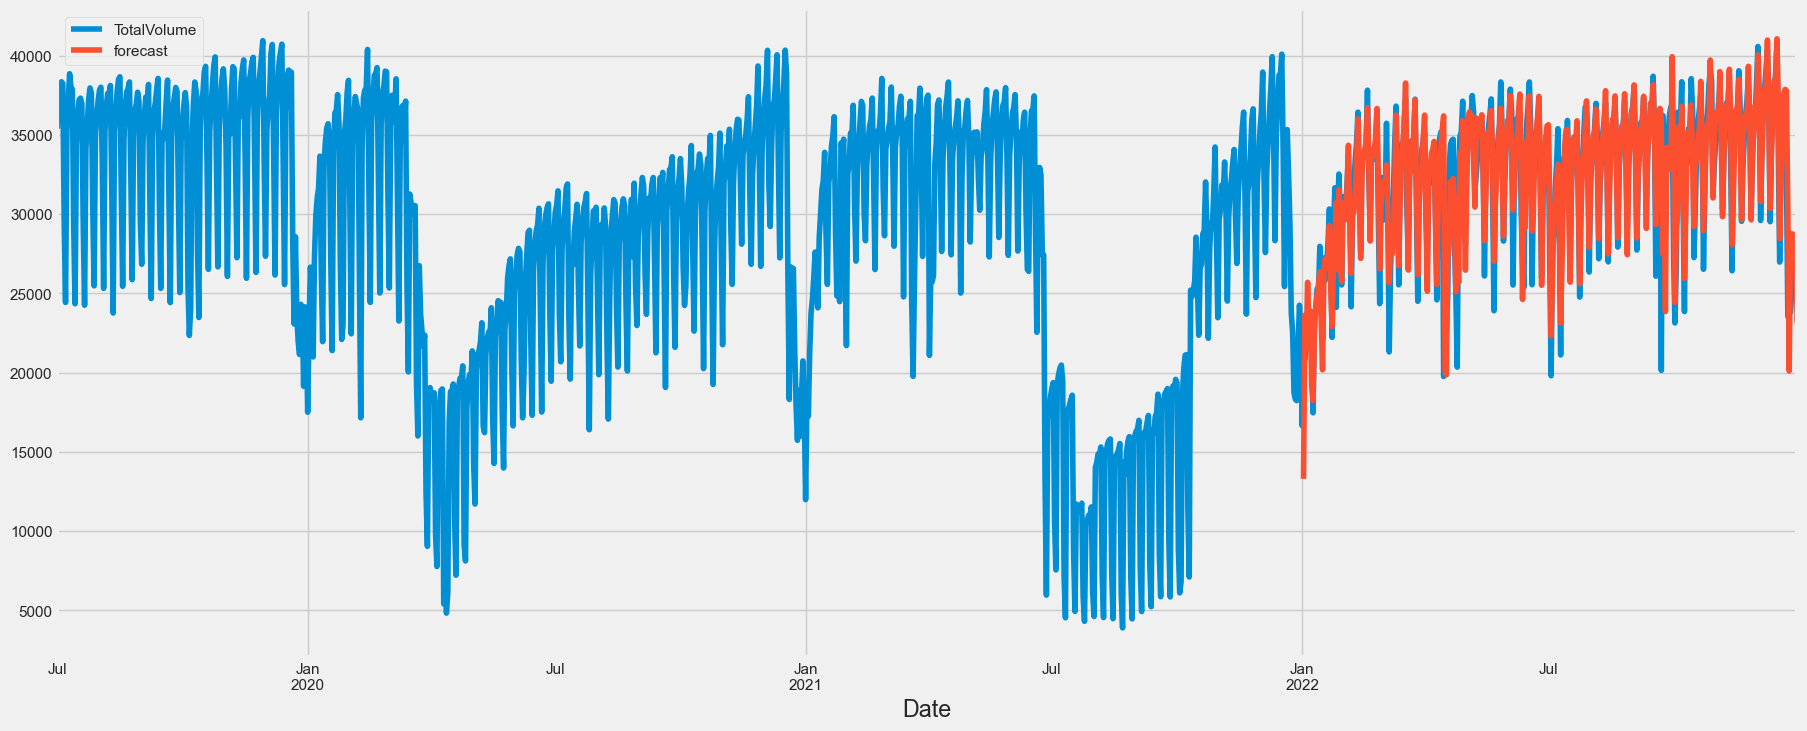

In [147]:
%%time
df_arima_charge_2['forecast'] = results.predict(start=916, end = 1280, dynamic= False)
df_arima_charge_2[['TotalVolume','forecast']].plot(figsize=(20,8))

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [148]:
%%time
ErrorValue = np.abs( df_arima_charge_2['TotalVolume'] - df_arima_charge_2['forecast'] )
print('Mean Abosolute Error Score of the predicted Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the predicted Dataset: 1433.77
Wall time: 997 µs


<font color='blue'><center><h2>Model 2: LSTM</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [106]:
%%time
#Import Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
from sklearn.metrics import mean_squared_error

Wall time: 3.63 s


<font color='green'><center><h2><u>Cars: Read Data & Data Pre-Processing</u></h2></center></font>

In [107]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as LCE
df_lstm_charge = df_inp_data_charge4.copy()
df_lstm_charge['Date'] = pd.to_datetime(df_lstm_charge['Date'])
df_lstm_charge_1 = df_lstm_charge[ (df_lstm_charge['TollPointID_x'] == "LCE") & 
                                        (df_lstm_charge['VehicleClass'] == "Car") ]

Wall time: 364 ms


In [108]:
%%time
#Group by TotalVolume & TotalCharges
df_lstm_charge_2 = df_lstm_charge_1.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_lstm_charge_2.to_csv('lstm_charge.csv')
df_lstm_charge_3 = pd.read_csv("C:/Users/USER/Documents/Toll/lstm_charge.csv")
df_lstm_charge_3

Wall time: 25.9 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Date  TotalVolume  TotalTollCharge
0     2019-07-01        35400        118590.00
1     2019-07-02        37192        124593.20
2     2019-07-03        37909        126995.15
3     2019-07-04        38361        128509.35
4     2019-07-05        38247        128127.45
...          ...          ...              ...
1275  2022-12-27        25545         94516.50
1276  2022-12-28        27680        102416.00
1277  2022-12-29        25401         93983.70
1278  2022-12-30        26738         98930.60
1279  2022-12-31        23201         85843.70

[1280 rows x 3 columns]

In [109]:
%%time
#Convert total volume & charge to float
cols = list(df_lstm_charge_3)[1:3]
df_lstm_charge_4 = df_lstm_charge_3[cols].astype(float)

#Display Total Volume & Charge as float
df_lstm_charge_4

Wall time: 968 µs


TotalVolume  TotalTollCharge
0         35400.0        118590.00
1         37192.0        124593.20
2         37909.0        126995.15
3         38361.0        128509.35
4         38247.0        128127.45
...           ...              ...
1275      25545.0         94516.50
1276      27680.0        102416.00
1277      25401.0         93983.70
1278      26738.0         98930.60
1279      23201.0         85843.70

[1280 rows x 2 columns]

<font color='green'><center><h2><u>Cars: Data Normalization</u></h2></center></font>

In [110]:
%%time
#Normalize the dataset
scaler = StandardScaler()
df_lstm_charge_4_scaled = scaler.fit_transform(df_lstm_charge_4)

Wall time: 4.02 ms


In [111]:
%%time
#Check the shape of scaled data
df_lstm_charge_4_scaled.shape

Wall time: 0 ns


(1280, 2)

In [112]:
%%time
#Display scaled data
df_lstm_charge_4_scaled

Wall time: 0 ns


array([[ 0.75119659,  0.5796566 ],
       [ 0.97914342,  0.79625999],
       [ 1.07034759,  0.88292551],
       ...,
       [-0.52070094, -0.30817121],
       [-0.35063123, -0.12968052],
       [-0.80054638, -0.60187316]])

<font color='green'><center><h2><u>Cars: Training & Testing Dataset</u></h2></center></font>

In [113]:
%%time
trainX = []
trainY = []
n_future = 1 #No of days to predict in future
n_past = 14 #No of past days want to predict future

Wall time: 0 ns


In [114]:
%%time
for i in range(n_past, len(df_lstm_charge_4_scaled) - n_future + 1):
    trainX.append(df_lstm_charge_4_scaled[i - n_past:i, 0:df_lstm_charge_4_scaled.shape[1]])
    trainY.append(df_lstm_charge_4_scaled[i + n_future - 1:i + n_future, 0])

Wall time: 1.99 ms


In [115]:
%%time
trainX, trainY = np.array(trainX), np.array(trainY)

Wall time: 2 ms


In [116]:
%%time
print('trainX:', format(trainX.shape))
print('trainY:', format(trainY.shape))

trainX: (1266, 14, 2)
trainY: (1266, 1)
Wall time: 0 ns


<font color='green'><center><h2><u>Cars: Model Creation</u></h2></center></font>

In [117]:
%%time
#Create model
model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation = 'relu', return_sequences=False))
model.add(Dense(trainY.shape[1]))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["mse"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17152     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________
Wall time: 341 ms


In [118]:
%%time
#fit the model
history = model.fit(trainX, trainY, batch_size=16, validation_split=0.1, verbose=2, epochs=10)

Epoch 1/10
72/72 - 3s - loss: 0.4692 - mse: 0.4692 - val_loss: 0.2755 - val_mse: 0.2755 - 3s/epoch - 44ms/step
Epoch 2/10
72/72 - 1s - loss: 0.3844 - mse: 0.3844 - val_loss: 0.2905 - val_mse: 0.2905 - 652ms/epoch - 9ms/step
Epoch 3/10
72/72 - 1s - loss: 0.3663 - mse: 0.3663 - val_loss: 0.2844 - val_mse: 0.2844 - 582ms/epoch - 8ms/step
Epoch 4/10
72/72 - 1s - loss: 0.3008 - mse: 0.3008 - val_loss: 0.2688 - val_mse: 0.2688 - 612ms/epoch - 9ms/step
Epoch 5/10
72/72 - 1s - loss: 0.2480 - mse: 0.2480 - val_loss: 0.2535 - val_mse: 0.2535 - 622ms/epoch - 9ms/step
Epoch 6/10
72/72 - 1s - loss: 0.2297 - mse: 0.2297 - val_loss: 0.2952 - val_mse: 0.2952 - 601ms/epoch - 8ms/step
Epoch 7/10
72/72 - 1s - loss: 0.2068 - mse: 0.2068 - val_loss: 0.1699 - val_mse: 0.1699 - 599ms/epoch - 8ms/step
Epoch 8/10
72/72 - 1s - loss: 0.1884 - mse: 0.1884 - val_loss: 0.2304 - val_mse: 0.2304 - 591ms/epoch - 8ms/step
Epoch 9/10
72/72 - 1s - loss: 0.1759 - mse: 0.1759 - val_loss: 0.2025 - val_mse: 0.2025 - 625ms/ep

Wall time: 12.5 ms


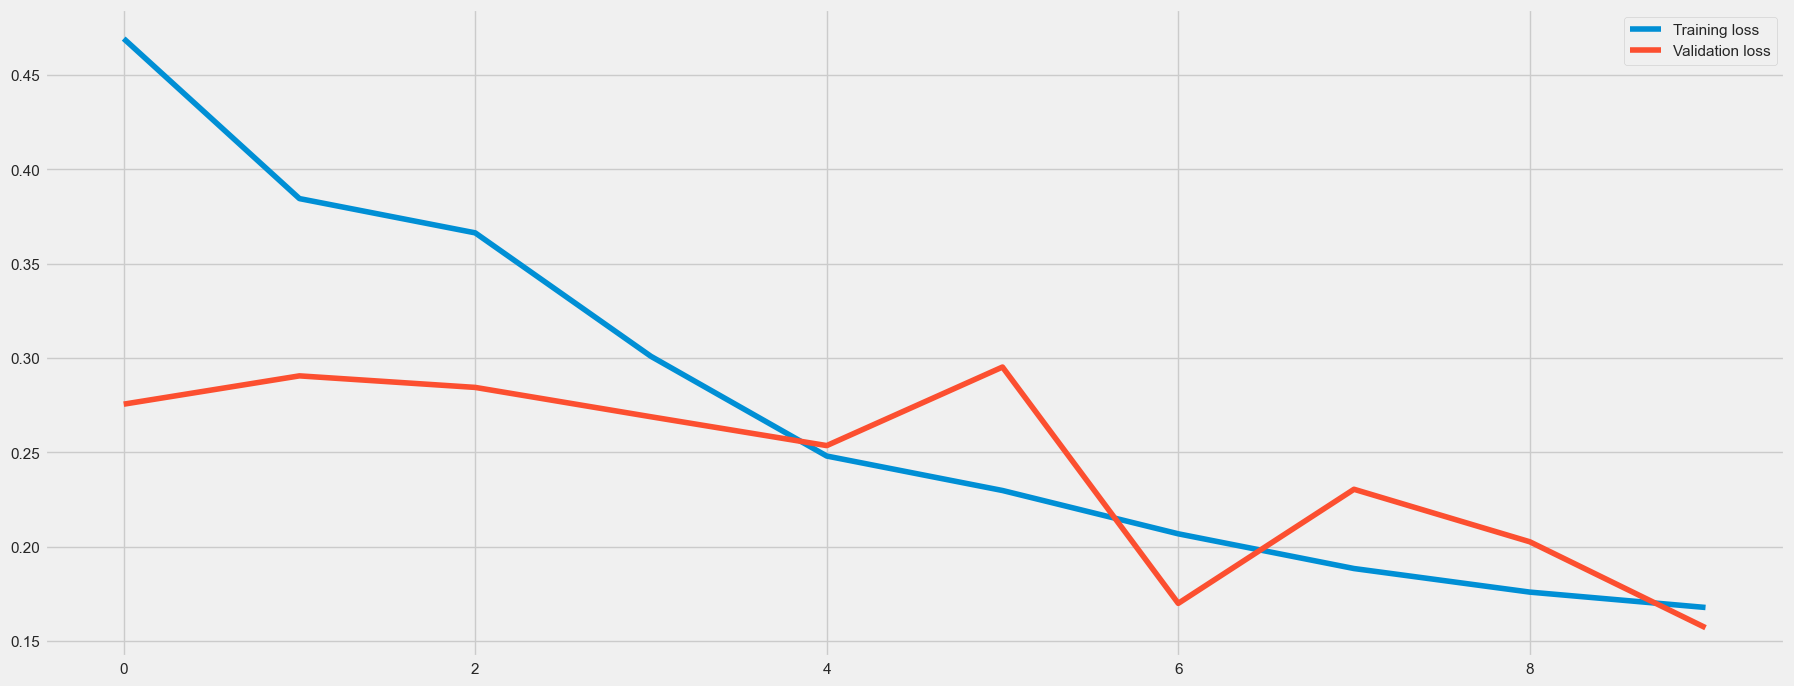

In [119]:
%%time
#Plot the model loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

<font color='green'><center><h2><u>Cars: Predict train & test dataset</u></h2></center></font>

In [120]:
%%time
n_past_days = 16
n_days_for_prediction = 15  #let us predict past 15 days

#Separate dates for future plotting
training_dates = pd.to_datetime(df_lstm_charge_3['Date'])
print(training_dates.tail(15)) #Check last few dates. 

predict_period_dates = pd.date_range(list(training_dates)[-n_past_days], periods=n_days_for_prediction, freq='1d').tolist()
print(predict_period_dates)

1265   2022-12-17
1266   2022-12-18
1267   2022-12-19
1268   2022-12-20
1269   2022-12-21
1270   2022-12-22
1271   2022-12-23
1272   2022-12-24
1273   2022-12-25
1274   2022-12-26
1275   2022-12-27
1276   2022-12-28
1277   2022-12-29
1278   2022-12-30
1279   2022-12-31
Name: Date, dtype: datetime64[ns]
[Timestamp('2022-12-16 00:00:00', freq='D'), Timestamp('2022-12-17 00:00:00', freq='D'), Timestamp('2022-12-18 00:00:00', freq='D'), Timestamp('2022-12-19 00:00:00', freq='D'), Timestamp('2022-12-20 00:00:00', freq='D'), Timestamp('2022-12-21 00:00:00', freq='D'), Timestamp('2022-12-22 00:00:00', freq='D'), Timestamp('2022-12-23 00:00:00', freq='D'), Timestamp('2022-12-24 00:00:00', freq='D'), Timestamp('2022-12-25 00:00:00', freq='D'), Timestamp('2022-12-26 00:00:00', freq='D'), Timestamp('2022-12-27 00:00:00', freq='D'), Timestamp('2022-12-28 00:00:00', freq='D'), Timestamp('2022-12-29 00:00:00', freq='D'), Timestamp('2022-12-30 00:00:00', freq='D')]
Wall time: 3.98 ms


In [121]:
%%time
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

1/1 [==============================] - 0s 283ms/step
Wall time: 330 ms


In [122]:
%%time
prediction_copies = np.repeat(prediction, df_lstm_charge_4.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

Wall time: 1.03 ms


In [123]:
%%time
#Predicted values
y_pred_future

Wall time: 0 ns


array([36169.082, 31767.785, 31795.635, 35578.547, 37712.38 , 39016.176,
       37595.035, 34359.21 , 29111.38 , 28999.42 , 26883.016, 27208.875,
       28459.889, 26142.139, 27473.955], dtype=float32)

In [124]:
%%time
# Convert predicted date timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

Wall time: 0 ns


In [125]:
%%time
#Predicted date and total volume
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'TotalVolume':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

Wall time: 1.99 ms


In [126]:
%%time
#Original data
original = df_lstm_charge_3[['Date', 'TotalVolume']]
original['Date']=pd.to_datetime(original['Date'])
original_filtered = original.loc[ (original['Date'] <= '2022-12-16') ]

Wall time: 2.99 ms


<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 93.8 ms


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='TotalVolume'>

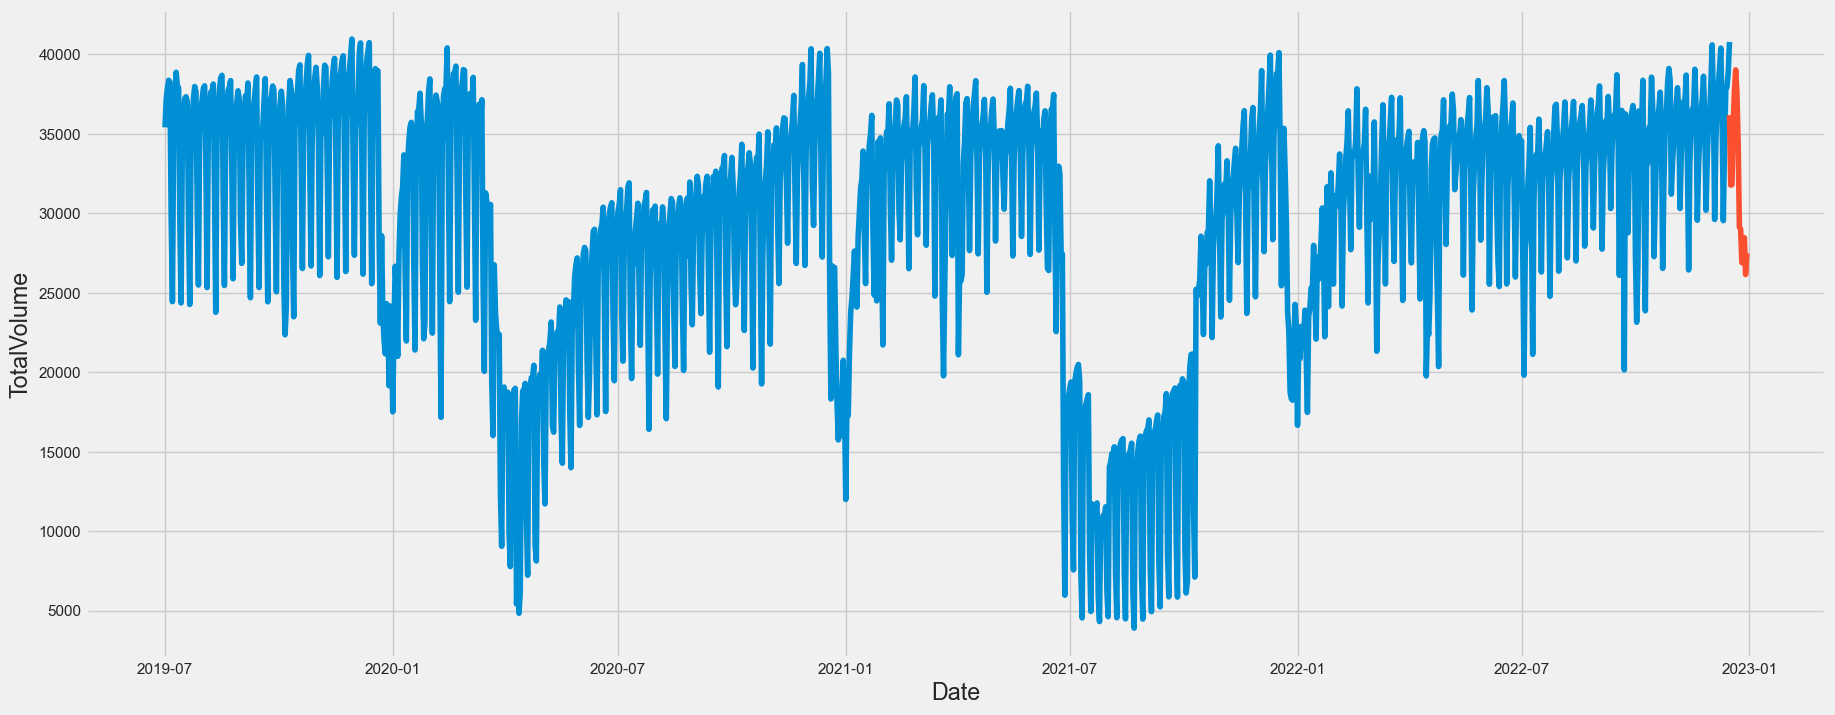

In [127]:
%%time
#Plot Original and Forcasted total volume
sns.lineplot(original_filtered['Date'], original_filtered['TotalVolume'])
sns.lineplot(df_forecast['Date'], df_forecast['TotalVolume'])

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [128]:
%%time
original_subset = original.loc[ (original['Date'] >= '2022-12-16') & (original['Date'] <= '2022-12-31') ]

Wall time: 2 ms


In [129]:
%%time
merged = pd.merge(original_subset, df_forecast, on="Date", how="left")
merged

Wall time: 2.99 ms


Date  TotalVolume_x  TotalVolume_y
0  2022-12-16          40772   36169.082031
1  2022-12-17          33897   31767.785156
2  2022-12-18          26979   31795.634766
3  2022-12-19          33779   35578.546875
4  2022-12-20          36586   37712.378906
5  2022-12-21          37479   39016.175781
6  2022-12-22          35223   37595.035156
7  2022-12-23          32472   34359.210938
8  2022-12-24          23546   29111.380859
9  2022-12-25          23850   28999.419922
10 2022-12-26          23805   26883.015625
11 2022-12-27          25545   27208.875000
12 2022-12-28          27680   28459.888672
13 2022-12-29          25401   26142.138672
14 2022-12-30          26738   27473.955078
15 2022-12-31          23201            NaN

In [130]:
%%time
ErrorValue = np.abs( merged['TotalVolume_x'] - merged['TotalVolume_y']  )
print('Mean Abosolute Error Score of the Forcasted Dataset:', round(ErrorValue.mean(),2) )

Mean Abosolute Error Score of the Forcasted Dataset: 2532.32
Wall time: 0 ns


<font color='blue'><center><h2>Model 3: XGBoostRegressor</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [73]:
%%time
#Importing Libraries Required
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
colour_palette = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import TimeSeriesSplit

Wall time: 0 ns


<font color='green'><center><h2><u>Read Data & Data Pre-Processing</u></h2></center></font>

In [74]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as LCE
df_xgboost_charge = df_inp_data_charge4.copy()
df_xgboost_charge['Date'] = pd.to_datetime(df_xgboost_charge['Date'])
df_xgboost_charge_1_Car = df_xgboost_charge[ (df_xgboost_charge['TollPointID_x'] == "LCE") & 
                                        (df_xgboost_charge['VehicleClass'] == "Car") ]
df_xgboost_charge_1_Truck = df_xgboost_charge[ (df_xgboost_charge['TollPointID_x'] == "LCE") &
                                       (df_xgboost_charge['VehicleClass'] == "Truck") ]

Wall time: 443 ms


In [75]:
%%time
#Group by TotalVolume & TotalCharges
df_xgboost_charge_2_Car = df_xgboost_charge_1_Car.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_xgboost_charge_2_Car

Wall time: 9.97 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume  TotalTollCharge
Date                                    
2019-07-01        35400        118590.00
2019-07-02        37192        124593.20
2019-07-03        37909        126995.15
2019-07-04        38361        128509.35
2019-07-05        38247        128127.45
...                 ...              ...
2022-12-27        25545         94516.50
2022-12-28        27680        102416.00
2022-12-29        25401         93983.70
2022-12-30        26738         98930.60
2022-12-31        23201         85843.70

[1280 rows x 2 columns]

In [76]:
%%time
#Group by TotalVolume & TotalCharges
df_xgboost_charge_2_Truck = df_xgboost_charge_1_Truck.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_xgboost_charge_2_Truck

Wall time: 10 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume  TotalTollCharge
Date                                    
2019-07-01         2291         24467.88
2019-07-02         2297         24531.96
2019-07-03         2385         25471.80
2019-07-04         2210         23602.80
2019-07-05         2240         23923.20
...                 ...              ...
2022-12-27          364          4550.00
2022-12-28         1238         15475.00
2022-12-29         1275         15937.50
2022-12-30         1170         14625.00
2022-12-31          442          5525.00

[1280 rows x 2 columns]

<font color='green'><center><h2><u>Input Data Visualization</u></h2></center></font>

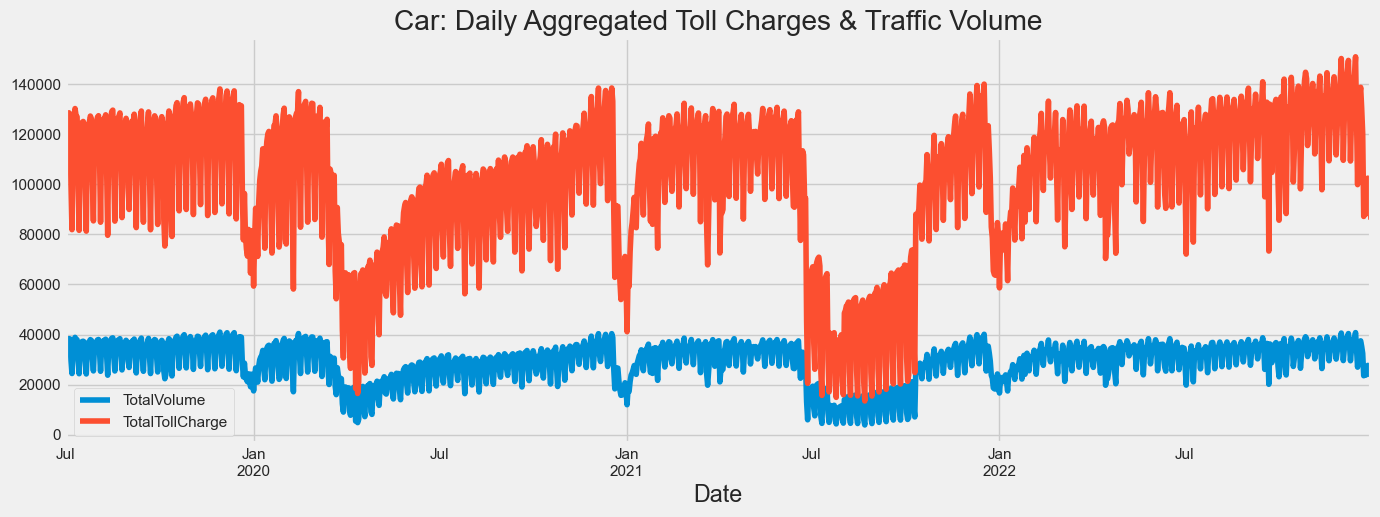

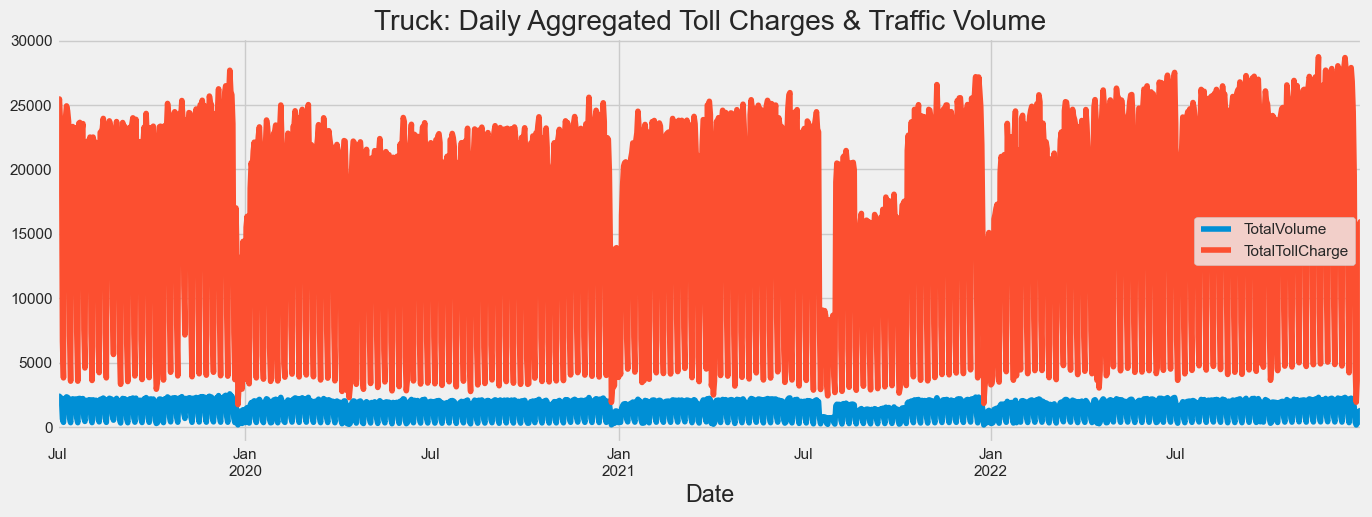

Wall time: 804 ms


In [77]:
%%time
#Plot daily aggregated toll charges and traffic volume line graph for the given dataset
df_xgboost_charge_2_Car.plot(figsize=(15,5), title='Car: Daily Aggregated Toll Charges & Traffic Volume')
plt.show()

df_xgboost_charge_2_Truck.plot(figsize=(15,5), title='Truck: Daily Aggregated Toll Charges & Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Create required features</u></h2></center></font>

In [78]:
%%time
#Below is the feature creation created as a function
def xgb_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [79]:
%%time
#Car: Diplay features
df_xgboost_charge_3_Car = xgb_feature_creation(df_xgboost_charge_2_Car)
df_xgboost_charge_3_Car

Wall time: 4.02 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
Date                                                                       
2019-07-01        35400        118590.00     0                0        3   
2019-07-02        37192        124593.20     0                1        3   
2019-07-03        37909        126995.15     0                2        3   
2019-07-04        38361        128509.35     0                3        3   
2019-07-05        38247        128127.45     0                4        3   
...                 ...              ...   ...              ...      ...   
2022-12-27        25545         94516.50     0                1        4   
2022-12-28        27680        102416.00     0                2        4   
2022-12-29        25401         93983.70     0                3        4   
2022-12-30        26738         98930.60     0                4        4   
2022-12-31        23201         85843.70     0                5        4   

            Month  Year  Day of the year  
Date                                      
2019-07-01      7  2019              182  
2019-07-02      7  2019              183  
2019-07-03      7  2019              184  
2019-07-04      7  2019              185  
2019-07-05      7  2019              186  
...           ...   ...              ...  
2022-12-27     12  2022              361  
2022-12-28     12  2022              362  
2022-12-29     12  2022              363  
2022-12-30     12  2022              364  
2022-12-31     12  2022              365  

[1280 rows x 8 columns]

In [80]:
%%time
#Truck Diplay features
df_xgboost_charge_3_Truck = xgb_feature_creation(df_xgboost_charge_2_Truck)
df_xgboost_charge_3_Truck

Wall time: 3.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
Date                                                                       
2019-07-01         2291         24467.88     0                0        3   
2019-07-02         2297         24531.96     0                1        3   
2019-07-03         2385         25471.80     0                2        3   
2019-07-04         2210         23602.80     0                3        3   
2019-07-05         2240         23923.20     0                4        3   
...                 ...              ...   ...              ...      ...   
2022-12-27          364          4550.00     0                1        4   
2022-12-28         1238         15475.00     0                2        4   
2022-12-29         1275         15937.50     0                3        4   
2022-12-30         1170         14625.00     0                4        4   
2022-12-31          442          5525.00     0                5        4   

            Month  Year  Day of the year  
Date                                      
2019-07-01      7  2019              182  
2019-07-02      7  2019              183  
2019-07-03      7  2019              184  
2019-07-04      7  2019              185  
2019-07-05      7  2019              186  
...           ...   ...              ...  
2022-12-27     12  2022              361  
2022-12-28     12  2022              362  
2022-12-29     12  2022              363  
2022-12-30     12  2022              364  
2022-12-31     12  2022              365  

[1280 rows x 8 columns]

Wall time: 58.8 ms


Text(0.5, 1.0, 'Car: Daily Aggregated Total Volume')

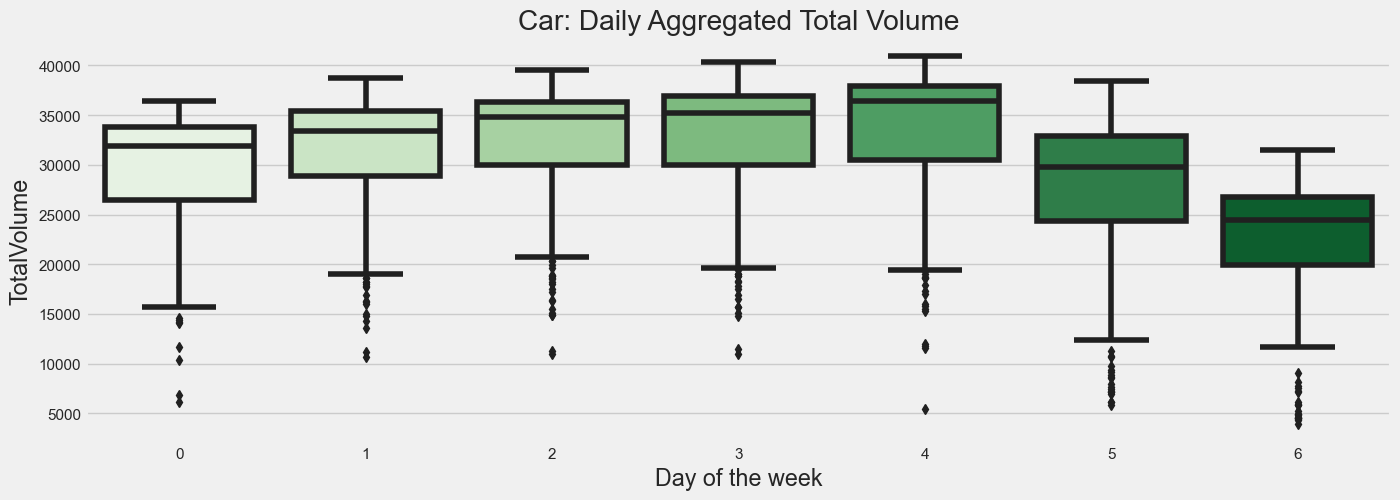

In [81]:
%%time
# Visualize hourly feature to target relationship
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df_xgboost_charge_3_Car, x='Day of the week', y='TotalVolume', palette='Greens')
ax.set_title('Car: Daily Aggregated Total Volume')

Wall time: 58.8 ms


Text(0.5, 1.0, 'Truck: Daily Aggregated Total Volume')

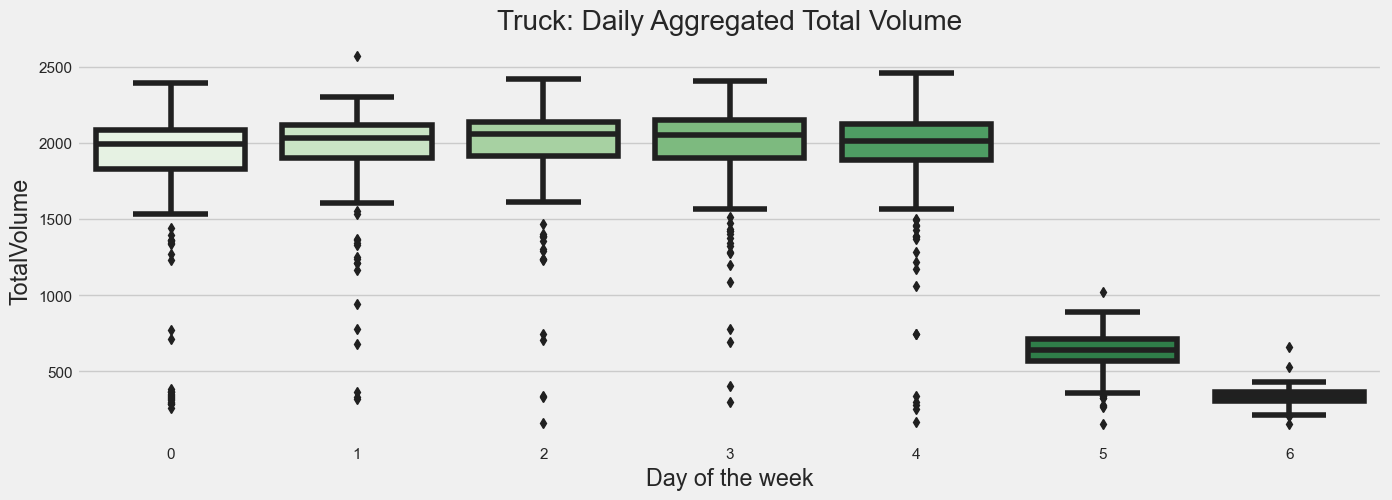

In [82]:
%%time
# Visualize hourly feature to target relationship
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df_xgboost_charge_3_Truck, x='Day of the week', y='TotalVolume', palette='Greens')
ax.set_title('Truck: Daily Aggregated Total Volume')

<h2>Summary from Day of the week feature to target relationship:
<h3>
Monday,Tuesday, Wednesday, Thursday and Friday of the week shows more traffic volume than the other days of the week.

Wall time: 94.8 ms


Text(0.5, 1.0, 'Car: Monthly Aggregated Total Volume')

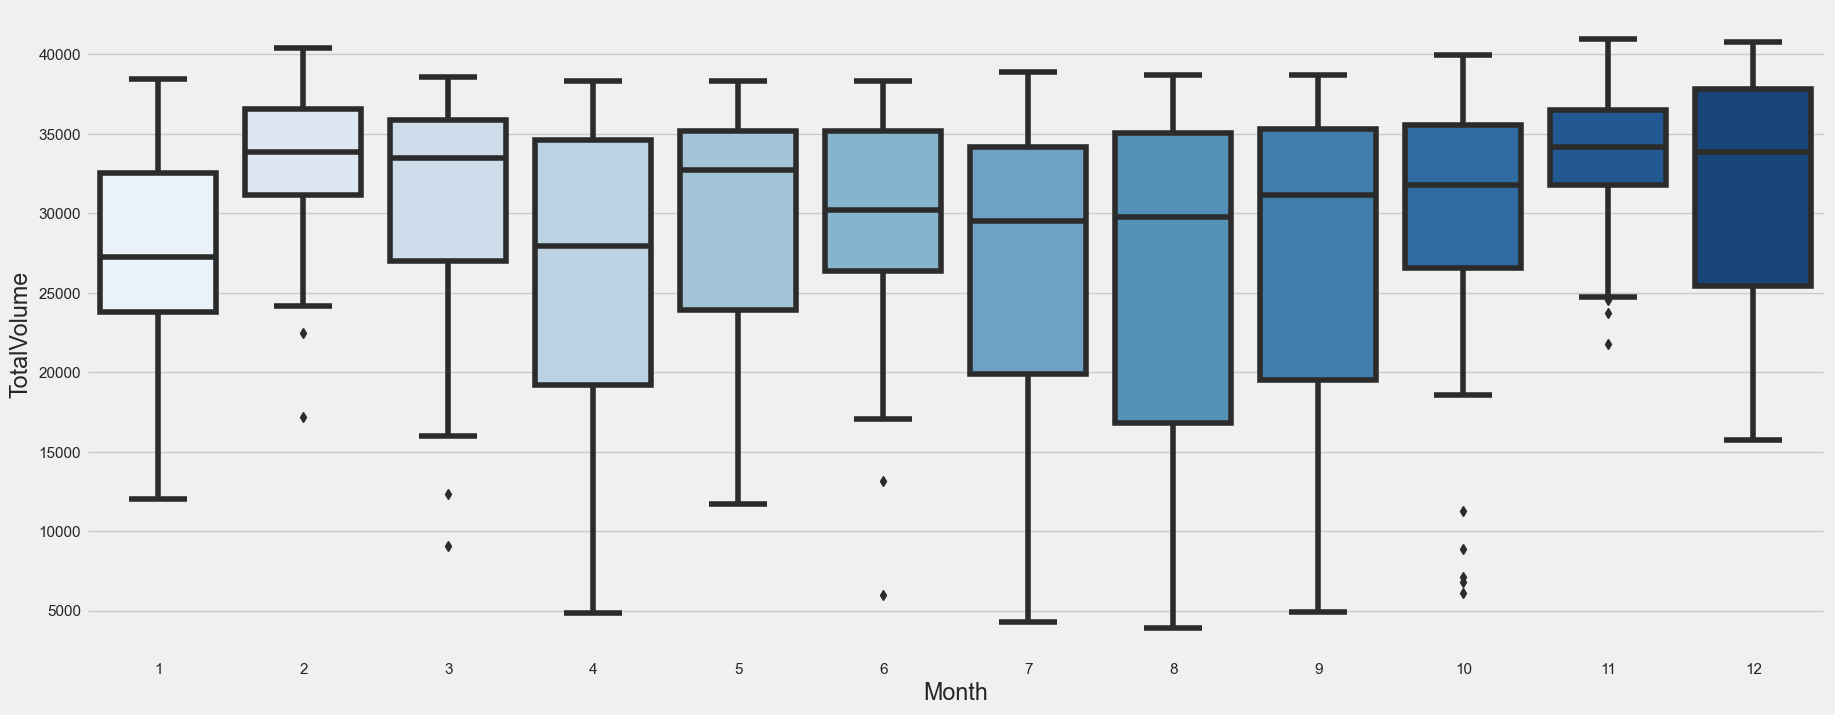

In [83]:
%%time
# Visualize monthly feature to target relationship
sns.boxplot(data=df_xgboost_charge_3_Car, x='Month', y='TotalVolume', palette='Blues')
ax.set_title('Car: Monthly Aggregated Total Volume')

Wall time: 179 ms


Text(0.5, 1.0, 'Truck: Monthly Aggregated Total Volume')

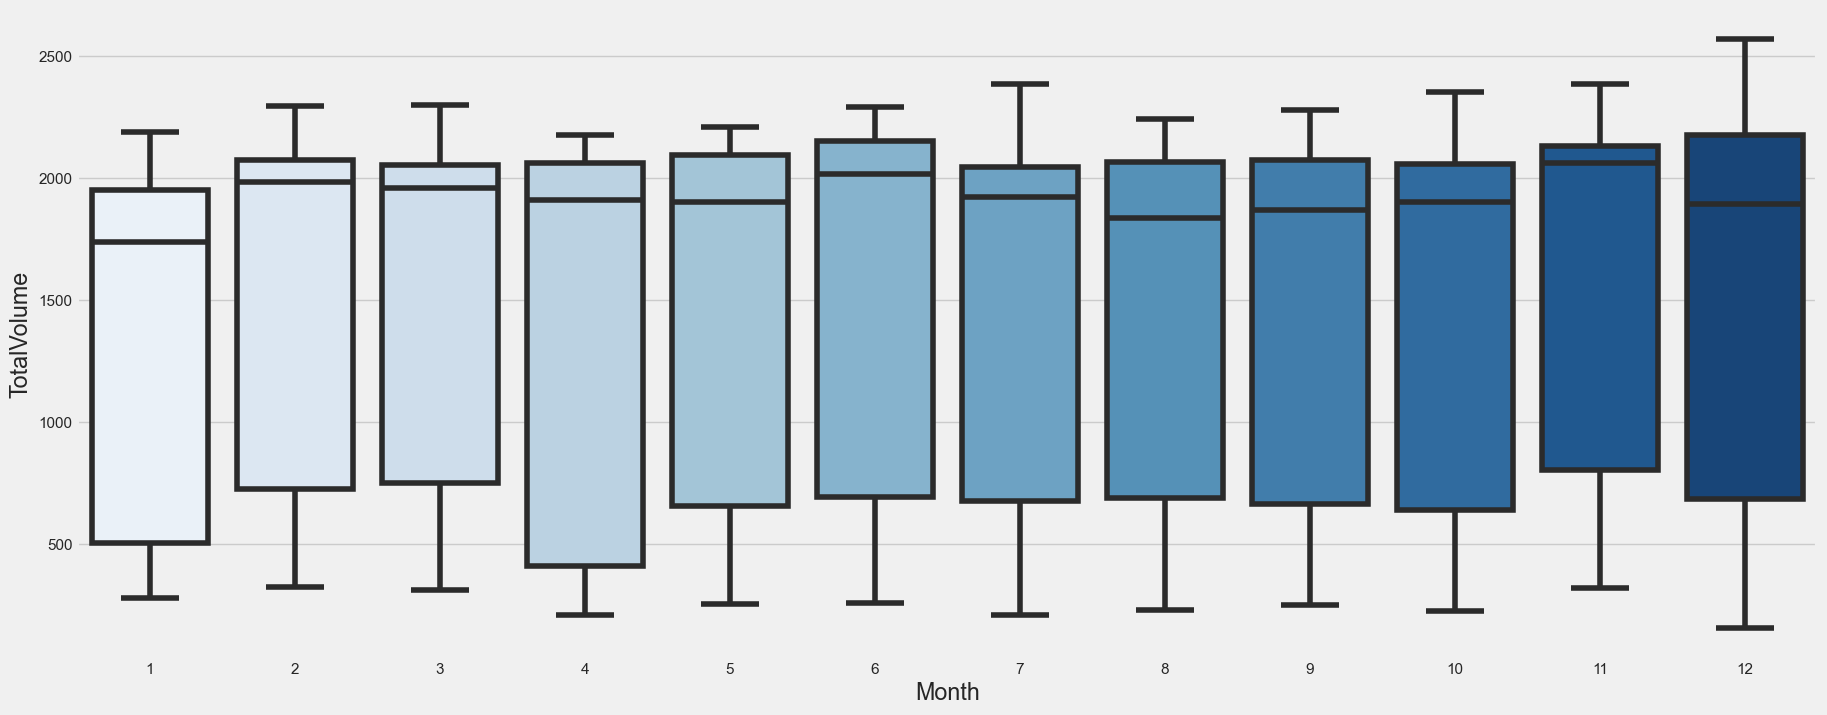

In [84]:
%%time
# Visualize monthly feature to target relationship
sns.boxplot(data=df_xgboost_charge_3_Truck, x='Month', y='TotalVolume', palette='Blues')
ax.set_title('Truck: Monthly Aggregated Total Volume')

<font color='green'><center><h2><u>Cars: Training & Testing Dataset</u></h2></center></font>

In [85]:
%%time
#Split train and test dataset for as a time series
training_df = df_xgboost_charge_3_Car.loc[df_xgboost_charge_3_Car.index < '01-01-2022']
testing_df = df_xgboost_charge_3_Car.loc[df_xgboost_charge_3_Car.index >= '01-01-2022']

Wall time: 0 ns


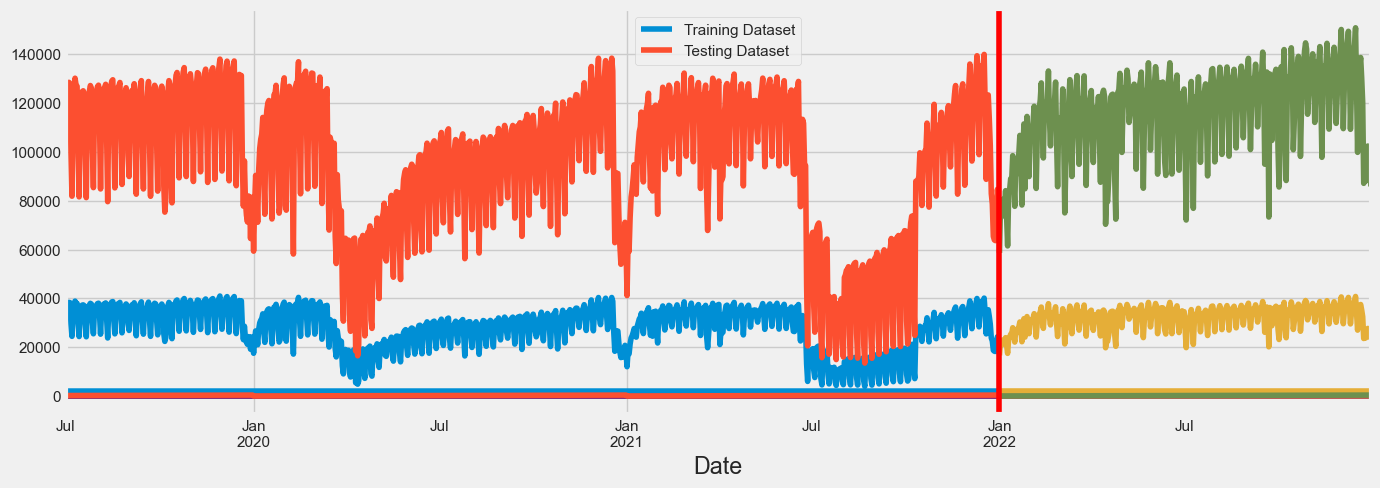

Wall time: 569 ms


In [86]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2022', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Cars: Add features to dataset</u></h2></center></font>

In [87]:
%%time
#Adding features to train and test dataset
training_df = xgb_feature_creation(training_df)
testing_df = xgb_feature_creation(testing_df)
XGB_COLUMN_FEATURES = ['TotalTollCharge','Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
XGB_COLUMN_TARGET = ['TotalVolume']

Wall time: 4.02 ms


<font color='green'><center><h2><u>Cars: Define feature & target columns for train & test dataset</u></h2></center></font>

In [88]:
%%time
X_train = training_df[XGB_COLUMN_FEATURES]
y_train = training_df[XGB_COLUMN_TARGET]

X_test = testing_df[XGB_COLUMN_FEATURES]
y_test = testing_df[XGB_COLUMN_TARGET]

Wall time: 3.99 ms


<font color='green'><center><h2><u>Cars: Model Creation</u></h2></center></font>

In [89]:
%%time
#Create the model
#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

[15:41:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:29351.75474	validation_1-rmse:32284.84317
[100]	validation_0-rmse:10841.54159	validation_1-rmse:11023.54610
[200]	validation_0-rmse:4018.54292	validation_1-rmse:3106.74832
[300]	validation_0-rmse:1506.75125	validation_1-rmse:724.21573
[361]	validation_0-rmse:839.08142	validation_1-rmse:898.63527
Wall time: 262 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

<font color='green'><center><h2><u>Cars: Visualize Feature Importance</u></h2></center></font>

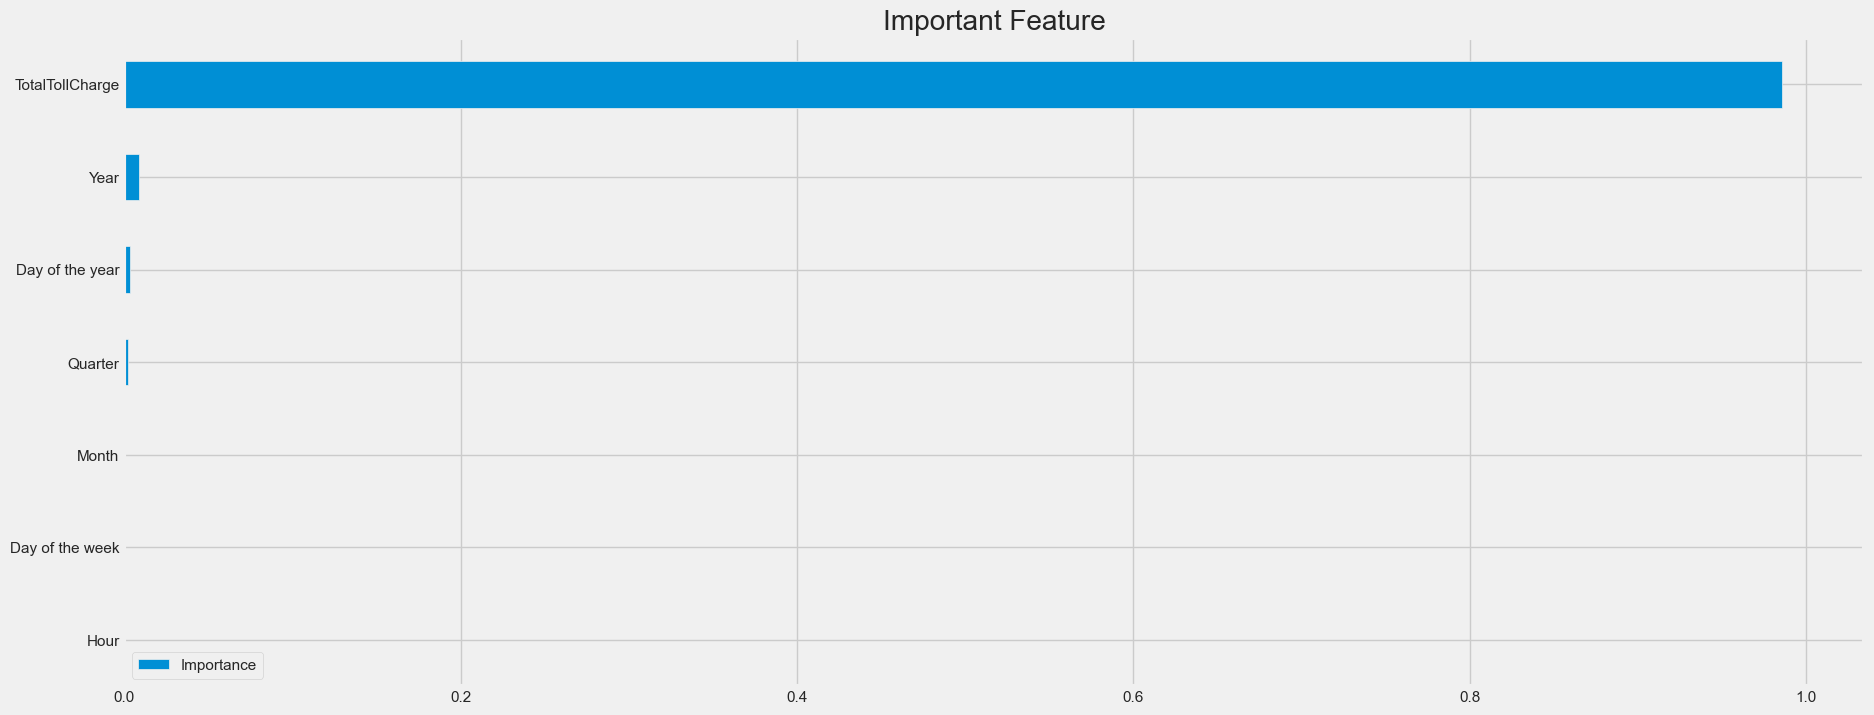

Wall time: 211 ms


In [90]:
%%time
fImportance = pd.DataFrame(data=regressor.feature_importances_,
                 index=regressor.feature_names_in_,
                 columns=['Importance'])
fImportance.sort_values('Importance').plot(kind='barh', title='Important Feature')
plt.show()

<font color='green'><center><h2><u>Cars: Predict test dataset</u></h2></center></font>

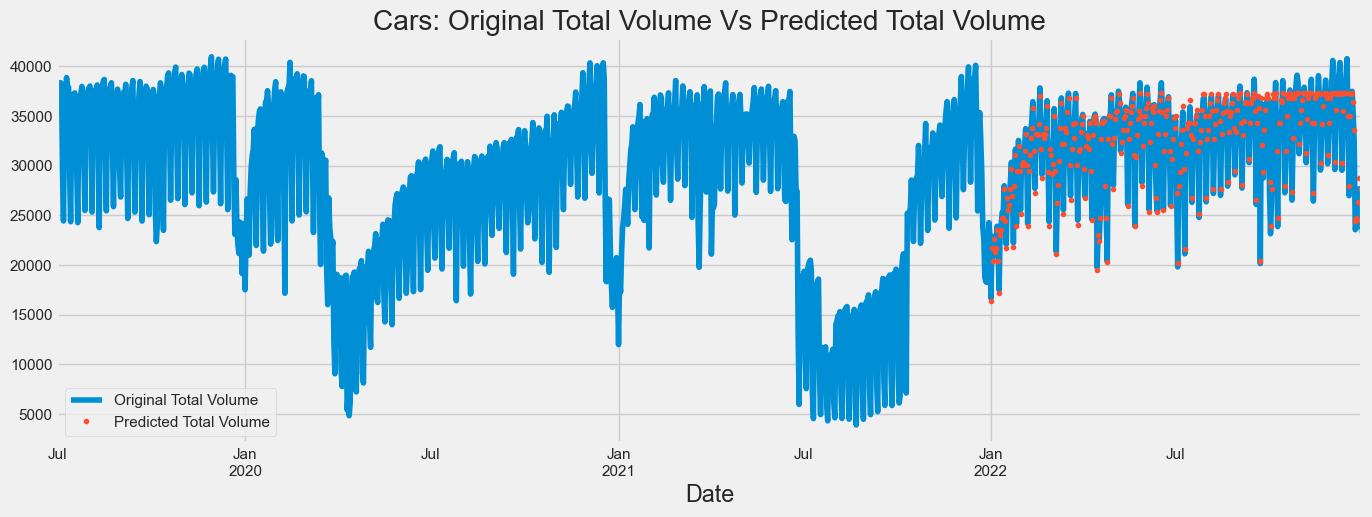

Wall time: 402 ms


In [91]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedTotalVolume'] = regressor.predict(X_test)
df_xgboost_charge_3_Car = df_xgboost_charge_3_Car.merge(testing_df['PredictedTotalVolume'], how='left', left_index = True, right_index = True)
ax = df_xgboost_charge_3_Car['TotalVolume'].plot(figsize=(15,5))
df_xgboost_charge_3_Car['PredictedTotalVolume'].plot(ax=ax, style='.')
plt.legend(['Original Total Volume', 'Predicted Total Volume'])
ax.set_title('Cars: Original Total Volume Vs Predicted Total Volume')
plt.show()

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [92]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedTotalVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 569.7
Wall time: 967 µs


<font color='green'><center><h2><u>Cars: Future Toll Revenue Prediction</u></h2></center></font>

<font color='green'><center><h2><u>Cars: Create required features</u></h2></center></font>

In [93]:
%%time
#Below is the feature creation created as a function
def xgb_feature_creation_2(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    df['Day of the month'] = df.index.day
    df['Week of the year'] = df.index.isocalendar().week
    return df

Wall time: 0 ns


<font color='green'><center><h2><u>Cars: Create required lag features</u></h2></center></font>

In [94]:
%%time
#Creating Lag features like for same day last year etc.
def xgb_include_lags(df):    
    target_dict_map = df['TotalVolume'].to_dict()
    df['lag 1 year'] = (df.index - pd.Timedelta('364 days')).map(target_dict_map)
    df['lag 2 year'] = (df.index - pd.Timedelta('728 days')).map(target_dict_map)
    df['lag 3 year'] = (df.index - pd.Timedelta('1092 days')).map(target_dict_map)
    return(df)

Wall time: 0 ns


In [95]:
%%time
#Train all of the data before doing future prediction
df_xgboost_charge_3_Car = xgb_feature_creation_2(df_xgboost_charge_3_Car)
df_xgboost_charge_3_Car = xgb_include_lags(df_xgboost_charge_3_Car)

XGB_FEATURES = ['TotalTollCharge', 'Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month', 'lag 1 year','lag 2 year','lag 3 year']
XGB_TARGET = ['TotalVolume']

X_all = df_xgboost_charge_3_Car[XGB_FEATURES]
y_all = df_xgboost_charge_3_Car[XGB_TARGET]

#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[15:42:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:30220.45148
[100]	validation_0-rmse:11154.34711
[200]	validation_0-rmse:4146.05674
[300]	validation_0-rmse:1568.52502
[400]	validation_0-rmse:631.10636
[500]	validation_0-rmse:309.28942
[600]	validation_0-rmse:206.11130
[700]	validation_0-rmse:168.71798
[800]	validation_0-rmse:153.00860
[900]	validation_0-rmse:143.79857
[1000]	validation_0-rmse:136.61997
[1100]	validation_0-rmse:131.72419
[1200]	validation_0-rmse:127.55649
[1300]	validation_0-rmse:123.65475
[1400]	validation_0-rmse:119.82755
[1500]	validation_0-rmse:115.84083
[1600]	validation_0-rmse:111.51466
[1700]	validation_0-rmse:107.11582
[1800]	validation_0-rmse:103.83383
[1900]	validation_0-rmse:100.90681
[2000]	validation_0-rmse:98.14331
[2100]	validation_0-rmse:95.64981
[2200]	

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [96]:
%%time
#Find recent / latest data and time of the given dataset
df_xgboost_charge_3_Car.index.max()

Wall time: 0 ns


Timestamp('2022-12-31 00:00:00')

In [97]:
%%time
#Create future dataframe
future = pd.date_range('2023-01-01', '2023-01-08')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df_xgboost_charge_3_Car['isFuture'] = False
Past_and_future_df = pd.concat([df_xgboost_charge_3_Car, future_df])
Past_and_future_df

Wall time: 1.65 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01      35400.0        118590.00   0.0              0.0      3.0   
2019-07-02      37192.0        124593.20   0.0              1.0      3.0   
2019-07-03      37909.0        126995.15   0.0              2.0      3.0   
2019-07-04      38361.0        128509.35   0.0              3.0      3.0   
2019-07-05      38247.0        128127.45   0.0              4.0      3.0   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN   NaN              NaN      NaN   
2023-01-05          NaN              NaN   NaN              NaN      NaN   
2023-01-06          NaN              NaN   NaN              NaN      NaN   
2023-01-07          NaN              NaN   NaN              NaN      NaN   
2023-01-08          NaN              NaN   NaN              NaN      NaN   

            Month    Year  Day of the year  PredictedTotalVolume  \
2019-07-01    7.0  2019.0            182.0                   NaN   
2019-07-02    7.0  2019.0            183.0                   NaN   
2019-07-03    7.0  2019.0            184.0                   NaN   
2019-07-04    7.0  2019.0            185.0                   NaN   
2019-07-05    7.0  2019.0            186.0                   NaN   
...           ...     ...              ...                   ...   
2023-01-04    NaN     NaN              NaN                   NaN   
2023-01-05    NaN     NaN              NaN                   NaN   
2023-01-06    NaN     NaN              NaN                   NaN   
2023-01-07    NaN     NaN              NaN                   NaN   
2023-01-08    NaN     NaN              NaN                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01               1.0                27         NaN         NaN   
2019-07-02               2.0                27         NaN         NaN   
2019-07-03               3.0                27         NaN         NaN   
2019-07-04               4.0                27         NaN         NaN   
2019-07-05               5.0                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04               NaN              <NA>         NaN         NaN   
2023-01-05               NaN              <NA>         NaN         NaN   
2023-01-06               NaN              <NA>         NaN         NaN   
2023-01-07               NaN              <NA>         NaN         NaN   
2023-01-08               NaN              <NA>         NaN         NaN   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04         NaN      True  
2023-01-05         NaN      True  
2023-01-06         NaN      True  
2023-01-07         NaN      True  
2023-01-08         NaN      True  

[1288 rows x 15 columns]

In [98]:
%%time
#Pass past+future dataset to add features and lags
Past_and_future_df = xgb_feature_creation_2(Past_and_future_df)
Past_and_future_df = xgb_include_lags(Past_and_future_df)
Past_and_future_df

Wall time: 33.7 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01      35400.0        118590.00     0                0        3   
2019-07-02      37192.0        124593.20     0                1        3   
2019-07-03      37909.0        126995.15     0                2        3   
2019-07-04      38361.0        128509.35     0                3        3   
2019-07-05      38247.0        128127.45     0                4        3   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   
2023-01-06          NaN              NaN     0                4        1   
2023-01-07          NaN              NaN     0                5        1   
2023-01-08          NaN              NaN     0                6        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2019-07-01      7  2019              182                   NaN   
2019-07-02      7  2019              183                   NaN   
2019-07-03      7  2019              184                   NaN   
2019-07-04      7  2019              185                   NaN   
2019-07-05      7  2019              186                   NaN   
...           ...   ...              ...                   ...   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   
2023-01-06      1  2023                6                   NaN   
2023-01-07      1  2023                7                   NaN   
2023-01-08      1  2023                8                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01                 1                27         NaN         NaN   
2019-07-02                 2                27         NaN         NaN   
2019-07-03                 3                27         NaN         NaN   
2019-07-04                 4                27         NaN         NaN   
2019-07-05                 5                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04                 4                 1     21545.0     24650.0   
2023-01-05                 5                 1     22176.0     26014.0   
2023-01-06                 6                 1     23898.0     27615.0   
2023-01-07                 7                 1     20965.0     25804.0   
2023-01-08                 8                 1     17468.0     24093.0   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04     31025.0      True  
2023-01-05     31637.0      True  
2023-01-06     33665.0      True  
2023-01-07     26394.0      True  
2023-01-08     21961.0      True  

[1288 rows x 15 columns]

In [99]:
%%time
#Split and dislay only future dataset
future_with_features = Past_and_future_df.query('isFuture').copy()
future_with_features.head()

Wall time: 3.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1                   NaN   
2023-01-02      1  2023                2                   NaN   
2023-01-03      1  2023                3                   NaN   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52     22124.0     17261.0   
2023-01-02                 2                 1     20848.0     21271.0   
2023-01-03                 3                 1     22879.0     23760.0   
2023-01-04                 4                 1     21545.0     24650.0   
2023-01-05                 5                 1     22176.0     26014.0   

            lag 3 year  isFuture  
2023-01-01     20995.0      True  
2023-01-02     27326.0      True  
2023-01-03     29911.0      True  
2023-01-04     31025.0      True  
2023-01-05     31637.0      True

In [100]:
%%time
#Predict the future
future_with_features['PredictedTotalVolume'] = regressor.predict(future_with_features[XGB_FEATURES])

Wall time: 5.5 ms


In [101]:
%%time
future_with_features.head()

Wall time: 0 ns


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1           3807.958252   
2023-01-02      1  2023                2           3862.258789   
2023-01-03      1  2023                3           3886.319824   
2023-01-04      1  2023                4           3911.268311   
2023-01-05      1  2023                5           3875.717529   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52     22124.0     17261.0   
2023-01-02                 2                 1     20848.0     21271.0   
2023-01-03                 3                 1     22879.0     23760.0   
2023-01-04                 4                 1     21545.0     24650.0   
2023-01-05                 5                 1     22176.0     26014.0   

            lag 3 year  isFuture  
2023-01-01     20995.0      True  
2023-01-02     27326.0      True  
2023-01-03     29911.0      True  
2023-01-04     31025.0      True  
2023-01-05     31637.0      True

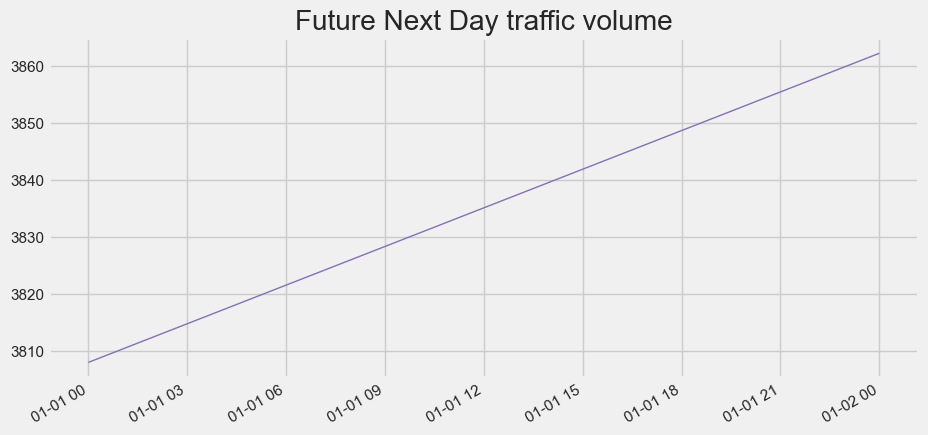

Wall time: 274 ms


In [102]:
%%time
#Plot the future: Next Day
future_with_features['PredictedTotalVolume'].iloc[0:2].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Day traffic volume')
plt.show()

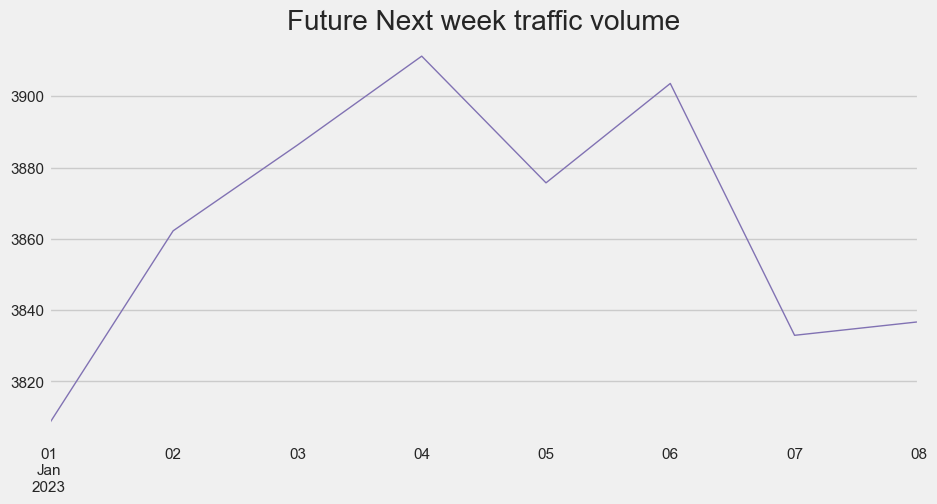

Wall time: 167 ms


In [103]:
%%time
#Plot the future: Next week
future_with_features['PredictedTotalVolume'].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next week traffic volume')
plt.show()

In [104]:
%%time
future_with_features['PredictedTotalVolume']

Wall time: 0 ns


2023-01-01    3807.958252
2023-01-02    3862.258789
2023-01-03    3886.319824
2023-01-04    3911.268311
2023-01-05    3875.717529
2023-01-06    3903.603760
2023-01-07    3832.935547
2023-01-08    3836.734863
Name: PredictedTotalVolume, dtype: float32

In [105]:
%%time
car_toll_charge = df_charge.copy()
car_toll_charge_1 = car_toll_charge[ (car_toll_charge["TollPointID"] == "LCE") & (car_toll_charge["Month"] == 1) 
                & (car_toll_charge["Year"] == 2023) ]
print("Future toll revenue of car:")
future_with_features['PredictedTotalVolume'] * float( car_toll_charge_1["Cars Charge"].str.slice(1, 5) )

Future toll revenue of car:
Wall time: 997 µs


2023-01-01    14356.002930
2023-01-02    14560.715820
2023-01-03    14651.425781
2023-01-04    14745.481445
2023-01-05    14611.455078
2023-01-06    14716.585938
2023-01-07    14450.166992
2023-01-08    14464.490234
Name: PredictedTotalVolume, dtype: float32

<font color='green'><center><h2><u>Trucks: Training & Testing Dataset</u></h2></center></font>

In [172]:
%%time
#Split train and test dataset for as a time series
training_df = df_xgboost_charge_3_Truck.loc[df_xgboost_charge_3_Truck.index < '01-01-2022']
testing_df = df_xgboost_charge_3_Truck.loc[df_xgboost_charge_3_Truck.index >= '01-01-2022']

Wall time: 2 ms


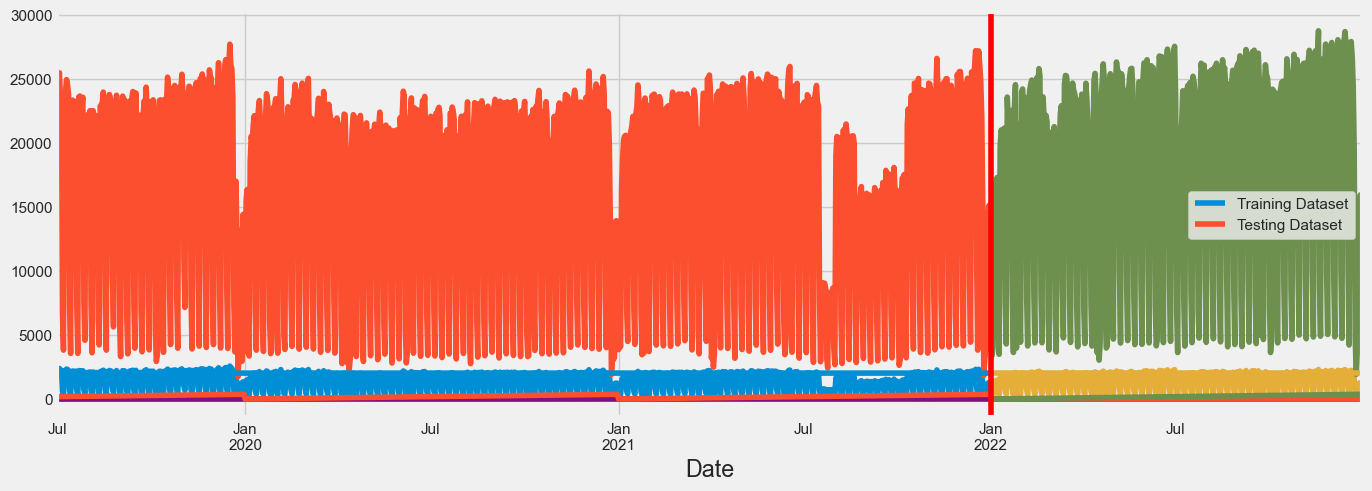

Wall time: 699 ms


In [173]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2022', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Trucks: Add features to dataset</u></h2></center></font>

In [174]:
%%time
#Adding features to train and test dataset
training_df = xgb_feature_creation(training_df)
testing_df = xgb_feature_creation(testing_df)
XGB_COLUMN_FEATURES = ['TotalTollCharge','Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
XGB_COLUMN_TARGET = ['TotalVolume']

Wall time: 5.02 ms


<font color='green'><center><h2><u>Trucks: Define feature & target columns for train & test dataset</u></h2></center></font>

In [175]:
%%time
X_train = training_df[XGB_COLUMN_FEATURES]
y_train = training_df[XGB_COLUMN_TARGET]

X_test = testing_df[XGB_COLUMN_FEATURES]
y_test = testing_df[XGB_COLUMN_TARGET]

Wall time: 4.99 ms


<font color='green'><center><h2><u>Trucks: Model Creation</u></h2></center></font>

In [176]:
%%time
#Create the model
#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100
       )

[03:42:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1658.62568	validation_1-rmse:1668.03911
[100]	validation_0-rmse:613.50908	validation_1-rmse:579.24362
[200]	validation_0-rmse:229.10083	validation_1-rmse:183.47843
[300]	validation_0-rmse:87.99427	validation_1-rmse:51.29760
[379]	validation_0-rmse:43.99366	validation_1-rmse:54.25959
Wall time: 329 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

<font color='green'><center><h2><u>Trucks: Visualize Feature Importance</u></h2></center></font>

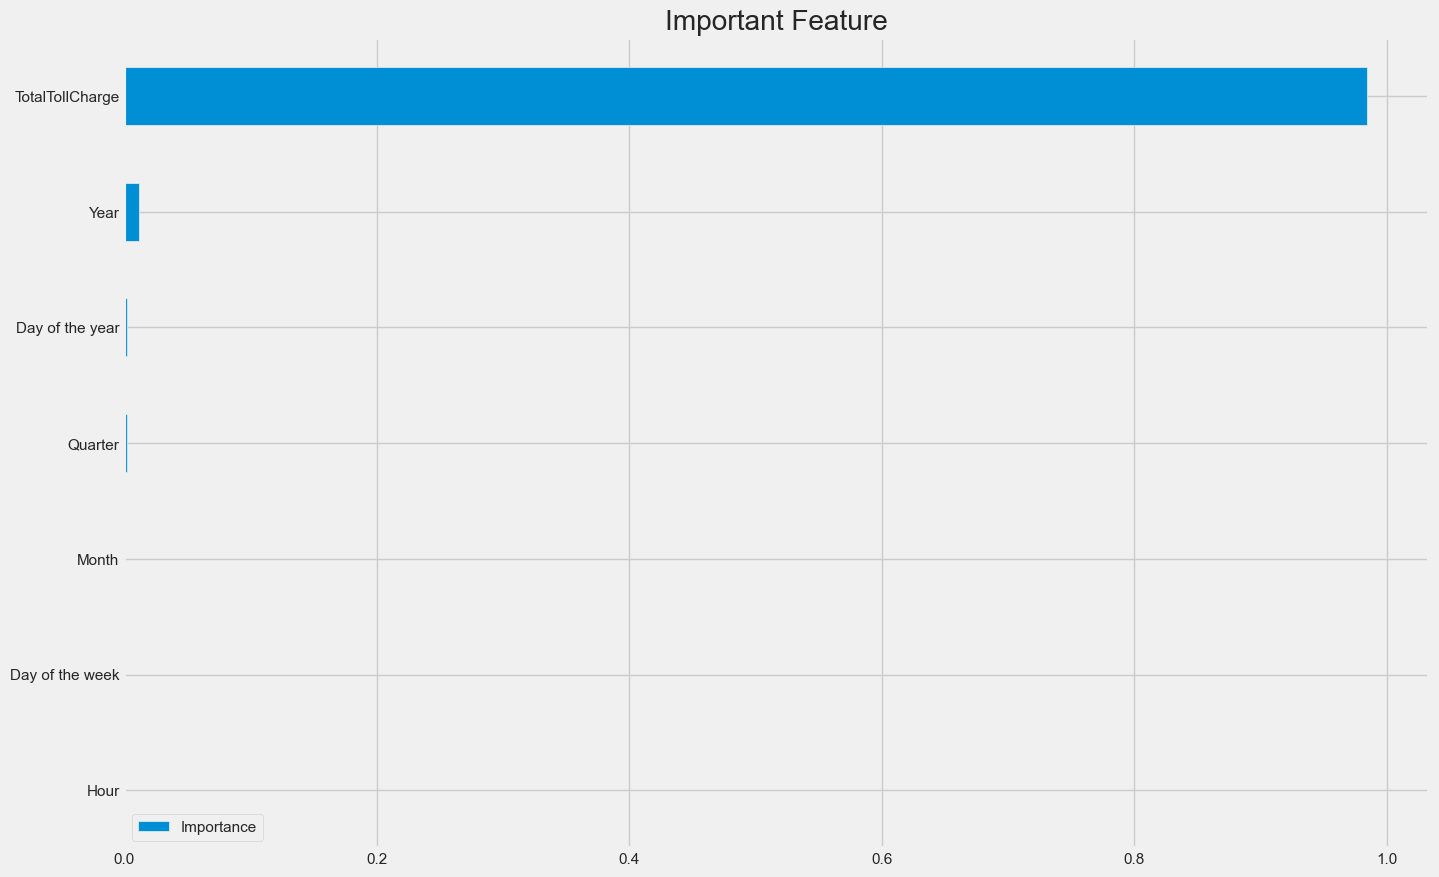

Wall time: 287 ms


In [177]:
%%time
fImportance = pd.DataFrame(data=regressor.feature_importances_,
                 index=regressor.feature_names_in_,
                 columns=['Importance'])
fImportance.sort_values('Importance').plot(kind='barh', title='Important Feature')
plt.show()

<font color='green'><center><h2><u>Trucks: Predict test dataset</u></h2></center></font>

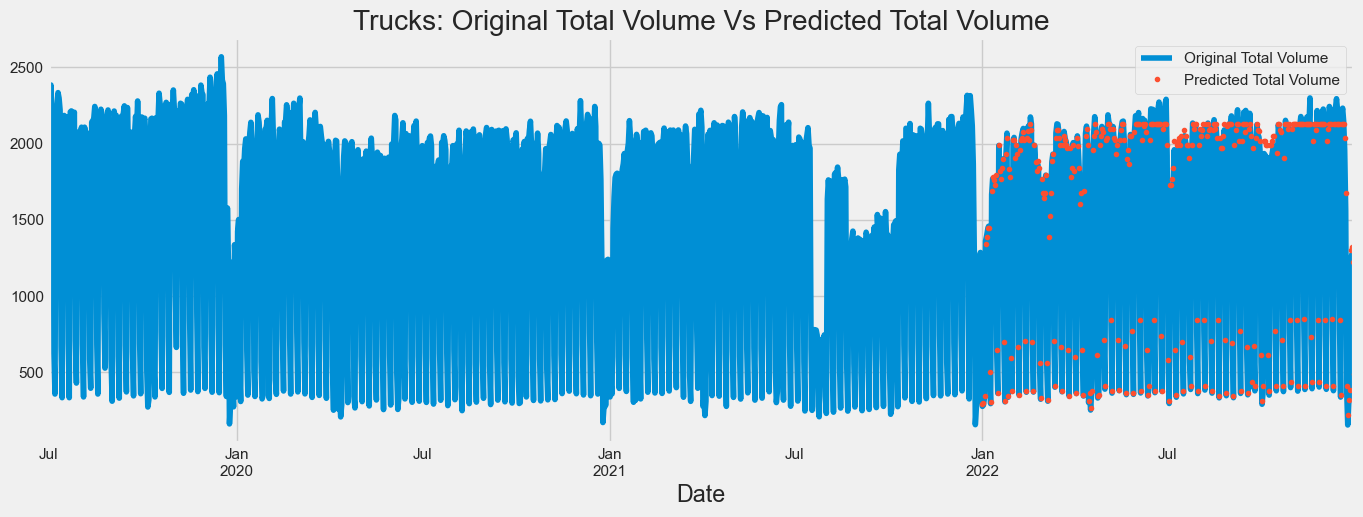

Wall time: 573 ms


In [178]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedTotalVolume'] = regressor.predict(X_test)
df_xgboost_charge_3_Truck = df_xgboost_charge_3_Truck.merge(testing_df['PredictedTotalVolume'], how='left', left_index = True, right_index = True)
ax = df_xgboost_charge_3_Truck['TotalVolume'].plot(figsize=(15,5))
df_xgboost_charge_3_Truck['PredictedTotalVolume'].plot(ax=ax, style='.')
plt.legend(['Original Total Volume', 'Predicted Total Volume'])
ax.set_title('Trucks: Original Total Volume Vs Predicted Total Volume')
plt.show()

<font color='green'><center><h2><u>Trucks: Evaluation Metrics</u></h2></center></font>

In [180]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedTotalVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 34.19
Wall time: 997 µs


<font color='green'><center><h2><u>Trucks: Future Toll Revenue Prediction</u></h2></center></font>

In [181]:
%%time
#Train all of the data before doing future prediction
df_xgboost_charge_3_Truck = xgb_feature_creation_2(df_xgboost_charge_3_Truck)
df_xgboost_charge_3_Truck = xgb_include_lags(df_xgboost_charge_3_Truck)

XGB_FEATURES = ['TotalTollCharge', 'Day of the year', 'Hour', 'Day of the week', 'Quarter', 'Month','Year', 'Day of the month', 'lag 1 year','lag 2 year','lag 3 year']
XGB_TARGET = ['TotalVolume']

X_all = df_xgboost_charge_3_Truck[XGB_FEATURES]
y_all = df_xgboost_charge_3_Truck[XGB_TARGET]

#regressor = xgb.XGBRegressor(n_estimators=10000, early_stopping_rounds=50)

regressor = xgb.XGBRegressor(base_score=0.5,
                                 booster='gbtree', 
                                 n_estimators=10000,
                                 early_stopping_rounds=50,
                                 objective='reg:linear',
                                 max_depth=3,
                                 learning_rate=0.01)
                                 
regressor.fit(X_all, y_all,
              eval_set=[(X_all, y_all)],
              verbose=100)

[03:44:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1661.40673
[100]	validation_0-rmse:614.39092
[200]	validation_0-rmse:230.38304
[300]	validation_0-rmse:90.02754
[400]	validation_0-rmse:39.22170
[500]	validation_0-rmse:21.49698
[600]	validation_0-rmse:15.53404
[700]	validation_0-rmse:13.19975
[800]	validation_0-rmse:11.95880
[900]	validation_0-rmse:11.20981
[1000]	validation_0-rmse:10.69569
[1100]	validation_0-rmse:10.34782
[1200]	validation_0-rmse:10.00855
[1300]	validation_0-rmse:9.65927
[1400]	validation_0-rmse:9.35667
[1500]	validation_0-rmse:9.12031
[1600]	validation_0-rmse:8.90224
[1700]	validation_0-rmse:8.66110
[1800]	validation_0-rmse:8.45154
[1900]	validation_0-rmse:8.26102
[2000]	validation_0-rmse:8.02744
[2100]	validation_0-rmse:7.83169
[2200]	validation_0-rmse:7.63838
[2300

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [182]:
%%time
#Create future dataframe
future = pd.date_range('2023-01-01', '2023-01-08')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df_xgboost_charge_3_Car['isFuture'] = False
Past_and_future_df = pd.concat([df_xgboost_charge_3_Car, future_df])
Past_and_future_df

Wall time: 3.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01      35400.0        118590.00   0.0              0.0      3.0   
2019-07-02      37192.0        124593.20   0.0              1.0      3.0   
2019-07-03      37909.0        126995.15   0.0              2.0      3.0   
2019-07-04      38361.0        128509.35   0.0              3.0      3.0   
2019-07-05      38247.0        128127.45   0.0              4.0      3.0   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN   NaN              NaN      NaN   
2023-01-05          NaN              NaN   NaN              NaN      NaN   
2023-01-06          NaN              NaN   NaN              NaN      NaN   
2023-01-07          NaN              NaN   NaN              NaN      NaN   
2023-01-08          NaN              NaN   NaN              NaN      NaN   

            Month    Year  Day of the year  PredictedTotalVolume  \
2019-07-01    7.0  2019.0            182.0                   NaN   
2019-07-02    7.0  2019.0            183.0                   NaN   
2019-07-03    7.0  2019.0            184.0                   NaN   
2019-07-04    7.0  2019.0            185.0                   NaN   
2019-07-05    7.0  2019.0            186.0                   NaN   
...           ...     ...              ...                   ...   
2023-01-04    NaN     NaN              NaN                   NaN   
2023-01-05    NaN     NaN              NaN                   NaN   
2023-01-06    NaN     NaN              NaN                   NaN   
2023-01-07    NaN     NaN              NaN                   NaN   
2023-01-08    NaN     NaN              NaN                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01               1.0                27         NaN         NaN   
2019-07-02               2.0                27         NaN         NaN   
2019-07-03               3.0                27         NaN         NaN   
2019-07-04               4.0                27         NaN         NaN   
2019-07-05               5.0                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04               NaN              <NA>         NaN         NaN   
2023-01-05               NaN              <NA>         NaN         NaN   
2023-01-06               NaN              <NA>         NaN         NaN   
2023-01-07               NaN              <NA>         NaN         NaN   
2023-01-08               NaN              <NA>         NaN         NaN   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04         NaN      True  
2023-01-05         NaN      True  
2023-01-06         NaN      True  
2023-01-07         NaN      True  
2023-01-08         NaN      True  

[1288 rows x 15 columns]

In [183]:
%%time
#Pass past+future dataset to add features and lags
Past_and_future_df = xgb_feature_creation_2(Past_and_future_df)
Past_and_future_df = xgb_include_lags(Past_and_future_df)
Past_and_future_df

Wall time: 30.9 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2019-07-01      35400.0        118590.00     0                0        3   
2019-07-02      37192.0        124593.20     0                1        3   
2019-07-03      37909.0        126995.15     0                2        3   
2019-07-04      38361.0        128509.35     0                3        3   
2019-07-05      38247.0        128127.45     0                4        3   
...                 ...              ...   ...              ...      ...   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   
2023-01-06          NaN              NaN     0                4        1   
2023-01-07          NaN              NaN     0                5        1   
2023-01-08          NaN              NaN     0                6        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2019-07-01      7  2019              182                   NaN   
2019-07-02      7  2019              183                   NaN   
2019-07-03      7  2019              184                   NaN   
2019-07-04      7  2019              185                   NaN   
2019-07-05      7  2019              186                   NaN   
...           ...   ...              ...                   ...   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   
2023-01-06      1  2023                6                   NaN   
2023-01-07      1  2023                7                   NaN   
2023-01-08      1  2023                8                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2019-07-01                 1                27         NaN         NaN   
2019-07-02                 2                27         NaN         NaN   
2019-07-03                 3                27         NaN         NaN   
2019-07-04                 4                27         NaN         NaN   
2019-07-05                 5                27         NaN         NaN   
...                      ...               ...         ...         ...   
2023-01-04                 4                 1     21545.0     24650.0   
2023-01-05                 5                 1     22176.0     26014.0   
2023-01-06                 6                 1     23898.0     27615.0   
2023-01-07                 7                 1     20965.0     25804.0   
2023-01-08                 8                 1     17468.0     24093.0   

            lag 3 year  isFuture  
2019-07-01         NaN     False  
2019-07-02         NaN     False  
2019-07-03         NaN     False  
2019-07-04         NaN     False  
2019-07-05         NaN     False  
...                ...       ...  
2023-01-04     31025.0      True  
2023-01-05     31637.0      True  
2023-01-06     33665.0      True  
2023-01-07     26394.0      True  
2023-01-08     21961.0      True  

[1288 rows x 15 columns]

In [184]:
%%time
#Split and dislay only future dataset
future_with_features = Past_and_future_df.query('isFuture').copy()
future_with_features.head()

Wall time: 4.99 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1                   NaN   
2023-01-02      1  2023                2                   NaN   
2023-01-03      1  2023                3                   NaN   
2023-01-04      1  2023                4                   NaN   
2023-01-05      1  2023                5                   NaN   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52     22124.0     17261.0   
2023-01-02                 2                 1     20848.0     21271.0   
2023-01-03                 3                 1     22879.0     23760.0   
2023-01-04                 4                 1     21545.0     24650.0   
2023-01-05                 5                 1     22176.0     26014.0   

            lag 3 year  isFuture  
2023-01-01     20995.0      True  
2023-01-02     27326.0      True  
2023-01-03     29911.0      True  
2023-01-04     31025.0      True  
2023-01-05     31637.0      True

In [185]:
%%time
#Predict the future
future_with_features['PredictedTotalVolume'] = regressor.predict(future_with_features[XGB_FEATURES])

Wall time: 5.98 ms


In [186]:
%%time
future_with_features.head()

Wall time: 0 ns


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
2023-01-01          NaN              NaN     0                6        1   
2023-01-02          NaN              NaN     0                0        1   
2023-01-03          NaN              NaN     0                1        1   
2023-01-04          NaN              NaN     0                2        1   
2023-01-05          NaN              NaN     0                3        1   

            Month  Year  Day of the year  PredictedTotalVolume  \
2023-01-01      1  2023                1            132.473480   
2023-01-02      1  2023                2            127.865776   
2023-01-03      1  2023                3            127.664497   
2023-01-04      1  2023                4            127.317513   
2023-01-05      1  2023                5            129.140411   

            Day of the month  Week of the year  lag 1 year  lag 2 year  \
2023-01-01                 1                52     22124.0     17261.0   
2023-01-02                 2                 1     20848.0     21271.0   
2023-01-03                 3                 1     22879.0     23760.0   
2023-01-04                 4                 1     21545.0     24650.0   
2023-01-05                 5                 1     22176.0     26014.0   

            lag 3 year  isFuture  
2023-01-01     20995.0      True  
2023-01-02     27326.0      True  
2023-01-03     29911.0      True  
2023-01-04     31025.0      True  
2023-01-05     31637.0      True

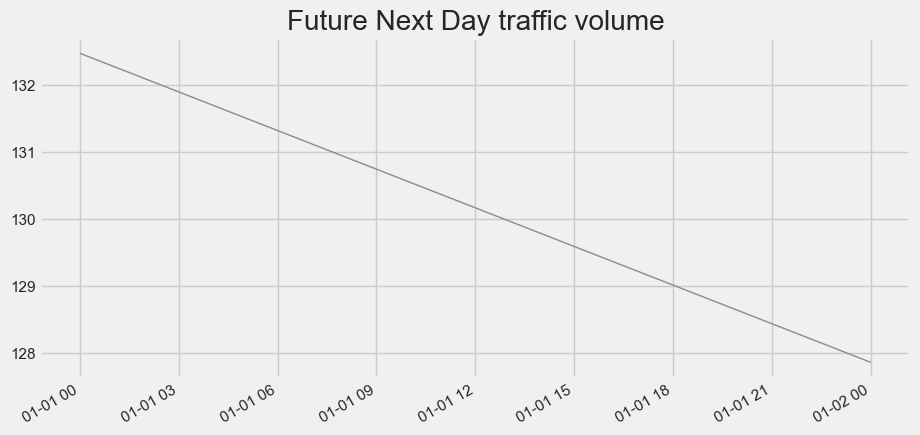

Wall time: 296 ms


In [187]:
%%time
#Plot the future: Next Day
future_with_features['PredictedTotalVolume'].iloc[0:2].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next Day traffic volume')
plt.show()

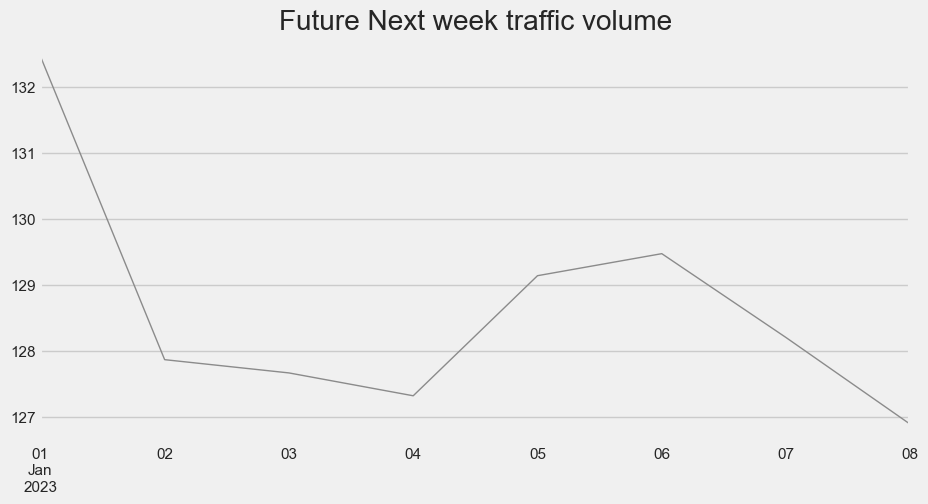

Wall time: 224 ms


In [188]:
%%time
#Plot the future: Next week
future_with_features['PredictedTotalVolume'].plot(figsize=(10, 5),
                               color=colour_palette[4],
                               ms=1,
                               lw=1,
                               title='Future Next week traffic volume')
plt.show()

In [ ]:
%%time
future_with_features['PredictedTotalVolume']

In [189]:
%%time
truck_toll_charge = df_charge.copy()
truck_toll_charge_1 = truck_toll_charge[ (truck_toll_charge["TollPointID"] == "SJY") & (truck_toll_charge["Month"] == 1) 
                & (truck_toll_charge["Year"] == 2023) ]
print("Future toll revenue of truck:")
future_with_features['PredictedTotalVolume'] * float( car_toll_charge_1["Trucks Charge"].str.slice(1, 5) )

Future toll revenue of truck:


2023-01-01    1682.413208
2023-01-02    1623.895386
2023-01-03    1621.339111
2023-01-04    1616.932373
2023-01-05    1640.083252
2023-01-06    1644.332520
2023-01-07    1628.155640
2023-01-08    1611.427246
Name: PredictedTotalVolume, dtype: float32

<font color='blue'><center><h2>Model 4: Linear Regression</h2></center></font>

<font color='green'><center><h2><u>Import Libraries</u></h2></center></font>

In [149]:
%%time
#Importing Libraries Required
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
colour_palette = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.model_selection import TimeSeriesSplit

Wall time: 71.8 ms


<font color='green'><center><h2><u>Cars: Read Data & Data Pre-Processing</u></h2></center></font>

In [150]:
%%time
#Input traffic data set
#Filter and store the data set having TollPointID as LCE
df_lreg_charge = df_inp_data_charge4.copy()
df_lreg_charge['Date'] = pd.to_datetime(df_lreg_charge['Date'])
df_lreg_charge_1_Car = df_lreg_charge[ (df_lreg_charge['TollPointID_x'] == "LCE") & 
                                       (df_lreg_charge['VehicleClass'] == "Car") ]

Wall time: 342 ms


In [151]:
%%time
#Group by TotalVolume & TotalCharges
df_lreg_charge_2_Car = df_lreg_charge_1_Car.groupby(['Date'])['TotalVolume','TotalTollCharge'].sum()
df_lreg_charge_2_Car

Wall time: 9.97 ms


<timed exec>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


TotalVolume  TotalTollCharge
Date                                    
2019-07-01        35400        118590.00
2019-07-02        37192        124593.20
2019-07-03        37909        126995.15
2019-07-04        38361        128509.35
2019-07-05        38247        128127.45
...                 ...              ...
2022-12-27        25545         94516.50
2022-12-28        27680        102416.00
2022-12-29        25401         93983.70
2022-12-30        26738         98930.60
2022-12-31        23201         85843.70

[1280 rows x 2 columns]

<font color='green'><center><h2><u>Cars: Input Data Visualization</u></h2></center></font>

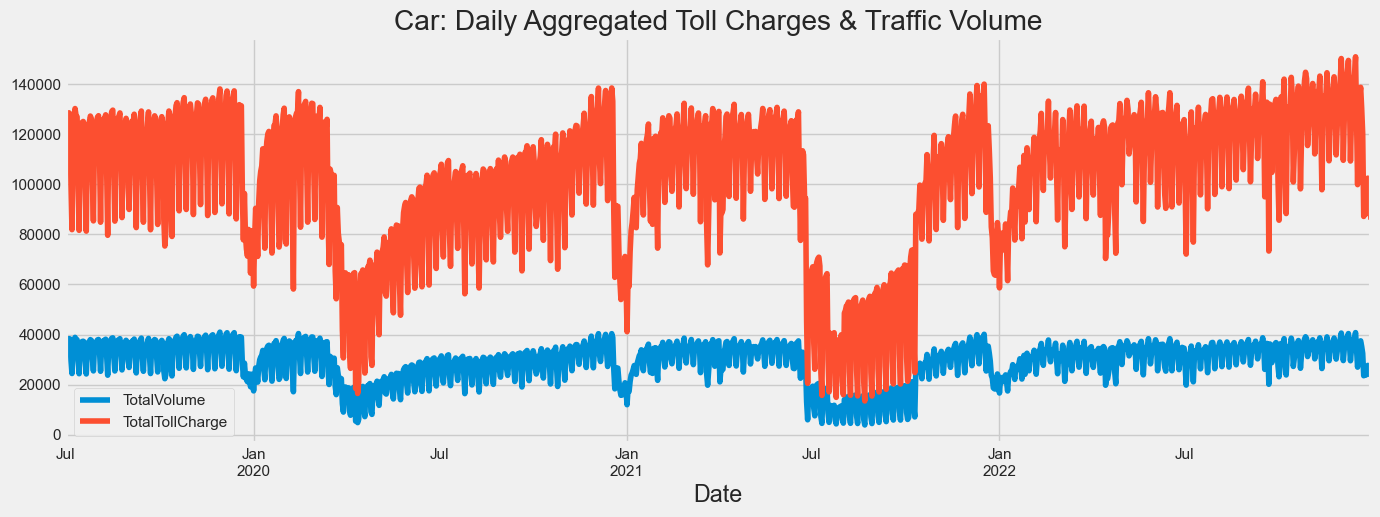

Wall time: 442 ms


In [152]:
%%time
#Plot daily aggregated toll charges and traffic volume line graph for the given dataset
df_lreg_charge_2_Car.plot(figsize=(15,5), title='Car: Daily Aggregated Toll Charges & Traffic Volume')
plt.show()

<font color='green'><center><h2><u>Cars: Create required features</u></h2></center></font>

In [153]:
%%time
#Below is the feature creation created as a function
def lreg_feature_creation(df):
    """
    Create required time series features based on the time series index which is date & time
    """
    df = df.copy()
    df['Hour'] = df.index.hour
    df['Day of the week'] = df.index.dayofweek
    df['Quarter']= df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of the year'] = df.index.dayofyear
    return df

Wall time: 0 ns


In [154]:
%%time
#Diplay features
df_lreg_charge_3_Car = lreg_feature_creation(df_lreg_charge_2_Car)
df_lreg_charge_3_Car

Wall time: 5.02 ms


TotalVolume  TotalTollCharge  Hour  Day of the week  Quarter  \
Date                                                                       
2019-07-01        35400        118590.00     0                0        3   
2019-07-02        37192        124593.20     0                1        3   
2019-07-03        37909        126995.15     0                2        3   
2019-07-04        38361        128509.35     0                3        3   
2019-07-05        38247        128127.45     0                4        3   
...                 ...              ...   ...              ...      ...   
2022-12-27        25545         94516.50     0                1        4   
2022-12-28        27680        102416.00     0                2        4   
2022-12-29        25401         93983.70     0                3        4   
2022-12-30        26738         98930.60     0                4        4   
2022-12-31        23201         85843.70     0                5        4   

            Month  Year  Day of the year  
Date                                      
2019-07-01      7  2019              182  
2019-07-02      7  2019              183  
2019-07-03      7  2019              184  
2019-07-04      7  2019              185  
2019-07-05      7  2019              186  
...           ...   ...              ...  
2022-12-27     12  2022              361  
2022-12-28     12  2022              362  
2022-12-29     12  2022              363  
2022-12-30     12  2022              364  
2022-12-31     12  2022              365  

[1280 rows x 8 columns]

<font color='green'><center><h2><u>Cars: Training & Testing Dataset</u></h2></center></font>

In [155]:
%%time
#Split train and test dataset for as a time series
training_df = df_lreg_charge_3_Car.loc[df_lreg_charge_3_Car.index < '01-01-2022']
testing_df = df_lreg_charge_3_Car.loc[df_lreg_charge_3_Car.index >= '01-01-2022']

Wall time: 1.99 ms


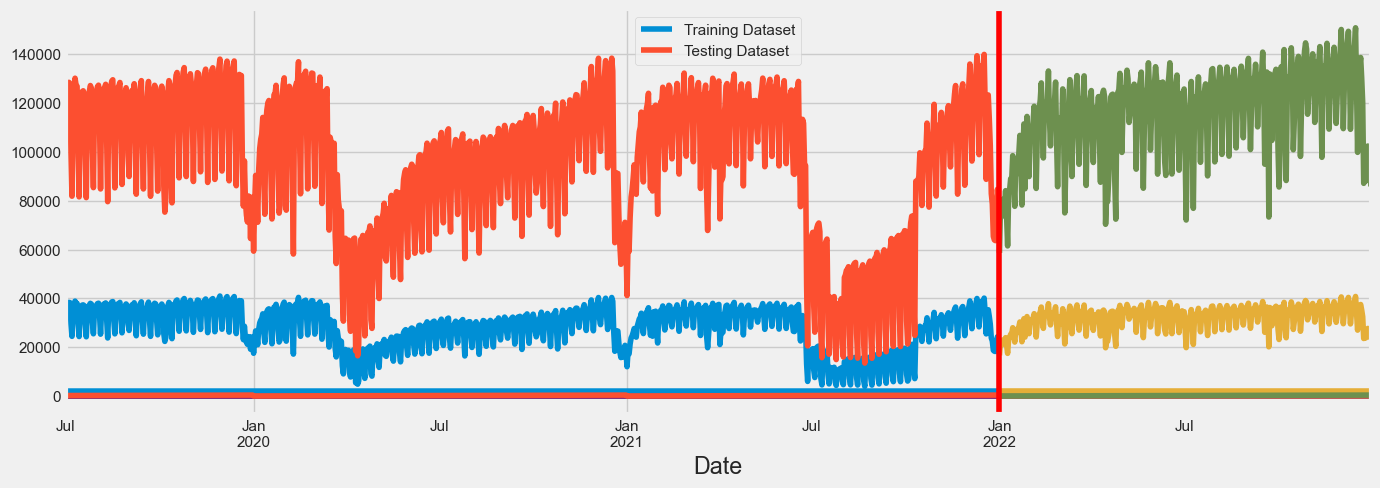

Wall time: 554 ms


In [156]:
%%time
#Plot the splitted training & testing dataset
fig, ax = plt.subplots(figsize=(15,5))
training_df.plot(ax=ax, label = 'Training Dataset')
testing_df.plot(ax=ax, label = 'Testing Dataset')
ax.axvline('01-01-2022', color='red')
ax.legend(['Training Dataset','Testing Dataset'])
plt.show()

<font color='green'><center><h2><u>Cars: Add features to dataset</u></h2></center></font>

In [157]:
%%time
#Adding features to train and test dataset
training_df = lreg_feature_creation(training_df)
testing_df = lreg_feature_creation(testing_df)
LREG_COLUMN_FEATURES = ['TotalTollCharge','Hour', 'Day of the week', 'Quarter', 'Month', 'Year', 'Day of the year']
LREG_COLUMN_TARGET = ['TotalVolume']

Wall time: 3.03 ms


<font color='green'><center><h2><u>Cars: Define feature & target columns for train & test dataset</u></h2></center></font>

In [158]:
%%time
X_train = training_df[LREG_COLUMN_FEATURES]
y_train = training_df[LREG_COLUMN_TARGET]

X_test = testing_df[LREG_COLUMN_FEATURES]
y_test = testing_df[LREG_COLUMN_TARGET]

Wall time: 3.99 ms


<font color='green'><center><h2><u>Cars: Model Creation</u></h2></center></font>

In [159]:
%%time
#Create the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

Wall time: 3.99 ms


LinearRegression()

<font color='green'><center><h2><u>Cars: Predict test dataset</u></h2></center></font>

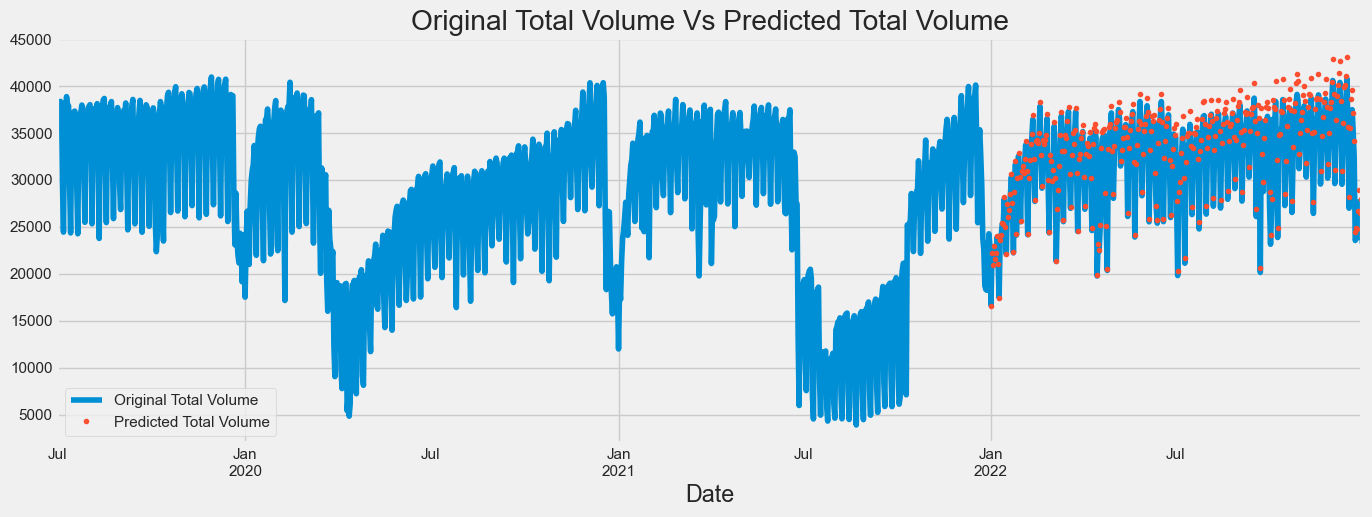

Wall time: 396 ms


In [160]:
%%time
#Forecast / Predict on test dataset
testing_df['PredictedTotalVolume'] = regressor.predict(X_test)
df_lreg_charge_3_Car = df_lreg_charge_3_Car.merge(testing_df['PredictedTotalVolume'], how='left', left_index = True, right_index = True)
ax = df_lreg_charge_3_Car['TotalVolume'].plot(figsize=(15,5))
df_lreg_charge_3_Car['PredictedTotalVolume'].plot(ax=ax, style='.')
plt.legend(['Original Total Volume', 'Predicted Total Volume'])
ax.set_title('Original Total Volume Vs Predicted Total Volume')
plt.show()

<font color='green'><center><h2><u>Cars: Evaluation Metrics</u></h2></center></font>

In [161]:
%%time
#Calculate Error
testing_df['ErrorValue'] = np.abs(testing_df['TotalVolume'] - testing_df['PredictedTotalVolume'])
print('Mean Abosolute Error Score of the Testing Dataset:', round(testing_df['ErrorValue'].mean(),2) )

Mean Abosolute Error Score of the Testing Dataset: 988.98
Wall time: 997 µs


<font color='purple'><center><h1>End: Answering "Predict the future next day+ revenue from cars and trucks based on daily traffic volume</h1></center></font>